In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)

In [512]:
#Custom figures
import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('font', size=18)

## Import study data

In [2]:
ADNIMERGE = pd.read_csv("ADNIMERGE.csv",low_memory=False)
ADNIMERGE = ADNIMERGE[ADNIMERGE['VISCODE']=='bl']
ADNIMERGE.head()

RID COLPROT ORIGPROT        PTID  SITE VISCODE    EXAMDATE DX_bl   AGE  \
0     2   ADNI1    ADNI1  011_S_0002    11      bl  2005-09-08    CN  74.3   
1     3   ADNI1    ADNI1  011_S_0003    11      bl  2005-09-12    AD  81.3   
5     4   ADNI1    ADNI1  022_S_0004    22      bl  2005-11-08  LMCI  67.5   
10    5   ADNI1    ADNI1  011_S_0005    11      bl  2005-09-07    CN  73.7   
15    6   ADNI1    ADNI1  100_S_0006   100      bl  2005-11-29  LMCI  80.4   

   PTGENDER  PTEDUCAT         PTETHCAT PTRACCAT  PTMARRY  APOE4      FDG  PIB  \
0      Male        16  Not Hisp/Latino    White  Married    0.0  1.33615  NaN   
1      Male        18  Not Hisp/Latino    White  Married    1.0  1.10860  NaN   
5      Male        10      Hisp/Latino    White  Married    0.0      NaN  NaN   
10     Male        16  Not Hisp/Latino    White  Married    0.0  1.25956  NaN   
15   Female        13  Not Hisp/Latino    White  Married    0.0      NaN  NaN   

    AV45  FBB  ABETA    TAU   PTAU  CDRSB  ADAS11  ADAS13  ADASQ4  MMSE  \
0    NaN  NaN    NaN    NaN    NaN    0.0   10.67   18.67     5.0  28.0   
1    NaN  NaN  741.5  239.7  22.83    4.5   22.00   31.00     8.0  20.0   
5    NaN  NaN   1501  153.1  13.29    1.0   14.33   21.33     6.0  27.0   
10   NaN  NaN  547.3    337  33.43    0.0    8.67   14.67     4.0  29.0   
15   NaN  NaN    NaN    NaN    NaN    0.5   18.67   25.67     7.0  25.0   

    RAVLT_immediate  RAVLT_learning  RAVLT_forgetting  RAVLT_perc_forgetting  \
0              44.0             4.0               6.0                54.5455   
1              22.0             1.0               4.0               100.0000   
5              37.0             7.0               4.0                36.3636   
10             37.0             4.0               4.0                44.4444   
15             30.0             1.0               5.0                83.3333   

    LDELTOTAL  DIGITSCOR  TRABSCOR   FAQ  MOCA  EcogPtMem  EcogPtLang  \
0        10.0       34.0     112.0   0.0   NaN        NaN         NaN   
1         2.0       25.0     148.0  10.0   NaN        NaN         NaN   
5         4.0       25.0     271.0   0.0   NaN        NaN         NaN   
10       12.0       38.0      90.0   0.0   NaN        NaN         NaN   
15        3.0       34.0     168.0   0.0   NaN        NaN         NaN   

    EcogPtVisspat  EcogPtPlan  EcogPtOrgan  EcogPtDivatt  EcogPtTotal  \
0             NaN         NaN          NaN           NaN          NaN   
1             NaN         NaN          NaN           NaN          NaN   
5             NaN         NaN          NaN           NaN          NaN   
10            NaN         NaN          NaN           NaN          NaN   
15            NaN         NaN          NaN           NaN          NaN   

    EcogSPMem  EcogSPLang  EcogSPVisspat  EcogSPPlan  EcogSPOrgan  \
0         NaN         NaN            NaN         NaN          NaN   
1         NaN         NaN            NaN         NaN          NaN   
5         NaN         NaN            NaN         NaN          NaN   
10        NaN         NaN            NaN         NaN          NaN   
15        NaN         NaN            NaN         NaN          NaN   

    EcogSPDivatt  EcogSPTotal      FLDSTRENG  \
0            NaN          NaN  1.5 Tesla MRI   
1            NaN          NaN  1.5 Tesla MRI   
5            NaN          NaN  1.5 Tesla MRI   
10           NaN          NaN  1.5 Tesla MRI   
15           NaN          NaN  1.5 Tesla MRI   

                                            FSVERSION  IMAGEUID  Ventricles  \
0   Cross-Sectional FreeSurfer (FreeSurfer Version...   35475.0    118233.0   
1   Cross-Sectional FreeSurfer (FreeSurfer Version...   32237.0     84599.0   
5   Cross-Sectional FreeSurfer (FreeSurfer Version...   64631.0     39605.0   
10  Cross-Sectional FreeSurfer (FreeSurfer Version...   32246.0     34062.0   
15  Cross-Sectional FreeSurfer (FreeSurfer Version...   33025.0     39826.0   

    Hippocampus  WholeBrain  Entorhinal  Fusiform  MidTemp 

In [3]:
print("Number of rows: ", ADNIMERGE.shape[0])
print("Number of columns: ", ADNIMERGE.shape[1])

Number of rows:  2428
Number of columns:  116


## Age distribution by diagnostic status in baseline

Diagnostic codes (in baseline):

- **CN**: controls
- **AD**: alzheimer's disease (dementia diagnostic)
- **LMCI**: late mild cognitive impairment
- **EMCI**: early mild cognitive impairment
- **SMC**: subjective memory concerns (it is considered cognitive normal)

In [4]:
ADNIMERGE['DX_bl'].unique()

array(['CN', 'AD', 'LMCI', 'SMC', 'EMCI', nan], dtype=object)

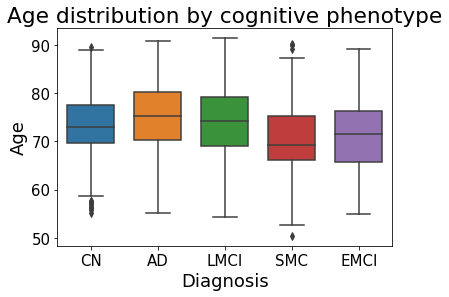

In [513]:
sns.boxplot( x=ADNIMERGE["DX_bl"], y=ADNIMERGE["AGE"], width=0.7);
plt.title("Age distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("Age")
plt.show()

To compare the distributions, we have performed a **Kruskal-Wallis** test which is a non-parametric test and an alternative to one-way Anova. By non-parametric we mean, the data is not assumed to become from a particular distribution. The main objective of this test is used to determine whether there is a statistical difference between the medians of at least three independent groups. 

The hypothesese are: 
- **Null hypothesis (H0)**: the median is the same for all the data groups
- **Alternative hypothesis (Ha)**: the median is not equal for all data groups. 

In [6]:
#Import required package
from scipy import stats

In [7]:
#Count NAs
print("Number of missing values for the age: ", ADNIMERGE['AGE'].isna().sum())

Number of missing values for the age:  4


In [8]:
#drop rows with NANs as they are giving problems in the statistical analysis
ADNIMERGE = ADNIMERGE.dropna(subset = ['AGE'])
ADNIMERGE['AGE'].isna().sum()

0

In [9]:
#Prepare data for statistical tests
CN_age = ADNIMERGE[ADNIMERGE["DX_bl"]=='CN']['AGE'].values.tolist()
AD_age = ADNIMERGE[ADNIMERGE["DX_bl"]=='AD']['AGE'].values.tolist()
LMCI_age = ADNIMERGE[ADNIMERGE["DX_bl"]=='LMCI']['AGE'].values.tolist()
SMC_age = ADNIMERGE[ADNIMERGE["DX_bl"]=='SMC']['AGE'].values.tolist()
EMCI_age = ADNIMERGE[ADNIMERGE["DX_bl"]=='EMCI']['AGE'].values.tolist()

In [10]:
#Run Kruskal-Wallis test

KW_age = stats.kruskal(CN_age, AD_age, LMCI_age, SMC_age, EMCI_age)

print(KW_age)

KruskalResult(statistic=106.38929707080892, pvalue=4.283650979348773e-22)


The p-value is below 0.05 and thus, we can reject the null hypothesis, suggesting that the at least one of the groups do not have the same age distribution as the others. 

In addition, we can compare the distributions of each of the cognitive impairment groups with the controls using a **Mann-Whitney** test. This test is equivalent to the Kruskal-Wallis test, but compares only two grous at a time. 

In [11]:
#Mann-Whitney tests
print("Controls-SMC: ", stats.mannwhitneyu(CN_age,AD_age))
print("Controls-EMCI: ", stats.mannwhitneyu(CN_age,EMCI_age))
print("Controls-LMCI: ", stats.mannwhitneyu(CN_age,LMCI_age))
print("Controls-AD: ", stats.mannwhitneyu(CN_age,AD_age))

Controls-SMC:  MannwhitneyuResult(statistic=95390.0, pvalue=0.0002048873918692586)
Controls-EMCI:  MannwhitneyuResult(statistic=132295.0, pvalue=9.270313253534334e-06)
Controls-LMCI:  MannwhitneyuResult(statistic=174909.0, pvalue=0.08593701785458925)
Controls-AD:  MannwhitneyuResult(statistic=95390.0, pvalue=0.0002048873918692586)


We cannot reject the null hypothesis only for the LMCI group, where the p-value suggests that the two distributions are the same. 

In [12]:
#groupping all patients in the same group
noCN_age = ADNIMERGE[ADNIMERGE["DX_bl"]!='CN']['AGE'].values.tolist()
print("Controls-no controls: ", stats.mannwhitneyu(CN_age,noCN_age))

Controls-no controls:  MannwhitneyuResult(statistic=527537.0, pvalue=0.18847205346018037)


**Conclusion**: the age distribution is not the same in controls than in the different groups, except if we only consider two groups (healthy and patients with cognitive impairment). These results do not support a normalization based on the age of the controls. Nevertheless these tests should be repeated for the patients included in the batteries that are going to be used for the study. 

## Gender distribution by diagnosis group

In [13]:
#calculate sum of values by group
df_sex = ADNIMERGE.groupby(['DX_bl', 'PTGENDER']).agg(Count=("RID", 'count'))
df_sex = df_sex.reset_index()
df_sex

DX_bl PTGENDER  Count
0    AD   Female    180
1    AD     Male    231
2    CN   Female    286
3    CN     Male    254
4  EMCI   Female    193
5  EMCI     Male    227
6  LMCI   Female    268
7  LMCI     Male    419
8   SMC   Female    219
9   SMC     Male    133

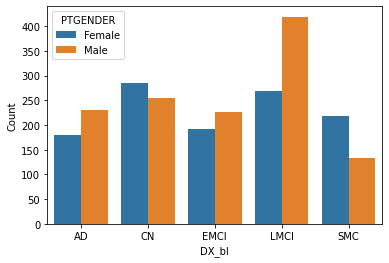

In [14]:
#print barplot
sns.barplot(x="DX_bl",
           y="Count",
           hue="PTGENDER",
           data=df_sex)

plt.show()

## Ethnic distribution by diagnosis group

In [15]:
#calculate sum of values by group
df_eth = ADNIMERGE.groupby(['DX_bl', 'PTRACCAT']).agg(Count=("RID", 'count'))
df_eth = df_eth.reset_index()
df_eth.head()

DX_bl           PTRACCAT  Count
0    AD              Asian     10
1    AD              Black     22
2    AD      More than one      4
3    AD              White    375
4    CN  Am Indian/Alaskan      2

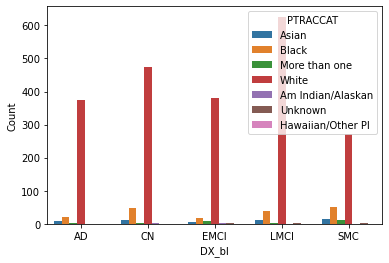

In [16]:
#print barplot
sns.barplot(x="DX_bl",
           y="Count",
           hue="PTRACCAT",
           data=df_eth)

plt.show()

## Neurocognitive test batteries data inspection

First we are going to find how many patients -in baseline- have been administered with the three batteries (ADAS-cog, MMSE, MoCA).

### Data import

#### ADAS-cog

In [17]:
#ADAS-cog (ADNIGO,2,3)
ADAS = pd.read_csv("Neuropsychological/ADAS_ADNIGO23.csv")
ADAS = ADAS[ADAS['VISCODE2']=='bl']
ADAS.head()

Phase  ID   RID  SITEID VISCODE VISCODE2    USERDATE   USERDATE2  \
5   ADNIGO  22  2002      48      bl       bl  2010-07-06  2011-02-28   
6   ADNIGO  24  2007      12      bl       bl  2010-07-07  2011-02-28   
7   ADNIGO  26  2010       1      bl       bl  2010-07-09  2011-02-28   
10  ADNIGO  32  2011      48      bl       bl  2010-07-21  2011-02-28   
13  ADNIGO  38  2003      48      bl       bl  2010-07-23  2011-02-28   

    WORDLIST  Q1UNABLE          Q1TR1                Q1TR2              Q1TR3  \
5        1.0       NaN  0:1:2:3:5:6:7  0:1:2:3:4:5:6:7:8:9  0:2:3:4:5:6:7:8:9   
6        1.0       NaN      1:4:7:8:9        0:3:4:6:7:8:9  0:2:3:4:5:6:7:8:9   
7        1.0       NaN  0:1:4:6:7:8:9    0:2:3:4:5:6:7:8:9    0:1:2:3:5:6:8:9   
10       1.0       NaN  0:1:2:3:6:7:9        0:1:2:3:4:5:9    0:1:2:3:4:5:8:9   
13       1.0       NaN        0:3:6:9        0:1:2:4:5:6:9    0:1:2:4:5:6:8:9   

    Q1TRIT  Q1TR2T  Q1TRT  Q1SCORE  TIMEEND  Q2UNABLE     Q2TASK  Q2SCORE  \
5      NaN     NaN    NaN      1.0      NaN       NaN  1:2:3:4:5      0.0   
6      NaN     NaN    NaN      3.0      NaN       NaN  1:2:3:4:5      0.0   
7      NaN     NaN    NaN      2.0      NaN       NaN  1:2:3:4:5      0.0   
10     NaN     NaN    NaN      3.0      NaN       NaN  1:2:3:4:5      0.0   
13     NaN     NaN    NaN      4.0      NaN       NaN  1:2:3:4:5      0.0   

    Q3UNABLE  Q3TASK1  Q3TASK2  Q3TASK3  Q3TASK4  Q3SCORE  Q4UNABLE  \
5        NaN      1.0      1.0      1.0      1.0      0.0       NaN   
6        NaN      1.0      1.0      1.0      2.0      1.0       NaN   
7        NaN      1.0      1.0      1.0      1.0      0.0       NaN   
10       NaN      1.0      1.0      1.0      2.0      1.0       NaN   
13       NaN      1.0      1.0      1.0      2.0      1.0       NaN   

    TIMEBEGAN           Q4TASK  Q4SCORE  Q5UNABLE  \
5         NaN  0:1:3:4:6:7:8:9      2.0       NaN   
6         NaN  0:1:2:4:5:6:7:8      2.0       NaN   
7         NaN    0:1:2:4:5:7:9      3.0       NaN   
10        NaN  0:1:2:3:4:5:7:9      2.0       NaN   
13        NaN  0:2:3:4:6:7:8:9      2.0       NaN   

                                       Q5TASK  Q5SCORE  Q5NAME1  Q5NAME2  \
5      1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   
6      1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   
7   1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17      0.0      NaN      NaN   
10  1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17      0.0      NaN      NaN   
13     1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   

    Q5NAME3  Q5NAME4  Q5NAME5  Q5NAME6  Q5NAME7  Q5NAME8  Q5NAME9  Q5NAME10  \
5       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
6       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
7       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
10      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
13      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   

    Q5NAME11  Q5NAME12 Q5FINGER  Q5SCORE_CUE  Q6UNABLE     Q6TASK  Q6SCORE  \
5        NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
6        NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
7        NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
10       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
13       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   

    Q7UNABLE           Q7TASK  Q7SCORE  Q8UNABLE  Q8WORD1  Q8WORD1R  Q8WORD2  \
5        NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
6        NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
7        NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
10       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
13       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0  

In [18]:
len(ADAS['RID'].unique())

1606

Count missing data

In [19]:
ADAS_columns = ["Q1SCORE","Q2SCORE","Q3SCORE","Q4SCORE","Q5SCORE","Q6SCORE","Q7SCORE",
          "Q8SCORE","Q9SCORE","Q10SCORE","Q11SCORE","Q12SCORE","Q13SCORE"]

for column in ADAS_columns:
    NullSum = ADAS[column].isnull().sum(axis = 0)
    print(f"{column}: {NullSum}")
    
print("Number of rows with missing values: ", ADAS[ADAS_columns].isna().any(axis=1).sum())
    
print("Total number of tests: ", len(ADAS_columns) )

Q1SCORE: 3
Q2SCORE: 3
Q3SCORE: 3
Q4SCORE: 3
Q5SCORE: 5
Q6SCORE: 3
Q7SCORE: 4
Q8SCORE: 5
Q9SCORE: 4
Q10SCORE: 3
Q11SCORE: 3
Q12SCORE: 3
Q13SCORE: 8
Number of rows with missing values:  13
Total number of tests:  13


In [20]:
#Drop NaN
ADAS = ADAS.dropna(subset=ADAS_columns)
ADAS.shape[0]

1593

There are only 13 subjects that have missing data in any test. 

#### MMSE

In [21]:
#MMSE (ADNI1,GO,2,3)
MMSE = pd.read_csv("Neuropsychological/MMSE.csv",low_memory=False)
MMSE = MMSE[MMSE['VISCODE2']=='sc']
MMSE.head()

Phase  ID  RID  SITEID VISCODE VISCODE2    USERDATE USERDATE2    EXAMDATE  \
0  ADNI1  10    2     107      sc       sc  2005-08-17       NaN  2005-08-17   
2  ADNI1  14    3     107      sc       sc  2005-08-18       NaN  2005-08-18   
3  ADNI1  16    4      10      sc       sc  2005-08-18       NaN  2005-08-18   
4  ADNI1  18    5     107      sc       sc  2005-08-23       NaN  2005-08-23   
6  ADNI1  22    7      10      sc       sc  2005-08-29       NaN  2005-08-25   

   MMDATE MMDATECM  MMYEAR MMYEARCM  MMMONTH   MMMNTHCM  MMDAY    MMDAYCM  \
0     1.0       17     1.0     2005      1.0     August    1.0  Wednesday   
2     2.0      IDK     1.0     2005      2.0  september    2.0        IDK   
3     1.0       18     1.0     2005      1.0     Agosto    1.0     Jueves   
4     1.0     23rd     1.0     2005      1.0     august    1.0    tuesday   
6     2.0       21     2.0     1975      1.0     Agosto    1.0     Jueves   

   MMSEASON MMSESNCM  MMHOSPIT          MMHOSPCM  MMFLOOR      MMFLRCM  \
0       1.0   Summer       1.0  Memory and Aging      1.0       ground   
2       2.0     fall       1.0            wash u      2.0          4th   
3       1.0   Verano       1.0             UPENN      1.0  primer piso   
4       1.0   summer       1.0               bjh      1.0          1st   
6       1.0   Verano       2.0             no se      1.0      primero   

   MMCITY   MMCITYCM  MMAREA     MMAREACM  MMSTATE MMSTCM  MMRECALL  MMBALL  \
0     1.0  St. Louis     1.0  Mississippi      1.0     MO       NaN     1.0   
2     1.0  st. louis     1.0  mississippi      1.0     mo       NaN     1.0   
3     1.0      Phila     1.0        Phila      1.0   Penn       NaN     1.0   
4     1.0  st. louis     1.0   misissippi      1.0     mo       NaN     1.0   
6     1.0      Phila     1.0        Phila      1.0   Penn       NaN     1.0   

   MMFLAG  MMTREE  MMTRIALS  MMD MMDLTR  MML MMLLTR  MMR MMRLTR  MMO MMOLTR  \
0     1.0     1.0       1.0  1.0      d  1.0      l  1.0      r  1.0      o   
2     1.0     1.0       1.0  1.0      d  1.0      l  1.0      r  2.0      w   
3     1.0     1.0       1.0  1.0      o  1.0      d  1.0      n  1.0      u   
4     1.0     1.0       1.0  1.0      d  1.0      l  1.0      r  1.0      o   
6     1.0     1.0       1.0  1.0      0  2.0     ND  2.0     ND  2.0     ND   

   MMW MMWLTR  MMBALLDL  MMFLAGDL  MMTREEDL  MMWATCH  MMPENCIL  MMREPEAT  \
0  1.0      w       2.0       1.0       2.0      1.0       1.0       1.0   
2  2.0     --       2.0       2.0       2.0      1.0       1.0       1.0   
3  1.0      m       1.0       2.0       2.0      1.0       1.0       1.0   
4  1.0      w       1.0       1.0       1.0      1.0       1.0       1.0   
6  1.0      m       2.0       2.0       2.0      1.0       1.0       1.0   

   MMHAND  MMFOLD  MMONFLR  MMREAD  MMWRITE  MMDRAW  MMSCORE  DONE MMLTR1  \
0     1.0     1.0      1.0     1.0      1.0     1.0     28.0   NaN    NaN   
2     1.0     1.0      1.0     1.0      1.0     1.0     20.0   NaN    NaN   
3     1.0     1.0      1.0     1.0      1.0     2.0     27.0   NaN    NaN   
4     2.0     1.0      1.0     1.0      1.0     1.0     29.0   NaN    NaN   
6     1.0     1.0      1.0     1.0      1.0     2.0     20.0   NaN    NaN   

  MMLTR2 MMLTR3 MMLTR4 MMLTR5 MMLTR6 MMLTR7  WORD1  WORD1DL  WORD2  WORD2DL  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   
6    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   

   WORD3  WORD3DL  WORDLIST  WORLDSCORE DATE  SOURCE           update_stamp  
0    NaN      NaN       NaN         NaN  NaN     NaN  2005-08-17 00:00:00.0  
2    NaN      NaN       NaN         NaN  NaN     NaN  2005-08-18 00:00:00.0  
3    NaN      NaN       NaN        

In [22]:
len(MMSE['RID'].unique())

3470

In [23]:
#Count missing data
MMSE_columns = ["MMDATE","MMYEAR","MMMONTH","MMDAY","MMSEASON","MMHOSPIT","MMFLOOR",
          "MMCITY","MMAREA","MMSTATE","MMBALL","MMFLAG","MMTREE","MMTRIALS","MMD",
               "MML","MMR","MMO","MMW","MMBALLDL","MMFLAGDL","MMTREEDL","MMWATCH",
               "MMPENCIL","MMREPEAT","MMHAND","MMFOLD","MMONFLR","MMREAD","MMWRITE",
               "MMDRAW"]

for column in MMSE_columns:
    NullSum = MMSE[column].isnull().sum(axis = 0)
    print(f"{column}: {NullSum}")

print("Number of rows with missing values: ", MMSE[MMSE_columns].isna().any(axis=1).sum())

print("Total number of tests: ", len(MMSE_columns) )

MMDATE: 5
MMYEAR: 5
MMMONTH: 5
MMDAY: 5
MMSEASON: 5
MMHOSPIT: 5
MMFLOOR: 5
MMCITY: 5
MMAREA: 5
MMSTATE: 5
MMBALL: 1065
MMFLAG: 1065
MMTREE: 1065
MMTRIALS: 1065
MMD: 1065
MML: 1065
MMR: 1065
MMO: 1065
MMW: 1065
MMBALLDL: 1065
MMFLAGDL: 1065
MMTREEDL: 1065
MMWATCH: 5
MMPENCIL: 5
MMREPEAT: 5
MMHAND: 5
MMFOLD: 5
MMONFLR: 6
MMREAD: 5
MMWRITE: 5
MMDRAW: 5
Number of rows with missing values:  1065
Total number of tests:  31


In [24]:
#Drop NaN
MMSE = MMSE.dropna(subset=MMSE_columns)
MMSE.shape[0]

2405

There are 1605 patients that have missing data so maybe deleting all these rows is not the best strategy to deal with missing values. 

#### MoCA

In [25]:
#MoCA (ADNIGO,2,3)
MOCA = pd.read_csv("Neuropsychological/MOCA.csv")
MOCA = MOCA[MOCA['VISCODE2']=='bl']
MOCA.head()

Phase  ID   RID  SITEID VISCODE VISCODE2    USERDATE   USERDATE2  TRAILS  \
5   ADNIGO  14  2002      48      bl       bl  2010-07-06  2010-08-31     1.0   
6   ADNIGO  16  2007      12      bl       bl  2010-07-07  2011-01-11     1.0   
7   ADNIGO  18  2010       1      bl       bl  2010-07-09  2010-07-23     1.0   
10  ADNIGO  24  2011      48      bl       bl  2010-07-21         NaN     1.0   
13  ADNIGO  30  2003      48      bl       bl  2010-07-23         NaN     1.0   

    CUBE  CLOCKCON  CLOCKNO  CLOCKHAN  LION  RHINO  CAMEL  IMMT1W1  IMMT1W2  \
5    1.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   
6    0.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   
7    0.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   
10   1.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   
13   0.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   

    IMMT1W3  IMMT1W4  IMMT1W5  IMMT2W1  IMMT2W2  IMMT2W3  IMMT2W4  IMMT2W5  \
5       1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
6       1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
7       1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
10      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
13      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   

    DIGFOR  DIGBACK  LETTERS  SERIAL1  SERIAL2  SERIAL3  SERIAL4  SERIAL5  \
5      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
6      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
7      1.0      1.0      0.0      1.0      1.0      1.0      1.0      1.0   
10     1.0      1.0      0.0      1.0      1.0      1.0      1.0      1.0   
13     1.0      1.0      0.0      1.0      0.0      0.0      0.0      0.0   

    REPEAT1  REPEAT2  FFLUENCY  ABSTRAN  ABSMEAS  DELW1  DELW2  DELW3  DELW4  \
5       1.0      1.0      30.0      1.0      1.0    2.0    1.0    2.0    1.0   
6       1.0      1.0      20.0      0.0      1.0    0.0    2.0    0.0    3.0   
7       1.0      1.0      18.0      1.0      1.0    1.0    1.0    0.0    0.0   
10      1.0      1.0      22.0      1.0      1.0    3.0    3.0    2.0    2.0   
13      1.0      1.0      14.0      1.0      1.0    2.0    1.0    0.0    2.0   

    DELW5  DATE  MONTH  YEAR  DAY  PLACE  CITY  MOCA MCDATE  SOURCE  \
5     1.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   
6     0.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   
7     1.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   
10    2.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   
13    1.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   

             update_stamp  
5   2012-11-16 09:41:13.0  
6   2012-11-16 09:41:13.0  
7   2012-11-16 09:41:13.0  
10  2012-11-16 09:41:13.0  
13  2012-11-16 09:41:13.0

In [26]:
len(MOCA['RID'].unique())

1606

In [27]:
#Count missing data
MOCA_columns = MOCA.columns[8:-4].tolist()

for column in MOCA_columns:
    NullSum = MOCA[column].isnull().sum(axis = 0)
    print(f"{column}: {NullSum}")
    
print("Number of rows with missing values: ", MOCA[MOCA_columns].isna().any(axis=1).sum())
    
print("Total number of tests: ", len(MOCA_columns) )

TRAILS: 5
CUBE: 6
CLOCKCON: 7
CLOCKNO: 8
CLOCKHAN: 9
LION: 6
RHINO: 6
CAMEL: 6
IMMT1W1: 8
IMMT1W2: 7
IMMT1W3: 11
IMMT1W4: 9
IMMT1W5: 8
IMMT2W1: 15
IMMT2W2: 11
IMMT2W3: 13
IMMT2W4: 13
IMMT2W5: 12
DIGFOR: 4
DIGBACK: 4
LETTERS: 8
SERIAL1: 7
SERIAL2: 7
SERIAL3: 9
SERIAL4: 10
SERIAL5: 11
REPEAT1: 4
REPEAT2: 5
FFLUENCY: 5
ABSTRAN: 6
ABSMEAS: 7
DELW1: 9
DELW2: 8
DELW3: 9
DELW4: 9
DELW5: 9
DATE: 4
MONTH: 4
YEAR: 4
DAY: 5
PLACE: 4
CITY: 5
Number of rows with missing values:  51
Total number of tests:  42


In [28]:
#Drop NaN
MOCA = MOCA.dropna(subset=MOCA_columns)
MOCA.shape[0]

1555

There are 50 subjects that have missing data. 

### Inner Join

Merge the three test batteries (ADAS-cog, MMSE and MoCA).

In [29]:
df = pd.merge(pd.merge(ADAS,MMSE,on='RID'),MOCA,on='RID')
df.head()

Phase_x  ID_x   RID  SITEID_x VISCODE_x VISCODE2_x  USERDATE_x USERDATE2_x  \
0  ADNIGO    22  2002        48        bl         bl  2010-07-06  2011-02-28   
1  ADNIGO    24  2007        12        bl         bl  2010-07-07  2011-02-28   
2  ADNIGO    26  2010         1        bl         bl  2010-07-09  2011-02-28   
3  ADNIGO    32  2011        48        bl         bl  2010-07-21  2011-02-28   
4  ADNIGO    38  2003        48        bl         bl  2010-07-23  2011-02-28   

   WORDLIST_x  Q1UNABLE          Q1TR1                Q1TR2  \
0         1.0       NaN  0:1:2:3:5:6:7  0:1:2:3:4:5:6:7:8:9   
1         1.0       NaN      1:4:7:8:9        0:3:4:6:7:8:9   
2         1.0       NaN  0:1:4:6:7:8:9    0:2:3:4:5:6:7:8:9   
3         1.0       NaN  0:1:2:3:6:7:9        0:1:2:3:4:5:9   
4         1.0       NaN        0:3:6:9        0:1:2:4:5:6:9   

               Q1TR3  Q1TRIT  Q1TR2T  Q1TRT  Q1SCORE  TIMEEND  Q2UNABLE  \
0  0:2:3:4:5:6:7:8:9     NaN     NaN    NaN      1.0      NaN       NaN   
1  0:2:3:4:5:6:7:8:9     NaN     NaN    NaN      3.0      NaN       NaN   
2    0:1:2:3:5:6:8:9     NaN     NaN    NaN      2.0      NaN       NaN   
3    0:1:2:3:4:5:8:9     NaN     NaN    NaN      3.0      NaN       NaN   
4    0:1:2:4:5:6:8:9     NaN     NaN    NaN      4.0      NaN       NaN   

      Q2TASK  Q2SCORE  Q3UNABLE  Q3TASK1  Q3TASK2  Q3TASK3  Q3TASK4  Q3SCORE  \
0  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      1.0      0.0   
1  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      2.0      1.0   
2  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      1.0      0.0   
3  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      2.0      1.0   
4  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      2.0      1.0   

   Q4UNABLE  TIMEBEGAN           Q4TASK  Q4SCORE  Q5UNABLE  \
0       NaN        NaN  0:1:3:4:6:7:8:9      2.0       NaN   
1       NaN        NaN  0:1:2:4:5:6:7:8      2.0       NaN   
2       NaN        NaN    0:1:2:4:5:7:9      3.0       NaN   
3       NaN        NaN  0:1:2:3:4:5:7:9      2.0       NaN   
4       NaN        NaN  0:2:3:4:6:7:8:9      2.0       NaN   

                                      Q5TASK  Q5SCORE  Q5NAME1  Q5NAME2  \
0     1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   
1     1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   
2  1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17      0.0      NaN      NaN   
3  1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17      0.0      NaN      NaN   
4     1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   

   Q5NAME3  Q5NAME4  Q5NAME5  Q5NAME6  Q5NAME7  Q5NAME8  Q5NAME9  Q5NAME10  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   

   Q5NAME11  Q5NAME12 Q5FINGER  Q5SCORE_CUE  Q6UNABLE     Q6TASK  Q6SCORE  \
0       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
1       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
2       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
3       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
4       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   

   Q7UNABLE           Q7TASK  Q7SCORE  Q8UNABLE  Q8WORD1  Q8WORD1R  Q8WORD2  \
0       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
1       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
2       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
3       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
4       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0   

In [30]:
df.shape[0]

898

In [31]:
len(df['RID'].unique())

898

If we do not discard the rows that have missing values, the total number of patients in the merged table would be 1605. All of them will be patients with information for the 3 batteries -although not necessarily all test completed-.

### Distribution by age

Divide them by diagnostic groups.

In [32]:
df_CN = pd.merge(df,ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'],on='RID')
df_SMC = pd.merge(df,ADNIMERGE[ADNIMERGE["DX_bl"]=='SMC'],on='RID')
df_LMCI = pd.merge(df,ADNIMERGE[ADNIMERGE["DX_bl"]=='LMCI'],on='RID')
df_EMCI = pd.merge(df,ADNIMERGE[ADNIMERGE["DX_bl"]=='EMCI'],on='RID')
df_AD = pd.merge(df,ADNIMERGE[ADNIMERGE["DX_bl"]=='AD'],on='RID')

print("Number of controls: ", df_CN.shape[0])
print("Number of SMC subjects: ", df_SMC.shape[0])
print("Number of EMCI subjects: ", df_EMCI.shape[0])
print("Number of LMCI subjects: ", df_LMCI.shape[0])
print("Number of AD subjects: ", df_AD.shape[0])

Number of controls:  184
Number of SMC subjects:  104
Number of EMCI subjects:  306
Number of LMCI subjects:  162
Number of AD subjects:  142


C:\Users\anaso\AppData\Local\Temp\ipykernel_9828\3002520484.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VISCODE_x', 'update_stamp_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_CN = pd.merge(df,ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'],on='RID')
C:\Users\anaso\AppData\Local\Temp\ipykernel_9828\3002520484.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VISCODE_x', 'update_stamp_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_SMC = pd.merge(df,ADNIMERGE[ADNIMERGE["DX_bl"]=='SMC'],on='RID')
C:\Users\anaso\AppData\Local\Temp\ipykernel_9828\3002520484.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VISCODE_x', 'update_stamp_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_LMCI = pd.merge(df,ADNIMERGE[ADNIMERGE["DX_bl"]=='LMCI'],on='RID')
C:\Users\anaso\AppData\Local\Temp\ipykernel_9828\3002520484.py:4: FutureW

In [33]:
#Kruskal-Wallis test
KW_age = stats.kruskal(df_CN['AGE'].values.tolist(), df_SMC['AGE'].values.tolist(), df_EMCI['AGE'].values.tolist(),
                      df_LMCI['AGE'].values.tolist(), df_AD['AGE'].values.tolist())
print(KW_age)

KruskalResult(statistic=23.24174461199251, pvalue=0.00011329445518578794)


In [34]:
#Mann-Whitney tests
print("Controls-SMC: ", stats.mannwhitneyu(df_CN['AGE'].values.tolist(),df_SMC['AGE'].values.tolist()))
print("Controls-EMCI: ", stats.mannwhitneyu(df_CN['AGE'].values.tolist(),df_EMCI['AGE'].values.tolist()))
print("Controls-LMCI: ", stats.mannwhitneyu(df_CN['AGE'].values.tolist(),df_LMCI['AGE'].values.tolist()))
print("Controls-AD: ", stats.mannwhitneyu(df_CN['AGE'].values.tolist(),df_AD['AGE'].values.tolist()))

##Controls vs no controls
print("Controls-no controls: ", stats.mannwhitneyu(df_CN['AGE'].values.tolist(),
                                              pd.merge(df,ADNIMERGE[ADNIMERGE['DX_bl']!='CN'],on='RID')['AGE'].values.tolist()))

Controls-SMC:  MannwhitneyuResult(statistic=10663.0, pvalue=0.10689478292082281)
Controls-EMCI:  MannwhitneyuResult(statistic=32987.0, pvalue=0.0014464180120076265)
Controls-LMCI:  MannwhitneyuResult(statistic=15951.5, pvalue=0.2594189449080099)
Controls-AD:  MannwhitneyuResult(statistic=11434.0, pvalue=0.053457958113894595)
Controls-no controls:  MannwhitneyuResult(statistic=71035.5, pvalue=0.08830806297020057)


C:\Users\anaso\AppData\Local\Temp\ipykernel_9828\412410427.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VISCODE_x', 'update_stamp_x'} in the result is deprecated and will raise a MergeError in a future version.
  pd.merge(df,ADNIMERGE[ADNIMERGE['DX_bl']!='CN'],on='RID')['AGE'].values.tolist()))


If we choose a significance level of 0.001, we could say that all populations have the same age distribution than the controls. Nevertheless, this only happens after deleting the rows corresponding with individuals that had missing data. Otherwise, both the AD and EMCI groups would have a slightly different distribution.

### EDA

C:\Users\anaso\AppData\Local\Temp\ipykernel_9828\1272180164.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VISCODE_x', 'update_stamp_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_ADNIMERGE = pd.merge(df,ADNIMERGE,on='RID')


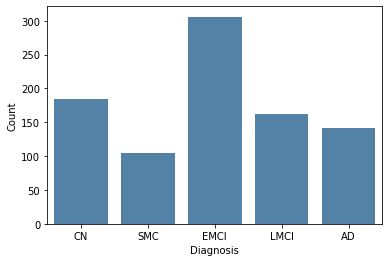

In [35]:
#Diagnosis bar plot
df_ADNIMERGE = pd.merge(df,ADNIMERGE,on='RID')

#calculate sum of values by group
df_dx = df_ADNIMERGE.groupby(['DX_bl']).agg(Count=("RID", 'count'))
df_dx = df_dx.reset_index()


#print barplot
sns.barplot(x="DX_bl",
           y="Count",
           data=df_dx,
           color='steelblue',
           order=["CN","SMC","EMCI","LMCI","AD"])

plt.xlabel("Diagnosis")
plt.ylabel("Count")

plt.show()

In [36]:
plt.savefig("./Figures/diagnosis_count.png")

<Figure size 432x288 with 0 Axes>

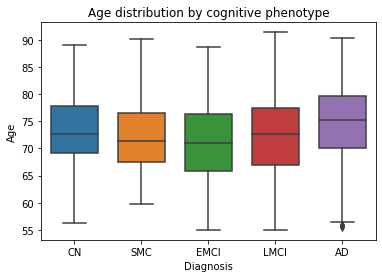

In [37]:
#Age Distribution 
sns.boxplot(x=df_ADNIMERGE["DX_bl"], y=df_ADNIMERGE["AGE"], width=0.7,
           order=["CN","SMC","EMCI","LMCI","AD"])
plt.title("Age distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("Age")
plt.show()

In [38]:
plt.savefig("./Figures/AgeDistribution.png")

<Figure size 432x288 with 0 Axes>

### Group all patients

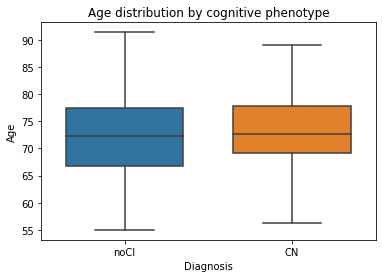

In [39]:
#Controls vs no controls
df_ADNIMERGE2 = df_ADNIMERGE.copy()
df_ADNIMERGE2['DX_bl'] = df_ADNIMERGE2['DX_bl'].replace(['SMC','EMCI','LMCI','AD'],'noCI')
df_ADNIMERGE2['DX_bl'].unique()

#BoxPlot
sns.boxplot(x=df_ADNIMERGE2["DX_bl"], y=df_ADNIMERGE2["AGE"], width=0.7);
plt.title("Age distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("Age")
plt.show()

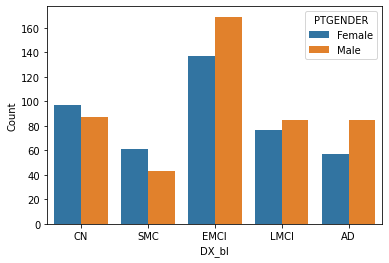

In [40]:
#Gender distribution

#calculate sum of values by group
df_sex = df_ADNIMERGE.groupby(['DX_bl', 'PTGENDER']).agg(Count=("RID", 'count'))
df_sex = df_sex.reset_index()

#print barplot
sns.barplot(x="DX_bl",
           y="Count",
           hue="PTGENDER",
           data=df_sex,
           order=["CN","SMC","EMCI","LMCI","AD"])

plt.show()

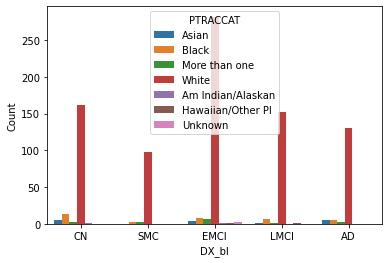

In [41]:
#Ethnic distribution

#calculate sum of values by group
df_eth = df_ADNIMERGE.groupby(['DX_bl', 'PTRACCAT']).agg(Count=("RID", 'count'))
df_eth = df_eth.reset_index()

#print barplot
sns.barplot(x="DX_bl",
           y="Count",
           hue="PTRACCAT",
           data=df_eth,
           order=["CN","SMC","EMCI","LMCI","AD"])

plt.show()

## DATA PREPROCESSING

In [42]:
from sklearn.preprocessing import StandardScaler

### ADAS-Cog

In [43]:
#get test results for the controls
ADAS_CN = ADAS[ADAS.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
ADAS_CN.shape[0]

311

#### Control data

In [44]:
#filter table to show only tests results
ADAS_CN = ADAS_CN[ADAS_columns]
ADAS_CN.head()

Q1SCORE  Q2SCORE  Q3SCORE  Q4SCORE  Q5SCORE  Q6SCORE  Q7SCORE  Q8SCORE  \
484      2.0      0.0      1.0      2.0      0.0      0.0      0.0      3.0   
489      4.0      0.0      0.0      3.0      0.0      0.0      0.0      2.0   
494      1.0      0.0      0.0      2.0      0.0      0.0      0.0      1.0   
507      2.0      0.0      0.0      1.0      0.0      0.0      1.0      0.0   
508      5.0      0.0      0.0      6.0      0.0      0.0      0.0      4.0   

     Q9SCORE  Q10SCORE  Q11SCORE  Q12SCORE  Q13SCORE  
484      0.0       0.0       0.0       0.0       0.0  
489      0.0       0.0       0.0       0.0       1.0  
494      0.0       0.0       0.0       0.0       0.0  
507      0.0       0.0       0.0       0.0       1.0  
508      0.0       0.0       0.0       0.0       1.0

In [45]:
#Control statistics

ADAS_CN.describe()

Q1SCORE     Q2SCORE     Q3SCORE     Q4SCORE     Q5SCORE     Q6SCORE  \
count  311.000000  311.000000  311.000000  311.000000  311.000000  311.000000   
mean     2.842347    0.067524    0.398714    2.681672    0.054662    0.070740   
std      1.308845    0.357329    0.552296    1.846955    0.227686    0.280804   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    0.000000    1.000000    0.000000    0.000000   
50%      3.000000    0.000000    0.000000    2.000000    0.000000    0.000000   
75%      4.000000    0.000000    1.000000    4.000000    0.000000    0.000000   
max      6.670000    5.000000    2.000000   10.000000    1.000000    2.000000   

          Q7SCORE     Q8SCORE     Q9SCORE    Q10SCORE    Q11SCORE    Q12SCORE  \
count  311.000000  311.000000  311.000000  311.000000  311.000000  311.000000   
mean     0.096463    1.926045    0.016077    0.012862    0.045016    0.019293   
std      0.326793    1.888248    0.149403    0.112860    0.236710    0.159477   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    3.000000    0.000000    0.000000    0.000000    0.000000   
max      3.000000   12.000000    2.000000    1.000000    2.000000    2.000000   

         Q13SCORE  
count  311.000000  
mean     0.389068  
std      0.686090  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      5.000000

#### Fit the scaler with the controls data

In [46]:
scaler = StandardScaler()

scaler.fit(ADAS_CN)

StandardScaler()

#### Transform data

In [47]:
ADAS_DX = pd.merge(ADAS,ADNIMERGE,on='RID')

X_ADAS = ADAS_DX[ADAS_columns] #tests scores
Y_ADAS = pd.DataFrame(ADAS_DX["DX_bl"]) #diagnosis

#scale data
X_ADAS = scaler.transform(X_ADAS)


#Convert into pandas dataframe
X_ADAS = pd.DataFrame(X_ADAS,columns=ADAS_columns)
X_ADAS.head()

Q1SCORE   Q2SCORE   Q3SCORE   Q4SCORE   Q5SCORE   Q6SCORE   Q7SCORE  \
0 -1.409881 -0.189274 -0.723084 -0.369674 -0.240464 -0.252324 -0.295656   
1  0.120646 -0.189274  1.090458 -0.369674 -0.240464 -0.252324 -0.295656   
2 -0.644618 -0.189274 -0.723084  0.172631 -0.240464 -0.252324 -0.295656   
3  0.120646 -0.189274  1.090458 -0.369674 -0.240464 -0.252324 -0.295656   
4  0.885910 -0.189274  1.090458 -0.369674 -0.240464 -0.252324 -0.295656   

    Q8SCORE   Q9SCORE  Q10SCORE  Q11SCORE  Q12SCORE  Q13SCORE  
0 -0.491216 -0.107783 -0.114146 -0.190481 -0.121169 -0.567994  
1  0.569674 -0.107783 -0.114146 -0.190481 -0.121169 -0.567994  
2 -0.491216 -0.107783 -0.114146 -0.190481 -0.121169 -0.567994  
3 -1.021661 -0.107783 -0.114146 -0.190481 -0.121169  0.891891  
4  0.569674 -0.107783 -0.114146 -0.190481 -0.121169  0.891891

### MMSE

In [48]:
#get test results for the controls
MMSE_CN = MMSE[MMSE.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
MMSE_CN.shape[0]

417

In [49]:
#filter table to show only tests results
MMSE_CN = MMSE_CN[MMSE_columns]
MMSE_CN.head()

MMDATE  MMYEAR  MMMONTH  MMDAY  MMSEASON  MMHOSPIT  MMFLOOR  MMCITY  \
0      1.0     1.0      1.0    1.0       1.0       1.0      1.0     1.0   
4      1.0     1.0      1.0    1.0       1.0       1.0      1.0     1.0   
7      1.0     1.0      1.0    1.0       1.0       1.0      1.0     1.0   
10     1.0     1.0      1.0    1.0       1.0       1.0      1.0     1.0   
11     1.0     1.0      1.0    1.0       2.0       1.0      1.0     1.0   

    MMAREA  MMSTATE  MMBALL  MMFLAG  MMTREE  MMTRIALS  MMD  MML  MMR  MMO  \
0      1.0      1.0     1.0     1.0     1.0       1.0  1.0  1.0  1.0  1.0   
4      1.0      1.0     1.0     1.0     1.0       1.0  1.0  1.0  1.0  1.0   
7      1.0      1.0     1.0     1.0     1.0       1.0  1.0  1.0  1.0  1.0   
10     1.0      1.0     1.0     1.0     1.0       1.0  1.0  1.0  1.0  1.0   
11     1.0      1.0     1.0     1.0     1.0       1.0  1.0  1.0  1.0  1.0   

    MMW  MMBALLDL  MMFLAGDL  MMTREEDL  MMWATCH  MMPENCIL  MMREPEAT  MMHAND  \
0   1.0       2.0       1.0       2.0      1.0       1.0       1.0     1.0   
4   1.0       1.0       1.0       1.0      1.0       1.0       1.0     2.0   
7   1.0       2.0       1.0       2.0      1.0       1.0       1.0     1.0   
10  1.0       1.0       2.0       1.0      1.0       1.0       1.0     1.0   
11  1.0       1.0       1.0       2.0      1.0       1.0       1.0     1.0   

    MMFOLD  MMONFLR  MMREAD  MMWRITE  MMDRAW  
0      1.0      1.0     1.0      1.0     1.0  
4      1.0      1.0     1.0      1.0     1.0  
7      1.0      1.0     1.0      1.0     1.0  
10     1.0      1.0     1.0      1.0     1.0  
11     1.0      1.0     1.0      1.0     1.0

In [50]:
#Control summary statistics
MMSE_CN.describe()

MMDATE  MMYEAR  MMMONTH       MMDAY    MMSEASON    MMHOSPIT  \
count  417.000000   417.0    417.0  417.000000  417.000000  417.000000   
mean     1.033573     1.0      1.0    1.002398    1.067146    1.016787   
std      0.180344     0.0      0.0    0.048970    0.250576    0.128625   
min      1.000000     1.0      1.0    1.000000    1.000000    1.000000   
25%      1.000000     1.0      1.0    1.000000    1.000000    1.000000   
50%      1.000000     1.0      1.0    1.000000    1.000000    1.000000   
75%      1.000000     1.0      1.0    1.000000    1.000000    1.000000   
max      2.000000     1.0      1.0    2.000000    2.000000    2.000000   

          MMFLOOR      MMCITY      MMAREA  MMSTATE  MMBALL      MMFLAG  \
count  417.000000  417.000000  417.000000    417.0   417.0  417.000000   
mean     1.038369    1.016787    1.052758      1.0     1.0    1.002398   
std      0.192317    0.128625    0.223818      0.0     0.0    0.048970   
min      1.000000    1.000000    1.000000      1.0     1.0    1.000000   
25%      1.000000    1.000000    1.000000      1.0     1.0    1.000000   
50%      1.000000    1.000000    1.000000      1.0     1.0    1.000000   
75%      1.000000    1.000000    1.000000      1.0     1.0    1.000000   
max      2.000000    2.000000    2.000000      1.0     1.0    2.000000   

           MMTREE    MMTRIALS         MMD         MML         MMR         MMO  \
count  417.000000  417.000000  417.000000  417.000000  417.000000  417.000000   
mean     1.002398    1.019185    1.002398    1.019185    1.071942    1.064748   
std      0.048970    0.229163    0.048970    0.137338    0.258703    0.246377   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      2.000000    5.000000    2.000000    2.000000    2.000000    2.000000   

              MMW    MMBALLDL    MMFLAGDL    MMTREEDL  MMWATCH    MMPENCIL  \
count  417.000000  417.000000  417.000000  417.000000    417.0  417.000000   
mean     1.009592    1.028777    1.127098    1.124700      1.0    1.002398   
std      0.097587    0.167380    0.333483    0.330776      0.0    0.048970   
min      1.000000    1.000000    1.000000    1.000000      1.0    1.000000   
25%      1.000000    1.000000    1.000000    1.000000      1.0    1.000000   
50%      1.000000    1.000000    1.000000    1.000000      1.0    1.000000   
75%      1.000000    1.000000    1.000000    1.000000      1.0    1.000000   
max      2.000000    2.000000    2.000000    2.000000      1.0    2.000000   

         MMREPEAT      MMHAND      MMFOLD     MMONFLR  MMREAD     MMWRITE  \
count  417.000000  417.000000  417.000000  417.000000   417.0  417.000000   
mean     1.091127    1.064748    1.002398    1.007194     1.0    1.007194   
std      0.288135    0.246377    0.048970    0.084615     0.0    0.084615   
min      1.000000    1.000000    1.000000    1.000000     1.0    1.000000   
25%      1.000000    1.000000    1.000000    1.000000     1.0    1.000000   
50%      1.000000    1.000000    1.000000    1.000000     1.0    1.000000   
75%      1.000000    1.000000    1.000000    1.000000     1.0    1.000000   
max      2.000000    2.000000    2.000000    2.000000     1.0    2.000000   

           MMDRAW  
count  417.000000  
mean     1.071942  
std      0.258703  
min      1.000000  
25%      1.000000  
50%      1.000000  
75%      1.000000  
max      2.000000

#### Fit the scaler with the controls data

In [51]:
scaler = StandardScaler()

scaler.fit(MMSE_CN)

StandardScaler()

#### Transform data

In [52]:
MMSE_DX = pd.merge(MMSE,ADNIMERGE,on='RID')

X_MMSE = MMSE_DX[MMSE_columns] #tests scores
Y_MMSE = pd.DataFrame(MMSE_DX["DX_bl"]) #diagnosis

#scale data
X_MMSE = scaler.transform(X_MMSE)


#Convert into pandas dataframe
X_MMSE = pd.DataFrame(X_MMSE,columns=MMSE_columns)
X_MMSE.head()

MMDATE  MMYEAR  MMMONTH      MMDAY  MMSEASON  MMHOSPIT   MMFLOOR  \
0 -0.186385     0.0      0.0  -0.049029 -0.268290 -0.130664 -0.199750   
1  5.365232     0.0      1.0  20.396078  3.727312 -0.130664  5.006246   
2 -0.186385     0.0      0.0  -0.049029 -0.268290 -0.130664 -0.199750   
3 -0.186385     0.0      0.0  -0.049029 -0.268290 -0.130664 -0.199750   
4  5.365232     1.0      0.0  -0.049029 -0.268290  7.653197 -0.199750   

     MMCITY  MMAREA  MMSTATE  MMBALL    MMFLAG    MMTREE  MMTRIALS       MMD  \
0 -0.130664  -0.236      0.0     0.0 -0.049029 -0.049029 -0.083817 -0.049029   
1 -0.130664  -0.236      0.0     0.0 -0.049029 -0.049029 -0.083817 -0.049029   
2 -0.130664  -0.236      0.0     0.0 -0.049029 -0.049029 -0.083817 -0.049029   
3 -0.130664  -0.236      0.0     0.0 -0.049029 -0.049029 -0.083817 -0.049029   
4 -0.130664  -0.236      0.0     0.0 -0.049029 -0.049029 -0.083817 -0.049029   

        MML       MMR       MMO        MMW  MMBALLDL  MMFLAGDL  MMTREEDL  \
0 -0.139857 -0.278423 -0.263117  -0.098414  5.809475 -0.381581  2.649383   
1 -0.139857 -0.278423  3.800585  10.161201  5.809475  2.620673  2.649383   
2 -0.139857 -0.278423 -0.263117  -0.098414 -0.172133  2.620673  2.649383   
3 -0.139857 -0.278423 -0.263117  -0.098414 -0.172133 -0.381581 -0.377446   
4  7.150175  3.591657  3.800585  -0.098414  5.809475  2.620673  2.649383   

   MMWATCH  MMPENCIL  MMREPEAT    MMHAND    MMFOLD   MMONFLR  MMREAD  \
0      0.0 -0.049029 -0.316645 -0.263117 -0.049029 -0.085126     0.0   
1      0.0 -0.049029 -0.316645 -0.263117 -0.049029 -0.085126     0.0   
2      0.0 -0.049029 -0.316645 -0.263117 -0.049029 -0.085126     0.0   
3      0.0 -0.049029 -0.316645  3.800585 -0.049029 -0.085126     0.0   
4      0.0 -0.049029 -0.316645 -0.263117 -0.049029 -0.085126     0.0   

    MMWRITE    MMDRAW  
0 -0.085126 -0.278423  
1 -0.085126 -0.278423  
2 -0.085126  3.591657  
3 -0.085126 -0.278423  
4 -0.085126  3.591657

### MOCA

In [53]:
#get test results for the controls
MOCA_CN = MOCA[MOCA.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
MOCA_CN.shape[0]

306

In [54]:
#filter table to show only tests results
MOCA_CN = MOCA_CN[MOCA_columns]
MOCA_CN.head()

TRAILS  CUBE  CLOCKCON  CLOCKNO  CLOCKHAN  LION  RHINO  CAMEL  IMMT1W1  \
484     1.0   0.0       1.0      0.0       1.0   1.0    0.0    1.0      1.0   
489     1.0   1.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0   
494     1.0   1.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0   
507     1.0   1.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0   
508     1.0   1.0       1.0      1.0       1.0   1.0    1.0    1.0      0.0   

     IMMT1W2  IMMT1W3  IMMT1W4  IMMT1W5  IMMT2W1  IMMT2W2  IMMT2W3  IMMT2W4  \
484      1.0      0.0      1.0      1.0      1.0      1.0      1.0      1.0   
489      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
494      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
507      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
508      1.0      1.0      1.0      1.0      0.0      1.0      1.0      1.0   

     IMMT2W5  DIGFOR  DIGBACK  LETTERS  SERIAL1  SERIAL2  SERIAL3  SERIAL4  \
484      1.0     1.0      1.0      0.0      1.0      1.0      0.0      0.0   
489      1.0     1.0      0.0      0.0      1.0      1.0      1.0      1.0   
494      1.0     1.0      1.0      0.0      1.0      1.0      1.0      1.0   
507      1.0     1.0      1.0      0.0      1.0      1.0      1.0      1.0   
508      1.0     0.0      1.0      0.0      1.0      1.0      1.0      1.0   

     SERIAL5  REPEAT1  REPEAT2  FFLUENCY  ABSTRAN  ABSMEAS  DELW1  DELW2  \
484      0.0      1.0      1.0      17.0      1.0      0.0    1.0    1.0   
489      1.0      1.0      1.0      15.0      1.0      1.0    3.0    2.0   
494      1.0      1.0      1.0      22.0      1.0      1.0    1.0    3.0   
507      1.0      1.0      0.0      20.0      1.0      1.0    1.0    1.0   
508      1.0      1.0      1.0      13.0      1.0      1.0    3.0    3.0   

     DELW3  DELW4  DELW5  DATE  MONTH  YEAR  DAY  PLACE  CITY  
484    1.0    1.0    1.0   1.0    1.0   1.0  1.0    1.0   1.0  
489    3.0    3.0    3.0   1.0    1.0   1.0  1.0    1.0   1.0  
494    3.0    2.0    2.0   1.0    1.0   1.0  1.0    1.0   1.0  
507    1.0    1.0    1.0   1.0    1.0   1.0  1.0    1.0   1.0  
508    3.0    3.0    3.0   1.0    1.0   1.0  1.0    1.0   1.0

In [55]:
#Control summary statistics
MOCA_CN.describe()

TRAILS        CUBE    CLOCKCON     CLOCKNO    CLOCKHAN        LION  \
count  306.000000  306.000000  306.000000  306.000000  306.000000  306.000000   
mean     0.921569    0.705882    0.993464    0.924837    0.826797    0.996732   
std      0.269290    0.456391    0.080713    0.264087    0.379042    0.057166   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    0.000000    1.000000    1.000000    1.000000    1.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            RHINO       CAMEL     IMMT1W1     IMMT1W2     IMMT1W3     IMMT1W4  \
count  306.000000  306.000000  306.000000  306.000000  306.000000  306.000000   
mean     0.918301    0.996732    0.937908    0.960784    0.931373    0.911765   
std      0.274355    0.057166    0.241717    0.194426    0.253234    0.284101   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          IMMT1W5     IMMT2W1     IMMT2W2     IMMT2W3     IMMT2W4     IMMT2W5  \
count  306.000000  306.000000  306.000000  306.000000  306.000000  306.000000   
mean     0.977124    0.960784    0.983660    0.986928    0.977124    0.990196   
std      0.149752    0.194426    0.126987    0.113769    0.149752    0.098690   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           DIGFOR     DIGBACK     LETTERS     SERIAL1     SERIAL2     SERIAL3  \
count  306.000000  306.000000  306.000000  306.000000  306.000000  306.000000   
mean     0.960784    0.934641    0.209150    0.993464    0.905229    0.901961   
std      0.194426    0.247564    0.568617    0.080713    0.293378    0.297855   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    0.000000    1.000000    1.000000    1.000000   
50%      1.000000    1.000000    0.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    0.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    5.000000    1.000000    1.000000    1.000000   

          SERIAL4     SERIAL5     REPEAT1     REPEAT2    FFLUENCY     ABSTRAN  \
count  306.000000  306.000000  306.000000  306.000000  306.000000  306.000000   
mean     0.901961    0.892157    0.944444    0.800654   14.725490    0.947712   
std      0.297855    0.310690    0.229437    0.400163    4.786916    0.222971   
min      0.000000    0.000000    0.000000    0.000000    1.000000    0.000000   
25%      1.000000    1.000000    1.000000    1.000000   11.250000    1.000000   
50%      1.000000    1.000000    1.000000    1.000000   15.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000   18.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000   28.000000    1.000000   

          ABSMEAS       DELW1       DELW2       DELW3       DELW4       DELW5  \
count  306.000000  306.000000  306.000000  306.000000  306.000000  306.000000   
mean     0.898693    1.411765    1.457516    1.591503    1.552288    1.437908   
std      0.302229    0.988653    0.797430    1.001536    0.901117    0.731762   
min      0.000000    0.000000    0.00

#### Fit the scaler with the controls data

In [56]:
scaler = StandardScaler()

scaler.fit(MOCA_CN)

StandardScaler()

#### Transform data

In [57]:
MOCA_DX = pd.merge(MOCA,ADNIMERGE,on='RID')

X_MOCA = MOCA_DX[MOCA_columns] #tests scores
Y_MOCA = pd.DataFrame(MOCA_DX["DX_bl"]) #diagnosis

#scale data
X_MOCA = scaler.transform(X_MOCA)

#Convert into pandas dataframe
X_MOCA = pd.DataFrame(X_MOCA,columns=MOCA_columns)
X_MOCA.head()

TRAILS      CUBE  CLOCKCON   CLOCKNO  CLOCKHAN     LION     RHINO  \
0  0.29173  0.645497  0.081111  0.285083  0.457697  0.05726  0.298275   
1  0.29173 -1.549193  0.081111  0.285083  0.457697  0.05726  0.298275   
2  0.29173 -1.549193  0.081111  0.285083  0.457697  0.05726  0.298275   
3  0.29173  0.645497  0.081111  0.285083  0.457697  0.05726  0.298275   
4  0.29173 -1.549193  0.081111  0.285083  0.457697  0.05726  0.298275   

     CAMEL   IMMT1W1   IMMT1W2   IMMT1W3   IMMT1W4   IMMT1W5   IMMT2W1  \
0  0.05726  0.257298  0.202031  0.271448  0.311086  0.153008  0.202031   
1  0.05726  0.257298  0.202031  0.271448  0.311086  0.153008  0.202031   
2  0.05726  0.257298  0.202031  0.271448  0.311086  0.153008  0.202031   
3  0.05726  0.257298  0.202031  0.271448  0.311086  0.153008  0.202031   
4  0.05726  0.257298  0.202031  0.271448  0.311086  0.153008  0.202031   

    IMMT2W2   IMMT2W3   IMMT2W4   IMMT2W5    DIGFOR   DIGBACK   LETTERS  \
0  0.128885  0.115087  0.153008  0.099504  0.202031  0.264443  1.393107   
1  0.128885  0.115087  0.153008  0.099504  0.202031  0.264443  1.393107   
2  0.128885  0.115087  0.153008  0.099504  0.202031  0.264443 -0.368425   
3  0.128885  0.115087  0.153008  0.099504  0.202031  0.264443 -0.368425   
4  0.128885  0.115087  0.153008  0.099504  0.202031  0.264443 -0.368425   

    SERIAL1   SERIAL2  SERIAL3  SERIAL4   SERIAL5   REPEAT1   REPEAT2  \
0  0.081111  0.323563  0.32969  0.32969  0.347677  0.242536  0.498979   
1  0.081111  0.323563  0.32969  0.32969  0.347677  0.242536  0.498979   
2  0.081111  0.323563  0.32969  0.32969  0.347677  0.242536  0.498979   
3  0.081111  0.323563  0.32969  0.32969  0.347677  0.242536  0.498979   
4  0.081111 -3.090586 -3.03315 -3.03315 -2.876235  0.242536  0.498979   

   FFLUENCY   ABSTRAN   ABSMEAS     DELW1     DELW2     DELW3     DELW4  \
0  3.196114  0.234888  0.335749  0.595961 -0.574679  0.408538 -0.613896   
1  1.103665 -4.257347  0.335749 -1.430307  0.681405 -1.591665  1.609208   
2  0.685175  0.234888  0.335749 -0.417173 -0.574679 -1.591665 -1.725448   
3  1.522155  0.234888  0.335749  1.609095  1.937488  0.408538  0.497656   
4 -0.151805  0.234888  0.335749  0.595961 -0.574679 -1.591665  0.497656   

      DELW5      DATE     MONTH     YEAR  DAY    PLACE      CITY  
0 -0.599410  0.193101  0.081111  0.05726  0.0  0.05726  0.099504  
1 -1.968212  0.193101  0.081111  0.05726  0.0  0.05726  0.099504  
2 -0.599410  0.193101  0.081111  0.05726  0.0  0.05726  0.099504  
3  0.769392  0.193101  0.081111  0.05726  0.0  0.05726  0.099504  
4 -0.599410  0.193101  0.081111  0.05726  0.0  0.05726  0.099504

### Merged data

In [58]:
#get test results for the controls
merged_CN = df[df.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
merged_CN.shape[0]

184

In [59]:
#filter table to show only tests results
merged_columns = ADAS_columns + MMSE_columns + MOCA_columns
merged_CN = merged_CN[merged_columns]
merged_CN.head()

Q1SCORE  Q2SCORE  Q3SCORE  Q4SCORE  Q5SCORE  Q6SCORE  Q7SCORE  Q8SCORE  \
127      2.0      0.0      1.0      2.0      0.0      0.0      0.0      3.0   
129      4.0      0.0      0.0      3.0      0.0      0.0      0.0      2.0   
131      1.0      0.0      0.0      2.0      0.0      0.0      0.0      1.0   
137      2.0      0.0      0.0      1.0      0.0      0.0      1.0      0.0   
138      5.0      0.0      0.0      6.0      0.0      0.0      0.0      4.0   

     Q9SCORE  Q10SCORE  Q11SCORE  Q12SCORE  Q13SCORE  MMDATE  MMYEAR  MMMONTH  \
127      0.0       0.0       0.0       0.0       0.0     1.0     1.0      1.0   
129      0.0       0.0       0.0       0.0       1.0     1.0     1.0      1.0   
131      0.0       0.0       0.0       0.0       0.0     1.0     1.0      1.0   
137      0.0       0.0       0.0       0.0       1.0     1.0     1.0      1.0   
138      0.0       0.0       0.0       0.0       1.0     1.0     1.0      1.0   

     MMDAY  MMSEASON  MMHOSPIT  MMFLOOR  MMCITY  MMAREA  MMSTATE  MMBALL  \
127    1.0       1.0       1.0      1.0     1.0     1.0      1.0     1.0   
129    1.0       1.0       1.0      1.0     1.0     1.0      1.0     1.0   
131    1.0       1.0       1.0      1.0     1.0     1.0      1.0     1.0   
137    1.0       1.0       1.0      1.0     1.0     1.0      1.0     1.0   
138    1.0       1.0       1.0      1.0     1.0     2.0      1.0     1.0   

     MMFLAG  MMTREE  MMTRIALS  MMD  MML  MMR  MMO  MMW  MMBALLDL  MMFLAGDL  \
127     1.0     1.0       1.0  1.0  1.0  1.0  1.0  1.0       1.0       1.0   
129     1.0     1.0       1.0  1.0  1.0  1.0  1.0  1.0       1.0       1.0   
131     1.0     1.0       1.0  1.0  1.0  1.0  1.0  1.0       1.0       1.0   
137     1.0     1.0       1.0  1.0  1.0  1.0  1.0  1.0       1.0       1.0   
138     1.0     1.0       1.0  1.0  1.0  1.0  1.0  1.0       1.0       1.0   

     MMTREEDL  MMWATCH  MMPENCIL  MMREPEAT  MMHAND  MMFOLD  MMONFLR  MMREAD  \
127       1.0      1.0       1.0       1.0     2.0     1.0      1.0     1.0   
129       1.0      1.0       1.0       1.0     1.0     1.0      1.0     1.0   
131       2.0      1.0       1.0       1.0     1.0     1.0      1.0     1.0   
137       1.0      1.0       1.0       1.0     1.0     1.0      1.0     1.0   
138       1.0      1.0       1.0       1.0     1.0     1.0      1.0     1.0   

     MMWRITE  MMDRAW  TRAILS  CUBE  CLOCKCON  CLOCKNO  CLOCKHAN  LION  RHINO  \
127      1.0     1.0     1.0   0.0       1.0      0.0       1.0   1.0    0.0   
129      1.0     1.0     1.0   1.0       1.0      1.0       1.0   1.0    1.0   
131      1.0     1.0     1.0   1.0       1.0      1.0       1.0   1.0    1.0   
137      1.0     1.0     1.0   1.0       1.0      1.0       1.0   1.0    1.0   
138      1.0     1.0     1.0   1.0       1.0      1.0       1.0   1.0    1.0   

     CAMEL  IMMT1W1  IMMT1W2  IMMT1W3  IMMT1W4  IMMT1W5  IMMT2W1  IMMT2W2  \
127    1.0      1.0      1.0      0.0      1.0      1.0      1.0      1.0   
129    1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
131    1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
137    1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
138    1.0      0.0      1.0      1.0      1.0      1.0      0.0      1.0   

     IMMT2W3  IMMT2W4  IMMT2W5  DIGFOR  DIGBACK  LETTERS  SERIAL1  SERIAL2  \
127      1.0      1.0      1.0     1.0      1.0      0.0      1.0      1.0   
129      1.0      1.0      1.0     1.0      0.0      0.0      1.0      1.0   
131      1.0      1.0      1.0     1.0      1.0      0.0      1.0      1.0   
137      1.0      1.0      1.0     1.0      1.0      0.0      1.0      1.0   
138      1.0      1.0      1.0     0.0      1.0      0.0      1.0      1.0   

     SERIAL3  SERIAL4  SERIAL5  REPEAT1  REPEAT2  FFLUENCY  ABSTRAN  ABSMEAS  \
127      0.0      0.0      0.0      1.0      1.0      17.0      1.0      0.0   
129      1.0      1.0      1.0      1.0      1.0      15.0      1.0  

#### Fit the scaler with the controls data

In [60]:
scaler = StandardScaler()

scaler.fit(merged_CN)

StandardScaler()

#### Transform data

In [61]:
merged_DX = pd.merge(df,ADNIMERGE,on='RID')

X_merged = merged_DX[merged_columns] #tests scores
Y_merged = pd.DataFrame(merged_DX["DX_bl"]) #diagnosis

#scale data
X_merged = scaler.transform(X_merged)

#Convert into pandas dataframe
X_merged = pd.DataFrame(X_merged,columns=merged_columns)
X_merged.head()

C:\Users\anaso\AppData\Local\Temp\ipykernel_9828\759974316.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VISCODE_x', 'update_stamp_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_DX = pd.merge(df,ADNIMERGE,on='RID')


Q1SCORE  Q2SCORE   Q3SCORE   Q4SCORE   Q5SCORE   Q6SCORE   Q7SCORE  \
0 -1.508121 -0.19027 -0.711416 -0.480655 -0.286972 -0.273434 -0.312115   
1  0.020773 -0.19027  1.185693 -0.480655 -0.286972 -0.273434 -0.312115   
2 -0.743674 -0.19027 -0.711416  0.065274 -0.286972 -0.273434 -0.312115   
3  0.020773 -0.19027  1.185693 -0.480655 -0.286972 -0.273434 -0.312115   
4  0.785220 -0.19027  1.185693 -0.480655 -0.286972 -0.273434 -0.312115   

    Q8SCORE   Q9SCORE  Q10SCORE  Q11SCORE  Q12SCORE  Q13SCORE    MMDATE  \
0 -0.515572 -0.140692 -0.149071 -0.226779 -0.158334 -0.676418 -0.183597   
1  0.550329 -0.140692 -0.149071 -0.226779 -0.158334 -0.676418 -0.183597   
2 -0.515572 -0.140692 -0.149071 -0.226779 -0.158334 -0.676418 -0.183597   
3 -1.048522 -0.140692 -0.149071 -0.226779 -0.158334  0.961225 -0.183597   
4  0.550329 -0.140692 -0.149071 -0.226779 -0.158334  0.961225 -0.183597   

   MMYEAR  MMMONTH  MMDAY  MMSEASON  MMHOSPIT   MMFLOOR    MMCITY    MMAREA  \
0     0.0      0.0    0.0 -0.286972 -0.149071 -0.183597 -0.149071 -0.239732   
1     0.0      0.0    0.0 -0.286972 -0.149071 -0.183597 -0.149071 -0.239732   
2     0.0      0.0    0.0 -0.286972 -0.149071 -0.183597 -0.149071 -0.239732   
3     0.0      0.0    0.0 -0.286972 -0.149071 -0.183597 -0.149071 -0.239732   
4     0.0      0.0    0.0 -0.286972 -0.149071 -0.183597  6.708204 -0.239732   

   MMSTATE  MMBALL  MMFLAG  MMTREE  MMTRIALS       MMD       MML       MMR  \
0      0.0     0.0     0.0     0.0 -0.099394 -0.073922  5.446712 -0.329293   
1      0.0     0.0     0.0     0.0 -0.099394 -0.073922 -0.183597 -0.329293   
2      0.0     0.0     0.0     0.0 -0.099394 -0.073922 -0.183597 -0.329293   
3      0.0     0.0     0.0     0.0 -0.099394 -0.073922 -0.183597  3.036811   
4      0.0     0.0     0.0     0.0 -0.099394 -0.073922 -0.183597 -0.329293   

        MMO       MMW  MMBALLDL  MMFLAGDL  MMTREEDL  MMWATCH  MMPENCIL  \
0 -0.286972 -0.104828 -0.167132  2.713602 -0.329293      0.0 -0.073922   
1 -0.286972 -0.104828 -0.167132 -0.368514 -0.329293      0.0 -0.073922   
2 -0.286972 -0.104828 -0.167132 -0.368514 -0.329293      0.0 -0.073922   
3  3.484660 -0.104828 -0.167132 -0.368514  3.036811      0.0 -0.073922   
4 -0.286972 -0.104828 -0.167132 -0.368514  3.036811      0.0 -0.073922   

   MMREPEAT    MMHAND  MMFOLD   MMONFLR  MMREAD    MMWRITE    MMDRAW  \
0 -0.349215 -0.252158     0.0 -0.073922     0.0  -0.073922 -0.264135   
1 -0.349215  3.965763     0.0 -0.073922     0.0  -0.073922 -0.264135   
2 -0.349215 -0.252158     0.0 -0.073922     0.0  -0.073922 -0.264135   
3 -0.349215 -0.252158     0.0 -0.073922     0.0  -0.073922 -0.264135   
4 -0.349215 -0.252158     0.0 -0.073922     0.0  13.527749 -0.264135   

     TRAILS      CUBE  CLOCKCON   CLOCKNO  CLOCKHAN  LION     RHINO  CAMEL  \
0  0.308607  0.644503  0.104828  0.319055  0.501698   0.0  0.308607    0.0   
1  0.308607 -1.551582  0.104828  0.319055  0.501698   0.0  0.308607    0.0   
2  0.308607 -1.551582  0.104828  0.319055  0.501698   0.0  0.308607    0.0   
3  0.308607  0.644503  0.104828  0.319055  0.501698   0.0  0.308607    0.0   
4  0.308607 -1.551582  0.104828  0.319055  0.501698   0.0  0.308607    0.0   

    IMMT1W1   IMMT1W2   IMMT1W3   IMMT1W4   IMMT1W5   IMMT2W1   IMMT2W2  \
0  0.275723  0.183597  0.319055  0.319055  0.167132  0.198867  0.149071   
1  0.275723  0.183597  0.319055  0.319055  0.167132  0.198867  0.149071   
2  0.275723  0.183597  0.319055  0.319055  0.167132  0.198867  0.149071   
3  0.275723  0.183597  0.319055  0.319055  0.167132  0.198867  0.149071   
4  0.275723  0.183597  0.319055  0.319055  0.167132  0.198867  0.149071   

    IMMT2W3   IMMT2W4   IMMT2W5    DIGFOR   DIGBACK   LETTERS  SERIAL1  \
0  0.104828  0.183597  0.128742  0.183597  0.286972  1.133893      0.0   
1  0.104828  0.183597  0.128742  0.183597  0.286972  1.133893      0.0   
2  0.104828  0.183597  0.128742  0.183597  0.286972 -0.377964      0.0   
3  0.104828  0.183597  0.128742  0.183597  0.286972 -0.377964      0.0

## ADJACENCY MATRIX

Simple correlation (a.k.a. Pearson correlation coefficient) may not give a complete picture while trying to understand the relationship between two variables (A and B) especially when there exist other influencing variables that affect A (and/or) B.
In fact, simple correlation mainly focuses on finding the influence of each variable on the other.

Whereas **partial correlation** is used to find the refined relationship between two variables with the effect of the other influencing variables being excluded/controlled.

#### Import required packages

In [62]:
#!pip install pingouin

In [63]:
from pingouin import partial_corr

#### Create partial correlation function

In [64]:
def par_corr(data_df):
    """
    Compute partial pairwise correlation of columns. 
    When a pair of columns are picked, then all other columns are treated as control variables. 
    
    @param data_df DataFrame
    @return DataFrame, whose data is a symmetric matrix
    """ 
    
    n = data_df.shape[1] #total number of tests
    mat = np.empty((n, n)) #empty matrix to store results 
    np.fill_diagonal(mat, 1) #diagonal elements have correlation equal to 1.0
    
    for i in range(n):
        for j in range(i + 1, n):
            #get columns names
            x = data_df.columns[i]
            y = data_df.columns[j]
            xy_colnames = [data_df.columns[index] for index in [i,j]]
            covar = [ var for var in data_df.columns if var not in xy_colnames]
            
            #partial correlation
            corr_df = partial_corr(data=data_df, x=x, y=y, covar=covar, method='pearson') #partial correlation stats
            corr = corr_df.iloc[0]['r'] #get partial correlation value

            #store results
            mat[i, j] = corr
            mat[j, i] = corr
            
    return pd.DataFrame(mat, index=data_df.columns, columns=data_df.columns)

### ADAS-Cog

#### Divide data by diagnostic group

In [65]:
#Get indexes of subjects belonging to each group
ADAS_indexes = {} #Create empty dictionary
dx_groups = ["CN","SMC","EMCI","LMCI","AD"] #diagnostic groups list

for dx in dx_groups:
    ADAS_indexes[dx] = Y_ADAS.index[Y_ADAS['DX_bl'] == dx].tolist()

In [66]:
#Filter results table by diagnostic group
X_ADAS_CN = X_ADAS.iloc[ADAS_indexes["CN"]]
X_ADAS_SMC = X_ADAS.iloc[ADAS_indexes["SMC"]]
X_ADAS_EMCI = X_ADAS.iloc[ADAS_indexes["EMCI"]]
X_ADAS_LMCI = X_ADAS.iloc[ADAS_indexes["LMCI"]]
X_ADAS_AD = X_ADAS.iloc[ADAS_indexes["AD"]]

print("Number of instances CN: ", X_ADAS_CN.shape[0])
print("Number of instances SMC: ", X_ADAS_SMC.shape[0])
print("Number of instances EMCI: ", X_ADAS_EMCI.shape[0])
print("Number of instances LMCI: ", X_ADAS_LMCI.shape[0])
print("Number of instances AD: ", X_ADAS_AD.shape[0])

Number of instances CN:  311
Number of instances SMC:  348
Number of instances EMCI:  415
Number of instances LMCI:  284
Number of instances AD:  219


#### Create partial correlation matrixes

In [67]:
ADAS_CN_mx = par_corr(X_ADAS_CN)
ADAS_SMC_mx = par_corr(X_ADAS_SMC)
ADAS_EMCI_mx = par_corr(X_ADAS_EMCI)
ADAS_LMCI_mx = par_corr(X_ADAS_LMCI)
ADAS_AD_mx = par_corr(X_ADAS_AD)

#### Plot correlation matrixes as heatmaps

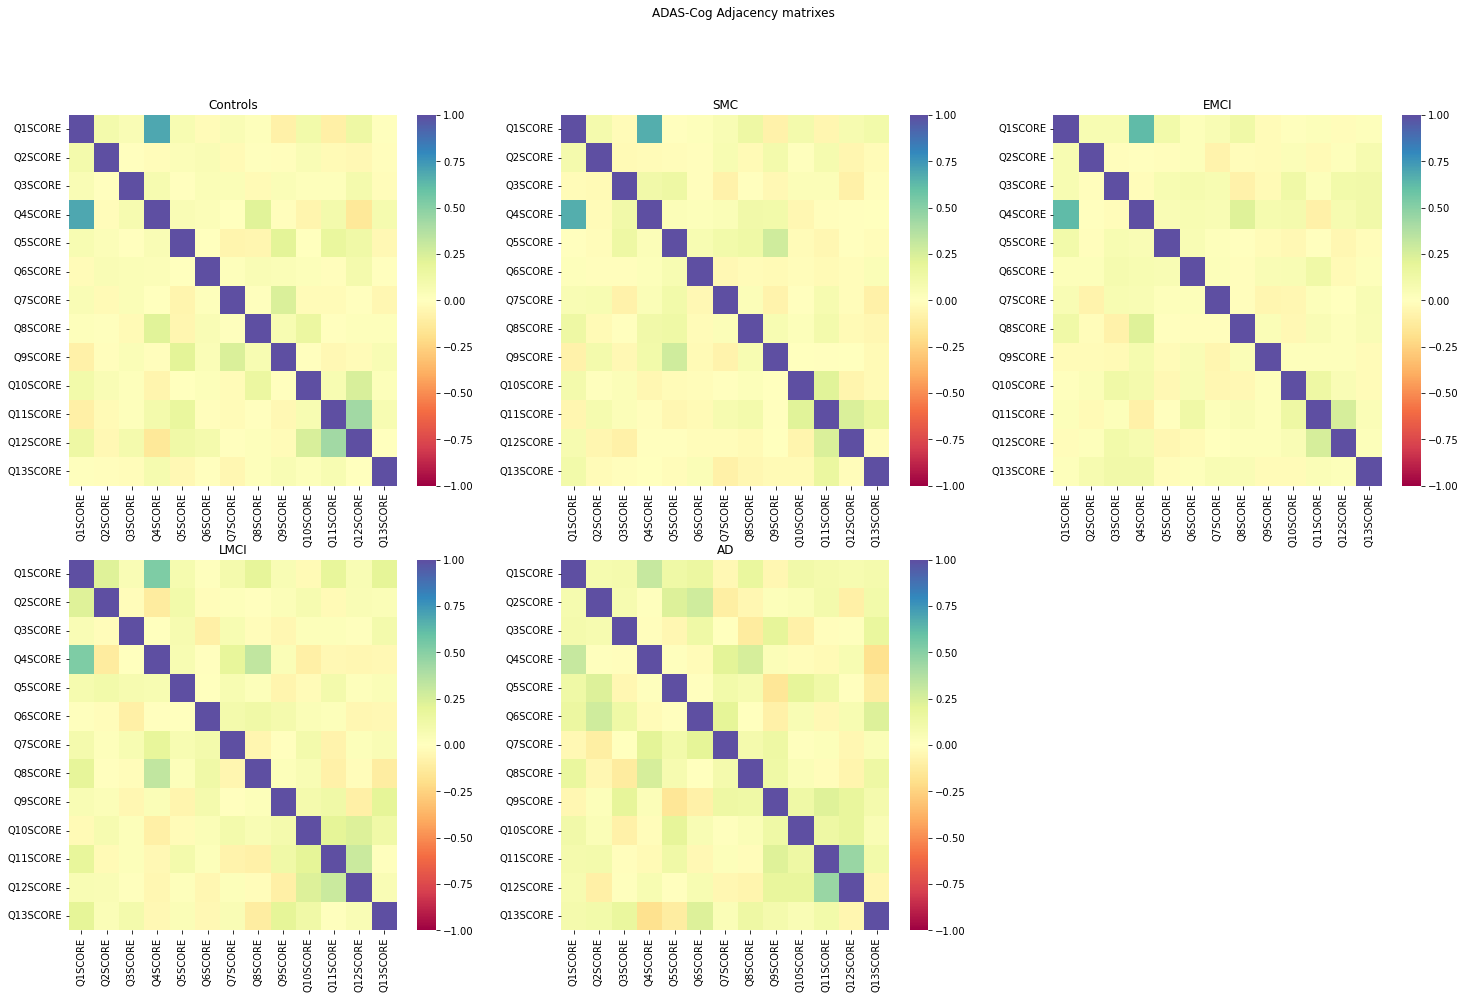

In [68]:
fig, axes = plt.subplots(2,3, figsize=(25,15))
axes[1][2].set_visible(False)

axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])

fig.suptitle('ADAS-Cog Adjacency matrixes')

sns.heatmap(ax=axes[0,0],data=ADAS_CN_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[0,1],data=ADAS_SMC_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[0,2],data=ADAS_EMCI_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[1,0],data=ADAS_LMCI_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[1,1],data=ADAS_AD_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)

#add title to subfigures
axes[0,0].title.set_text("Controls")
axes[0,1].title.set_text("SMC")
axes[0,2].title.set_text("EMCI")
axes[1,0].title.set_text("LMCI")
axes[1,1].title.set_text("AD")

plt.show()

### MMSE

#### Divide data by diagnostic group

In [69]:
#Get indexes of subjects belonging to each group
MMSE_indexes = {} #Create empty dictionary
dx_groups = ["CN","SMC","EMCI","LMCI","AD"] #diagnostic groups list

for dx in dx_groups:
    MMSE_indexes[dx] = Y_MMSE.index[Y_MMSE['DX_bl'] == dx].tolist()

In [70]:
#Filter results table by diagnostic group
X_MMSE_CN = X_MMSE.iloc[MMSE_indexes["CN"]]
X_MMSE_SMC = X_MMSE.iloc[MMSE_indexes["SMC"]]
X_MMSE_EMCI = X_MMSE.iloc[MMSE_indexes["EMCI"]]
X_MMSE_LMCI = X_MMSE.iloc[MMSE_indexes["LMCI"]]
X_MMSE_AD = X_MMSE.iloc[MMSE_indexes["AD"]]

print("Number of instances CN: ", X_MMSE_CN.shape[0])
print("Number of instances SMC: ", X_MMSE_SMC.shape[0])
print("Number of instances EMCI: ", X_MMSE_EMCI.shape[0])
print("Number of instances LMCI: ", X_MMSE_LMCI.shape[0])
print("Number of instances AD: ", X_MMSE_AD.shape[0])

Number of instances CN:  417
Number of instances SMC:  106
Number of instances EMCI:  312
Number of instances LMCI:  566
Number of instances AD:  339


In [71]:
X_MMSE_CN

MMDATE  MMYEAR  MMMONTH     MMDAY  MMSEASON  MMHOSPIT  MMFLOOR  \
0    -0.186385     0.0      0.0 -0.049029 -0.268290 -0.130664 -0.19975   
3    -0.186385     0.0      0.0 -0.049029 -0.268290 -0.130664 -0.19975   
5    -0.186385     0.0      0.0 -0.049029 -0.268290 -0.130664 -0.19975   
6    -0.186385     0.0      0.0 -0.049029 -0.268290 -0.130664 -0.19975   
7    -0.186385     0.0      0.0 -0.049029  3.727312 -0.130664 -0.19975   
...        ...     ...      ...       ...       ...       ...      ...   
1525 -0.186385     0.0      0.0 -0.049029 -0.268290 -0.130664 -0.19975   
1534 -0.186385     0.0      0.0 -0.049029  3.727312 -0.130664 -0.19975   
1536 -0.186385     0.0      0.0 -0.049029  3.727312 -0.130664 -0.19975   
1586 -0.186385     0.0      0.0 -0.049029 -0.268290 -0.130664 -0.19975   
1587 -0.186385     0.0      0.0 -0.049029 -0.268290 -0.130664 -0.19975   

        MMCITY   MMAREA  MMSTATE  MMBALL    MMFLAG    MMTREE  MMTRIALS  \
0    -0.130664 -0.23600      0.0     0.0 -0.049029 -0.049029 -0.083817   
3    -0.130664 -0.23600      0.0     0.0 -0.049029 -0.049029 -0.083817   
5    -0.130664 -0.23600      0.0     0.0 -0.049029 -0.049029 -0.083817   
6    -0.130664 -0.23600      0.0     0.0 -0.049029 -0.049029 -0.083817   
7    -0.130664 -0.23600      0.0     0.0 -0.049029 -0.049029 -0.083817   
...        ...      ...      ...     ...       ...       ...       ...   
1525 -0.130664 -0.23600      0.0     0.0 -0.049029 -0.049029 -0.083817   
1534 -0.130664  4.23728      0.0     0.0 -0.049029 -0.049029 -0.083817   
1536 -0.130664 -0.23600      0.0     0.0 -0.049029 -0.049029 -0.083817   
1586 -0.130664 -0.23600      0.0     0.0 -0.049029 -0.049029 -0.083817   
1587 -0.130664 -0.23600      0.0     0.0 -0.049029 -0.049029 -0.083817   

           MMD       MML       MMR       MMO       MMW  MMBALLDL  MMFLAGDL  \
0    -0.049029 -0.139857 -0.278423 -0.263117 -0.098414  5.809475 -0.381581   
3    -0.049029 -0.139857 -0.278423 -0.263117 -0.098414 -0.172133 -0.381581   
5    -0.049029 -0.139857 -0.278423 -0.263117 -0.098414  5.809475 -0.381581   
6    -0.049029 -0.139857 -0.278423 -0.263117 -0.098414 -0.172133  2.620673   
7    -0.049029 -0.139857 -0.278423 -0.263117 -0.098414 -0.172133 -0.381581   
...        ...       ...       ...       ...       ...       ...       ...   
1525 -0.049029 -0.139857 -0.278423 -0.263117 -0.098414 -0.172133 -0.381581   
1534 -0.049029 -0.139857 -0.278423 -0.263117 -0.098414 -0.172133 -0.381581   
1536 -0.049029 -0.139857 -0.278423 -0.263117 -0.098414 -0.172133 -0.381581   
1586 -0.049029 -0.139857 -0.278423 -0.263117 -0.098414 -0.172133 -0.381581   
1587 -0.049029 -0.139857 -0.278423 -0.263117 -0.098414 -0.172133 -0.381581   

      MMTREEDL  MMWATCH  MMPENCIL  MMREPEAT    MMHAND    MMFOLD   MMONFLR  \
0     2.649383      0.0 -0.049029 -0.316645 -0.263117 -0.049029 -0.085126   
3    -0.377446      0.0 -0.049029 -0.316645  3.800585 -0.049029 -0.085126   
5     2.649383      0.0 -0.049029 -0.316645 -0.263117 -0.049029 -0.085126   
6    -0.377446      0.0 -0.049029 -0.316645 -0.263117 -0.049029 -0.085126   
7     2.649383      0.0 -0.049029 -0.316645 -0.263117 -0.049029 -0.085126   
...        ...      ...       ...       ...       ...       ...       ...   
1525 -0.377446      0.0 -0.049029 -0.316645 -0.263117 -0.049029 -0.085126   
1534 -0.377446      0.0 -0.049029 -0.316645 -0.263117 -0.049029 -0.085126   
1536 -0.377446      0.0 -0.049029 -0.316645 -0.263117 -0.049029 -0.085126   
1586 -0.377446      0.0 -0.049029 -0.316645 -0.263117 -0.049029 -0.085126   
1587 -0.377446      0.0 -0.049029 -0.316645 -0.263117 -0.049029 -0.085126   

      MMREAD   MMWRITE    MMDRAW  
0        0.0 -0.085126 -0.278423  
3        0.0 -0.085126 -0.278423  
5        0.0 -0.085126 -0.278423  
6        0.0 -0.085126 -0.278423  
7        0.0 -0.085126 -0.278423  
...      ...       ...       ...  
1525     0.0 -0.085126 -0.278423  
1534     0.0 -0.085126 -0.278423  
1536     0.0 -0.085126 -0.278423  
1586     0.0 -0.08

#### Create partial correlation matrixes

In [72]:
MMSE_CN_mx = par_corr(X_MMSE_CN)
MMSE_SMC_mx = par_corr(X_MMSE_SMC)
MMSE_EMCI_mx = par_corr(X_MMSE_EMCI)
MMSE_LMCI_mx = par_corr(X_MMSE_LMCI)
MMSE_AD_mx = par_corr(X_MMSE_AD)

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_di

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_di

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_di

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D

#### Plot correlation matrixes as heatmaps

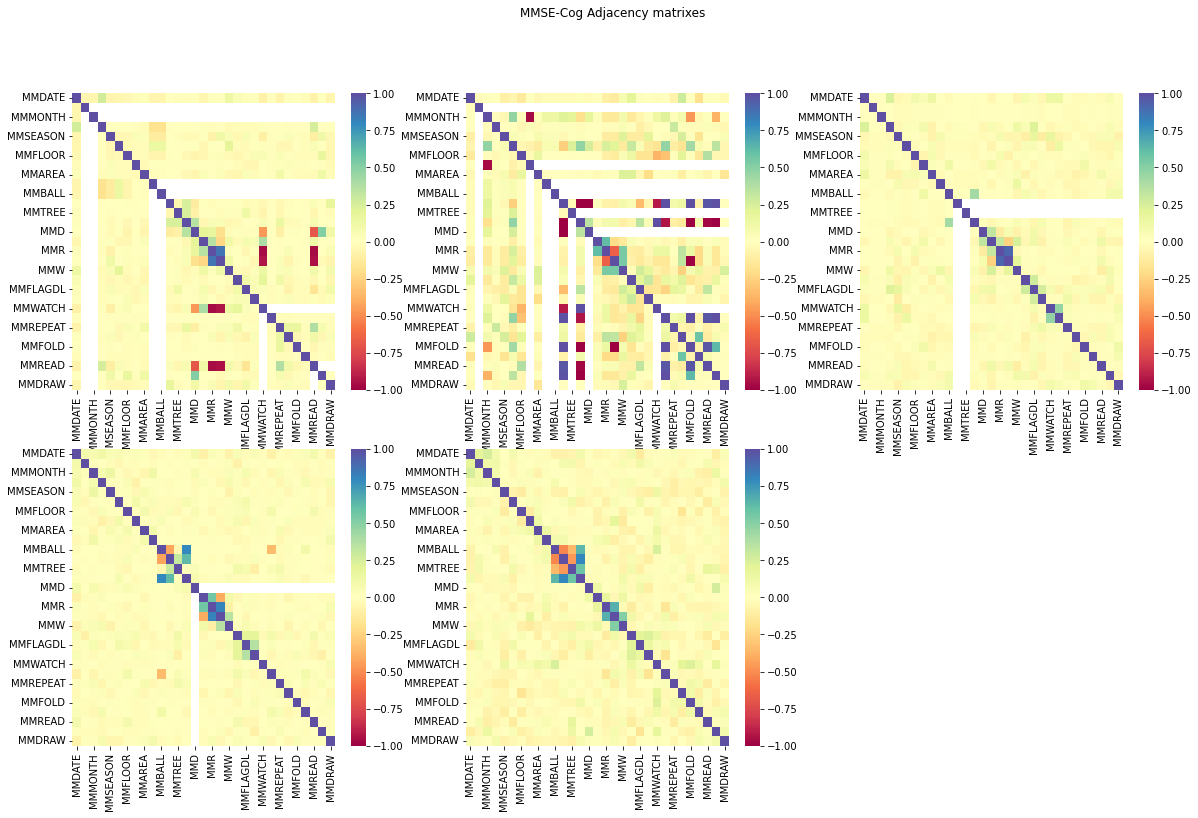

In [73]:
fig, axes = plt.subplots(2,3, figsize=(20,12))
axes[1][2].set_visible(False)

axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])

fig.suptitle('MMSE-Cog Adjacency matrixes')

sns.heatmap(ax=axes[0,0],data=MMSE_CN_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[0,1],data=MMSE_SMC_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[0,2],data=MMSE_EMCI_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[1,0],data=MMSE_LMCI_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[1,1],data=MMSE_AD_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)

plt.show()

### MOCA

#### Divide data by diagnostic group

In [74]:
#Get indexes of subjects belonging to each group
MOCA_indexes = {} #Create empty dictionary
dx_groups = ["CN","SMC","EMCI","LMCI","AD"] #diagnostic groups list

for dx in dx_groups:
    MOCA_indexes[dx] = Y_MOCA.index[Y_MOCA['DX_bl'] == dx].tolist()

In [75]:
#Filter results table by diagnostic group
X_MOCA_CN = X_MOCA.iloc[MOCA_indexes["CN"]]
X_MOCA_SMC = X_MOCA.iloc[MOCA_indexes["SMC"]]
X_MOCA_EMCI = X_MOCA.iloc[MOCA_indexes["EMCI"]]
X_MOCA_LMCI = X_MOCA.iloc[MOCA_indexes["LMCI"]]
X_MOCA_AD = X_MOCA.iloc[MOCA_indexes["AD"]]

print("Number of instances CN: ", X_MOCA_CN.shape[0])
print("Number of instances SMC: ", X_MOCA_SMC.shape[0])
print("Number of instances EMCI: ", X_MOCA_EMCI.shape[0])
print("Number of instances LMCI: ", X_MOCA_LMCI.shape[0])
print("Number of instances AD: ", X_MOCA_AD.shape[0])

Number of instances CN:  306
Number of instances SMC:  339
Number of instances EMCI:  408
Number of instances LMCI:  276
Number of instances AD:  212


#### Create partial correlation matrixes

In [76]:
MOCA_CN_mx = par_corr(X_MOCA_CN)
MOCA_SMC_mx = par_corr(X_MOCA_SMC)
MOCA_EMCI_mx = par_corr(X_MOCA_EMCI)
MOCA_LMCI_mx = par_corr(X_MOCA_LMCI)
MOCA_AD_mx = par_corr(X_MOCA_AD)

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  tval = r * np.sqrt(dof / (1 - r**2))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\effsize.py:152: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = 

#### Plot correlation matrixes as heatmaps

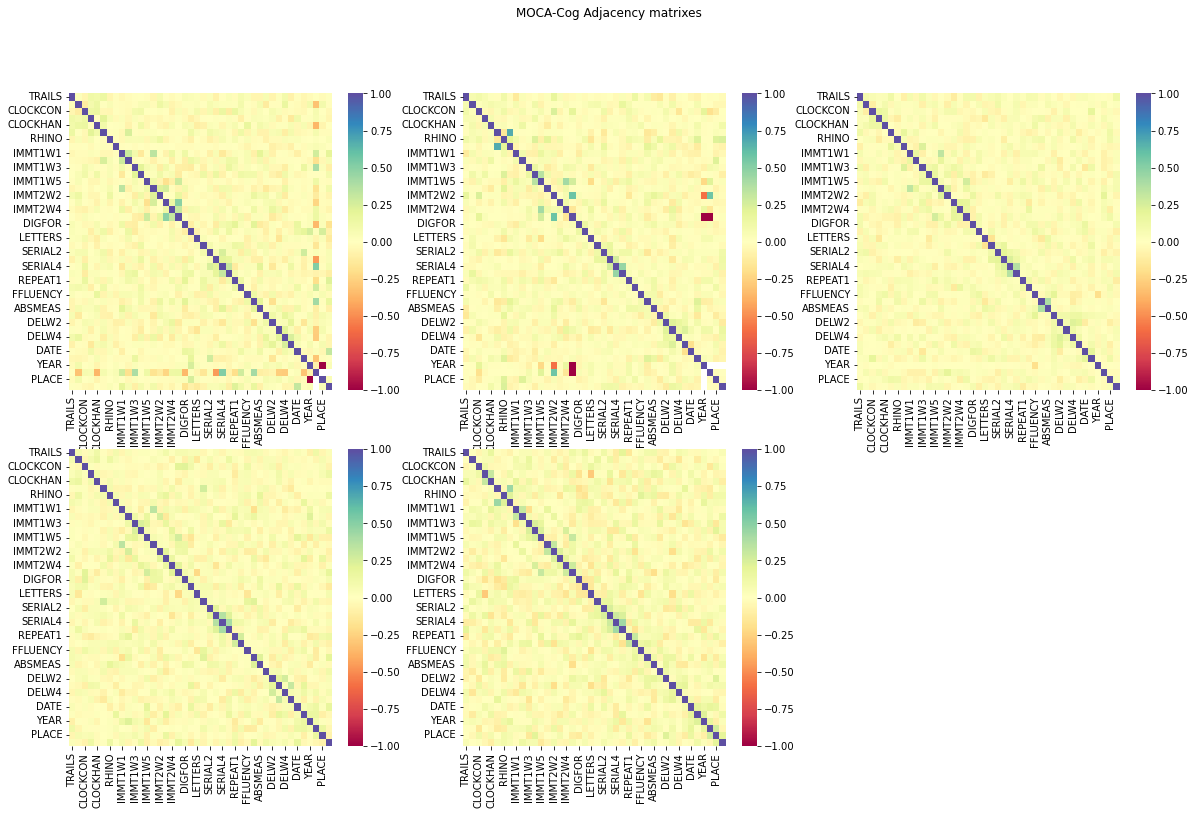

In [77]:
fig, axes = plt.subplots(2,3, figsize=(20,12))
axes[1][2].set_visible(False)

axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])

fig.suptitle('MOCA-Cog Adjacency matrixes')

sns.heatmap(ax=axes[0,0],data=MOCA_CN_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[0,1],data=MOCA_SMC_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[0,2],data=MOCA_EMCI_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[1,0],data=MOCA_LMCI_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[1,1],data=MOCA_AD_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)

plt.show()

In [78]:
MOCA_CN_mx['DAY']

TRAILS      0.007461
CUBE       -0.315403
CLOCKCON    0.074134
CLOCKNO     0.064750
CLOCKHAN   -0.363855
LION        0.085429
RHINO       0.025756
CAMEL       0.055103
IMMT1W1     0.270803
IMMT1W2    -0.186159
IMMT1W3     0.394796
IMMT1W4    -0.000175
IMMT1W5     0.125123
IMMT2W1    -0.176657
IMMT2W2    -0.123877
IMMT2W3    -0.235407
IMMT2W4     0.137838
IMMT2W5     0.146706
DIGFOR     -0.353376
DIGBACK     0.027679
LETTERS    -0.065738
SERIAL1    -0.149454
SERIAL2     0.044941
SERIAL3    -0.456326
SERIAL4     0.515870
SERIAL5    -0.077767
REPEAT1    -0.195494
REPEAT2     0.275968
FFLUENCY    0.017102
ABSTRAN     0.415096
ABSMEAS    -0.107895
DELW1      -0.087184
DELW2      -0.067564
DELW3      -0.267914
DELW4      -0.278622
DELW5       0.005542
DATE        0.035660
MONTH      -0.305364
YEAR       -0.079746
DAY         1.000000
PLACE            NaN
CITY             NaN
Name: DAY, dtype: float64

In [79]:
X_MOCA_CN['DAY'].describe()

count    306.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: DAY, dtype: float64

In [80]:
X_MOCA_SMC['YEAR'].describe()

count    3.390000e+02
mean     5.725983e-02
std      6.254236e-17
min      5.725983e-02
25%      5.725983e-02
50%      5.725983e-02
75%      5.725983e-02
max      5.725983e-02
Name: YEAR, dtype: float64

In [81]:
X_MMSE_LMCI['MMD'].describe()

count    5.660000e+02
mean    -4.902903e-02
std      1.041755e-16
min     -4.902903e-02
25%     -4.902903e-02
50%     -4.902903e-02
75%     -4.902903e-02
max     -4.902903e-02
Name: MMD, dtype: float64

In [82]:
X_MMSE_EMCI['MMTREE'].describe()

count    3.120000e+02
mean    -4.902903e-02
std      9.730057e-17
min     -4.902903e-02
25%     -4.902903e-02
50%     -4.902903e-02
75%     -4.902903e-02
max     -4.902903e-02
Name: MMTREE, dtype: float64

He encontrado un artículo que puede ser interesante (hacen algo parecido a lo que queremos hacer), aunque todavía no he tenido tiempo de leerlo: https://doi.org/10.3390/healthcare10102045. Se centra especialmente en métodos de clasificación de Machine Learning clásicos usando ADAS-cog. Sin embargo, también realizan una matriz de correlaciones. 

## Repeat everything joining EMCI and LMCI

### Distribution by age

In [83]:
df_CN = pd.merge(df,ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'],on='RID')
df_SMC = pd.merge(df,ADNIMERGE[ADNIMERGE["DX_bl"]=='SMC'],on='RID')
df_MCI = pd.merge(df,ADNIMERGE[(ADNIMERGE["DX_bl"]=='LMCI') | (ADNIMERGE["DX_bl"]=='EMCI')],on='RID')
df_AD = pd.merge(df,ADNIMERGE[ADNIMERGE["DX_bl"]=='AD'],on='RID')

print("Number of controls: ", df_CN.shape[0])
print("Number of SMC subjects: ", df_SMC.shape[0])
print("Number of MCI subjects: ", df_MCI.shape[0])
print("Number of AD subjects: ", df_AD.shape[0])

Number of controls:  184
Number of SMC subjects:  104
Number of MCI subjects:  468
Number of AD subjects:  142


C:\Users\anaso\AppData\Local\Temp\ipykernel_9828\2942948871.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VISCODE_x', 'update_stamp_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_CN = pd.merge(df,ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'],on='RID')
C:\Users\anaso\AppData\Local\Temp\ipykernel_9828\2942948871.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VISCODE_x', 'update_stamp_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_SMC = pd.merge(df,ADNIMERGE[ADNIMERGE["DX_bl"]=='SMC'],on='RID')
C:\Users\anaso\AppData\Local\Temp\ipykernel_9828\2942948871.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VISCODE_x', 'update_stamp_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_MCI = pd.merge(df,ADNIMERGE[(ADNIMERGE["DX_bl"]=='LMCI') | (ADNIMERGE["DX_bl"]=='EMCI')],on='RID')
C:\Users\anaso\AppData\Local\Temp\ipykern

### Statistical tests

#### Kruskal-Wallis test

In [84]:
#Kruskal-Wallis test
KW_age = stats.kruskal(df_CN['AGE'].values.tolist(), df_SMC['AGE'].values.tolist(), 
                      df_MCI['AGE'].values.tolist(), df_AD['AGE'].values.tolist())

print("-------------------------")
print("KRUSKAL-WALLIS TEST RESULTS")
print("-------------------------")
print(KW_age)

-------------------------
KRUSKAL-WALLIS TEST RESULTS
-------------------------
KruskalResult(statistic=20.82694583787633, pvalue=0.00011435698904053736)


#### Mann-Whitney test

In [85]:
#Mann-Whitney tests
print("-------------------------")
print("MANN-WHITNEY TEST RESULTS")
print("-------------------------")

print("Controls-SMC: ", stats.mannwhitneyu(df_CN['AGE'].values.tolist(),df_SMC['AGE'].values.tolist()))
print("Controls-MCI: ", stats.mannwhitneyu(df_CN['AGE'].values.tolist(),df_MCI['AGE'].values.tolist()))
print("Controls-AD: ", stats.mannwhitneyu(df_CN['AGE'].values.tolist(),df_AD['AGE'].values.tolist()))

-------------------------
MANN-WHITNEY TEST RESULTS
-------------------------
Controls-SMC:  MannwhitneyuResult(statistic=10663.0, pvalue=0.10689478292082281)
Controls-MCI:  MannwhitneyuResult(statistic=48938.5, pvalue=0.006582094995769629)
Controls-AD:  MannwhitneyuResult(statistic=11434.0, pvalue=0.053457958113894595)


#### Shapiro-Wilk test for normality

The **Shapiro-Wilk test** is a hypothesis test that is applied to a sample and whose null hypothesis is that the sample has been generated from a **normal distribution**. If the p-value is low, we can reject such a null hypothesis and say that the sample has not been generated from a normal distribution.

In [86]:
#Shapiro-Wilk test for normality

print("-------------------------")
print("SAPHIRO-WILK TEST RESULTS")
print("-------------------------")

print("Controls: ", stats.shapiro(df_CN['AGE'].values.tolist()))
print("SMC: ", stats.shapiro(df_SMC['AGE'].values.tolist()))
print("MCI: ", stats.shapiro(df_MCI['AGE'].values.tolist()))
print("AD: ", stats.shapiro(df_AD['AGE'].values.tolist()))

-------------------------
SAPHIRO-WILK TEST RESULTS
-------------------------
Controls:  ShapiroResult(statistic=0.9855072498321533, pvalue=0.054722849279642105)
SMC:  ShapiroResult(statistic=0.9584157466888428, pvalue=0.002437350805848837)
MCI:  ShapiroResult(statistic=0.9916391968727112, pvalue=0.009754721075296402)
AD:  ShapiroResult(statistic=0.9782914519309998, pvalue=0.02337193489074707)


The results show that most groups -excluding the controls- do not follow a normal distribution since they have a p-value lower than 0.05. 

### EDA

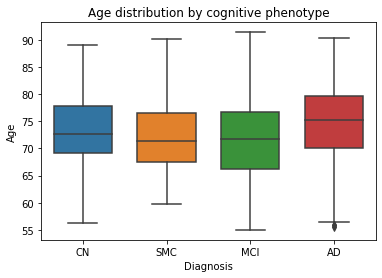

In [87]:
#Age Distribution 

df_ADNIMERGE_MCI = df_ADNIMERGE.copy()
df_ADNIMERGE_MCI['DX_bl'] = df_ADNIMERGE_MCI['DX_bl'].replace(['EMCI','LMCI'],'MCI')

sns.boxplot(x=df_ADNIMERGE_MCI["DX_bl"], y=df_ADNIMERGE_MCI["AGE"], width=0.7,
           order=["CN","SMC","MCI","AD"])
plt.title("Age distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("Age")
plt.show()

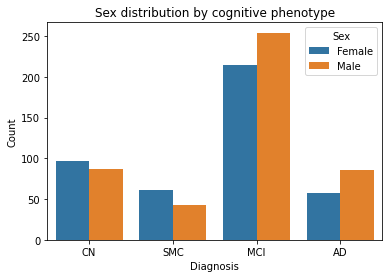

In [88]:
#Gender distribution

#calculate sum of values by group
df_sex = df_ADNIMERGE_MCI.groupby(['DX_bl', 'PTGENDER']).agg(Count=("RID", 'count'))
df_sex = df_sex.reset_index()

#print barplot
sns.barplot(x="DX_bl",
           y="Count",
           hue="PTGENDER",
           data=df_sex,
           order=["CN","SMC","MCI","AD"])

plt.title("Sex distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.legend(title='Sex')

plt.show()

### ADAS-Cog

#### Divide data by diagnostic group

In [89]:
#Get indexes of subjects belonging to each group
ADAS_indexes = {} #Create empty dictionary
dx_groups = ["CN","SMC","MCI", "AD"] #diagnostic groups list

Y_ADAS = Y_ADAS.replace(["EMCI","LMCI"],"MCI")

for dx in dx_groups:
    ADAS_indexes[dx] = Y_ADAS.index[Y_ADAS['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_ADAS_CN = X_ADAS.iloc[ADAS_indexes["CN"]]
X_ADAS_SMC = X_ADAS.iloc[ADAS_indexes["SMC"]]
X_ADAS_MCI = X_ADAS.iloc[ADAS_indexes["MCI"]]
X_ADAS_AD = X_ADAS.iloc[ADAS_indexes["AD"]]

print("Number of instances CN: ", X_ADAS_CN.shape[0])
print("Number of instances SMC: ", X_ADAS_SMC.shape[0])
print("Number of instances MCI: ", X_ADAS_MCI.shape[0])
print("Number of instances AD: ", X_ADAS_AD.shape[0])

Number of instances CN:  311
Number of instances SMC:  348
Number of instances MCI:  699
Number of instances AD:  219


#### Compute adjacency matrixes

In [90]:
ADAS_CN_mx = par_corr(X_ADAS_CN)
ADAS_SMC_mx = par_corr(X_ADAS_SMC)
ADAS_MCI_mx = par_corr(X_ADAS_MCI)
ADAS_AD_mx = par_corr(X_ADAS_AD)

#### Plot adjacency matrixes

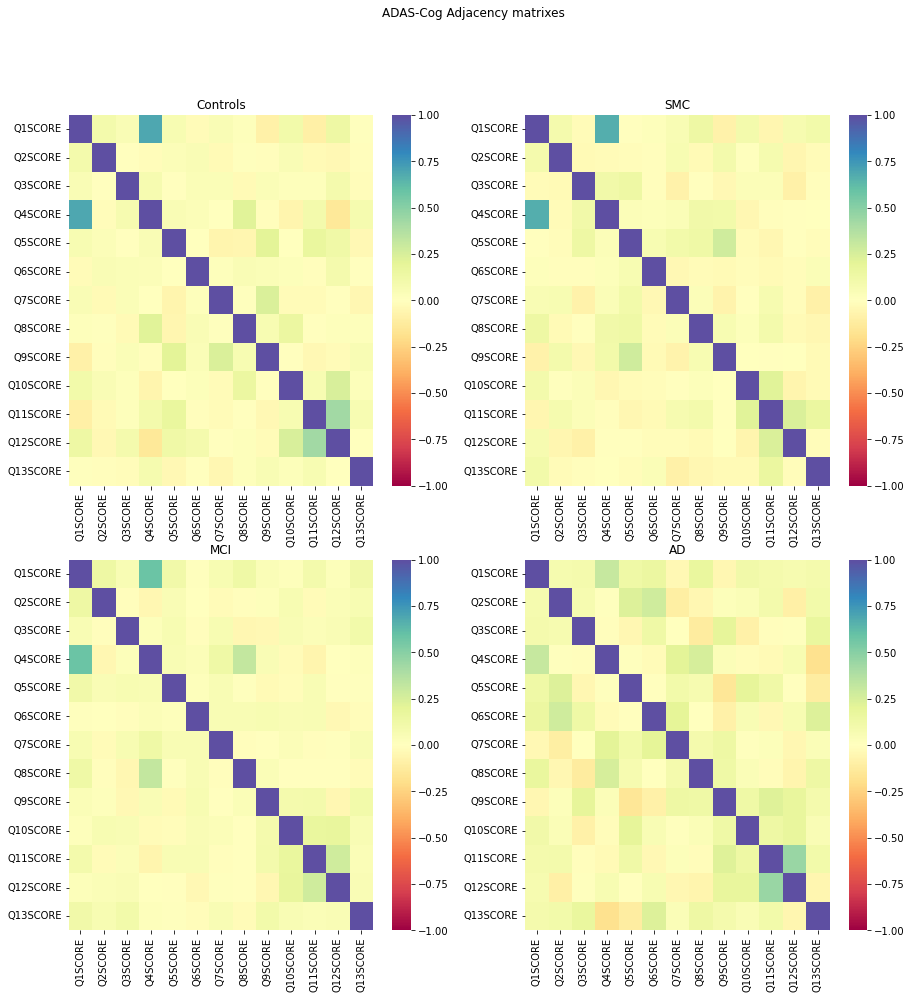

In [91]:
fig, axes = plt.subplots(2,2, figsize=(15,15))


fig.suptitle('ADAS-Cog Adjacency matrixes')

sns.heatmap(ax=axes[0,0],data=ADAS_CN_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[0,1],data=ADAS_SMC_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[1,0],data=ADAS_MCI_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[1,1],data=ADAS_AD_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)

#add title to subfigures
axes[0,0].title.set_text("Controls")
axes[0,1].title.set_text("SMC")
axes[1,0].title.set_text("MCI")
axes[1,1].title.set_text("AD")

plt.show()

### MMSE

#### Divide data by diagnostic group

In [92]:
#Get indexes of subjects belonging to each group
MMSE_indexes = {} #Create empty dictionary
dx_groups = ["CN","SMC","MCI", "AD"] #diagnostic groups list

Y_MMSE = Y_MMSE.replace(["EMCI","LMCI"],"MCI")

for dx in dx_groups:
    MMSE_indexes[dx] = Y_MMSE.index[Y_MMSE['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_MMSE_CN = X_MMSE.iloc[MMSE_indexes["CN"]]
X_MMSE_SMC = X_MMSE.iloc[MMSE_indexes["SMC"]]
X_MMSE_MCI = X_MMSE.iloc[MMSE_indexes["MCI"]]
X_MMSE_AD = X_MMSE.iloc[MMSE_indexes["AD"]]

print("Number of instances CN: ", X_MMSE_CN.shape[0])
print("Number of instances SMC: ", X_MMSE_SMC.shape[0])
print("Number of instances MCI: ", X_MMSE_MCI.shape[0])
print("Number of instances AD: ", X_MMSE_AD.shape[0])

Number of instances CN:  417
Number of instances SMC:  106
Number of instances MCI:  878
Number of instances AD:  339


#### Compute adjacency matrixes

In [93]:
MMSE_CN_mx = par_corr(X_MMSE_CN)
MMSE_SMC_mx = par_corr(X_MMSE_SMC)
MMSE_MCI_mx = par_corr(X_MMSE_MCI)
MMSE_AD_mx = par_corr(X_MMSE_AD)

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_di

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_di

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_di

#### Plot adjacency matrixes

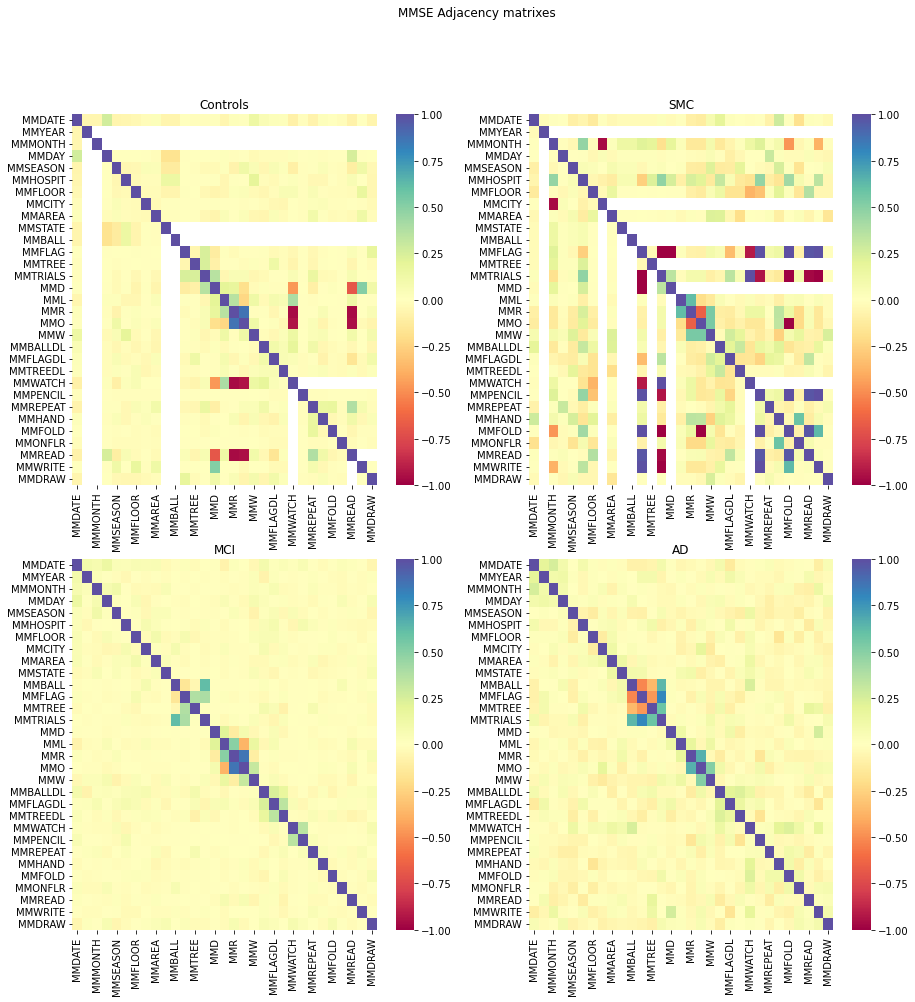

In [94]:
fig, axes = plt.subplots(2,2, figsize=(15,15))


fig.suptitle('MMSE Adjacency matrixes')

sns.heatmap(ax=axes[0,0],data=MMSE_CN_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[0,1],data=MMSE_SMC_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[1,0],data=MMSE_MCI_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[1,1],data=MMSE_AD_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)

#add title to subfigures
axes[0,0].title.set_text("Controls")
axes[0,1].title.set_text("SMC")
axes[1,0].title.set_text("MCI")
axes[1,1].title.set_text("AD")

plt.show()

### MOCA

#### Divide data by diagnostic groups

In [95]:
#Get indexes of subjects belonging to each group
MOCA_indexes = {} #Create empty dictionary
dx_groups = ["CN","SMC","MCI", "AD"] #diagnostic groups list

Y_MOCA = Y_MOCA.replace(["EMCI","LMCI"],"MCI")

for dx in dx_groups:
    MOCA_indexes[dx] = Y_MOCA.index[Y_MOCA['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_MOCA_CN = X_MOCA.iloc[MOCA_indexes["CN"]]
X_MOCA_SMC = X_MOCA.iloc[MOCA_indexes["SMC"]]
X_MOCA_MCI = X_MOCA.iloc[MOCA_indexes["MCI"]]
X_MOCA_AD = X_MOCA.iloc[MOCA_indexes["AD"]]

print("Number of instances CN: ", X_MOCA_CN.shape[0])
print("Number of instances SMC: ", X_MOCA_SMC.shape[0])
print("Number of instances MCI: ", X_MOCA_MCI.shape[0])
print("Number of instances AD: ", X_MOCA_AD.shape[0])

Number of instances CN:  306
Number of instances SMC:  339
Number of instances MCI:  684
Number of instances AD:  212


#### Compute adjacency matrixes

In [96]:
MOCA_CN_mx = par_corr(X_MOCA_CN)
MOCA_SMC_mx = par_corr(X_MOCA_SMC)
MOCA_MCI_mx = par_corr(X_MOCA_MCI)
MOCA_AD_mx = par_corr(X_MOCA_AD)

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_di

C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\anaso\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in true_di

#### Plot adjacency matrixes

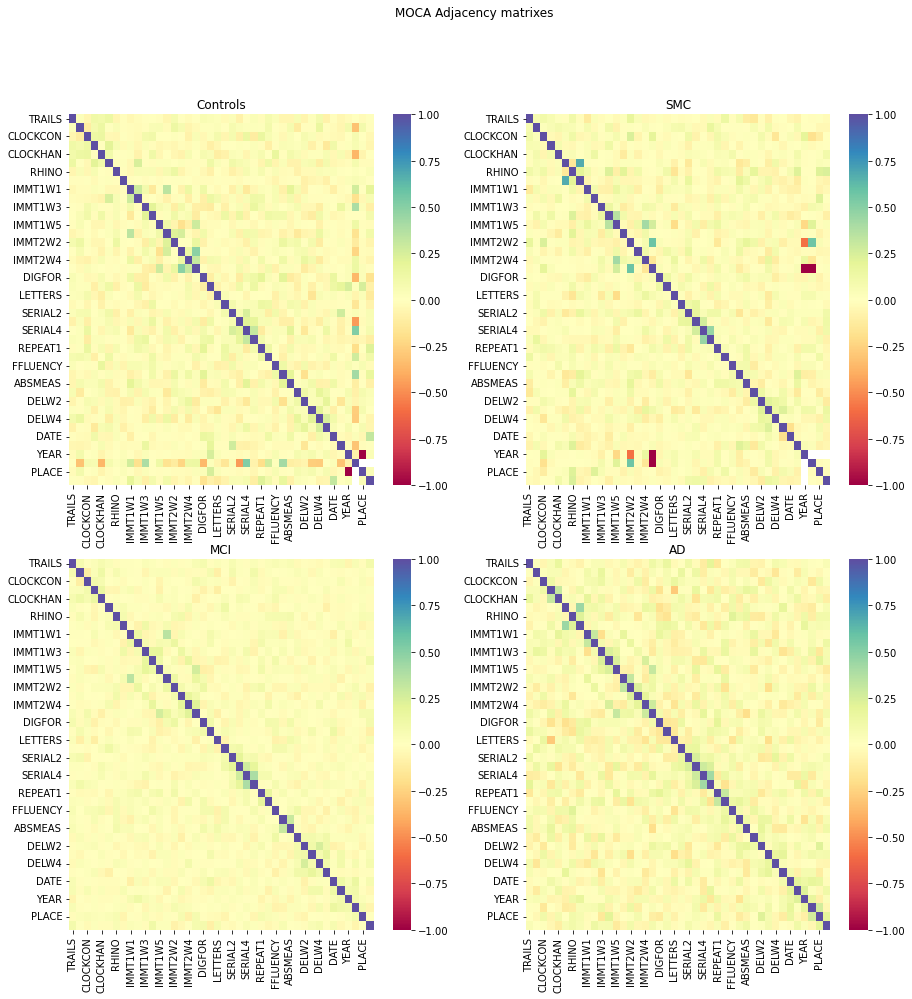

In [97]:
fig, axes = plt.subplots(2,2, figsize=(15,15))


fig.suptitle('MOCA Adjacency matrixes')

sns.heatmap(ax=axes[0,0],data=MOCA_CN_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[0,1],data=MOCA_SMC_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[1,0],data=MOCA_MCI_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[1,1],data=MOCA_AD_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)

#add title to subfigures
axes[0,0].title.set_text("Controls")
axes[0,1].title.set_text("SMC")
axes[1,0].title.set_text("MCI")
axes[1,1].title.set_text("AD")

plt.show()

## Repeat everything joining CN and SMC

### Distribution by age

In [98]:
df_CN = pd.merge(df,ADNIMERGE[(ADNIMERGE["DX_bl"]=='CN') | (ADNIMERGE["DX_bl"]=='SMC')],on='RID')
df_MCI = pd.merge(df,ADNIMERGE[(ADNIMERGE["DX_bl"]=='LMCI') | (ADNIMERGE["DX_bl"]=='EMCI')],on='RID')
df_AD = pd.merge(df,ADNIMERGE[ADNIMERGE["DX_bl"]=='AD'],on='RID')

print("Number of controls: ", df_CN.shape[0])
print("Number of MCI subjects: ", df_MCI.shape[0])
print("Number of AD subjects: ", df_AD.shape[0])

Number of controls:  288
Number of MCI subjects:  468
Number of AD subjects:  142


C:\Users\anaso\AppData\Local\Temp\ipykernel_9828\2836614760.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VISCODE_x', 'update_stamp_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_CN = pd.merge(df,ADNIMERGE[(ADNIMERGE["DX_bl"]=='CN') | (ADNIMERGE["DX_bl"]=='SMC')],on='RID')
C:\Users\anaso\AppData\Local\Temp\ipykernel_9828\2836614760.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VISCODE_x', 'update_stamp_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_MCI = pd.merge(df,ADNIMERGE[(ADNIMERGE["DX_bl"]=='LMCI') | (ADNIMERGE["DX_bl"]=='EMCI')],on='RID')
C:\Users\anaso\AppData\Local\Temp\ipykernel_9828\2836614760.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VISCODE_x', 'update_stamp_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_AD = pd.merge(df,ADNIMERGE[ADNIMERGE["DX_bl"]=='AD'],on='RID')


### Statistical tests

#### Kruskal-Wallis test

In [99]:
#Kruskal-Wallis test
KW_age = stats.kruskal(df_CN['AGE'].values.tolist(), df_MCI['AGE'].values.tolist(), df_AD['AGE'].values.tolist())

print("-------------------------")
print("KRUSKAL-WALLIS TEST RESULTS")
print("-------------------------")
print(KW_age)

-------------------------
KRUSKAL-WALLIS TEST RESULTS
-------------------------
KruskalResult(statistic=18.92772829201439, pvalue=7.760612946005333e-05)


#### Mann-Whitney tests

In [100]:
#Mann-Whitney tests
print("-------------------------")
print("MANN-WHITNEY TEST RESULTS")
print("-------------------------")

print("Controls-MCI: ", stats.mannwhitneyu(df_CN['AGE'].values.tolist(),df_MCI['AGE'].values.tolist()))
print("Controls-AD: ", stats.mannwhitneyu(df_CN['AGE'].values.tolist(),df_AD['AGE'].values.tolist()))

-------------------------
MANN-WHITNEY TEST RESULTS
-------------------------
Controls-MCI:  MannwhitneyuResult(statistic=74409.5, pvalue=0.016107078598488866)
Controls-AD:  MannwhitneyuResult(statistic=17240.0, pvalue=0.008130636399248574)


#### Shapiro-Wilk test for normality

In [101]:
#Shapiro-Wilk test for normality

print("-------------------------")
print("SHAPIRO-WILK TEST RESULTS")
print("-------------------------")

print("Controls: ", stats.shapiro(df_CN['AGE'].values.tolist()))
print("MCI: ", stats.shapiro(df_MCI['AGE'].values.tolist()))
print("AD: ", stats.shapiro(df_AD['AGE'].values.tolist()))

-------------------------
SHAPIRO-WILK TEST RESULTS
-------------------------
Controls:  ShapiroResult(statistic=0.9843282699584961, pvalue=0.003074418054893613)
MCI:  ShapiroResult(statistic=0.9916391968727112, pvalue=0.009754721075296402)
AD:  ShapiroResult(statistic=0.9782914519309998, pvalue=0.02337193489074707)


### EDA

#### Age distribution

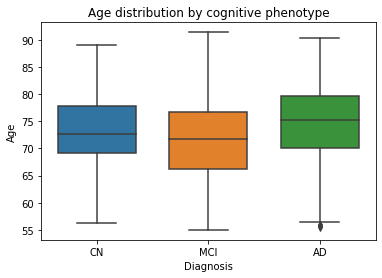

In [102]:
#Age Distribution 

df_ADNIMERGE_groupped = df_ADNIMERGE.copy()
df_ADNIMERGE_groupped['DX_bl'] = df_ADNIMERGE_MCI['DX_bl'].replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

sns.boxplot(x=df_ADNIMERGE_MCI["DX_bl"], y=df_ADNIMERGE_MCI["AGE"], width=0.7,
           order=["CN","MCI","AD"])
plt.title("Age distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("Age")
plt.show()

#### Sex distribution

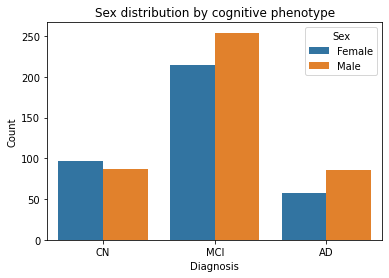

In [103]:
#Sex distribution

#calculate sum of values by group
df_sex = df_ADNIMERGE_MCI.groupby(['DX_bl', 'PTGENDER']).agg(Count=("RID", 'count'))
df_sex = df_sex.reset_index()

#print barplot
sns.barplot(x="DX_bl",
           y="Count",
           hue="PTGENDER",
           data=df_sex,
           order=["CN","MCI","AD"])

plt.title("Sex distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.legend(title='Sex')

plt.show()

#### Ethnicity distribution

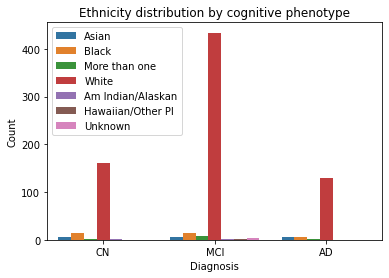

In [104]:
#Ethnic distribution

#calculate sum of values by group
df_eth = df_ADNIMERGE_MCI.groupby(['DX_bl', 'PTRACCAT']).agg(Count=("RID", 'count'))
df_eth = df_eth.reset_index()

#print barplot
sns.barplot(x="DX_bl",
           y="Count",
           hue="PTRACCAT",
           data=df_eth,
           order=["CN","MCI","AD"])

plt.title("Ethnicity distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.legend(title='Ethnic group')
plt.legend(loc='upper left')

plt.show()

### ADAS-Cog

#### Divide data by diagnostic group

In [105]:
#Get indexes of subjects belonging to each group
ADAS_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_ADAS = Y_ADAS.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    ADAS_indexes[dx] = Y_ADAS.index[Y_ADAS['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_ADAS_CN = X_ADAS.iloc[ADAS_indexes["CN"]]
X_ADAS_MCI = X_ADAS.iloc[ADAS_indexes["MCI"]]
X_ADAS_AD = X_ADAS.iloc[ADAS_indexes["AD"]]

print("Number of instances CN: ", X_ADAS_CN.shape[0])
print("Number of instances MCI: ", X_ADAS_MCI.shape[0])
print("Number of instances AD: ", X_ADAS_AD.shape[0])

Number of instances CN:  659
Number of instances MCI:  699
Number of instances AD:  219


#### Plot z-scores by cognitive domain

1. Compute averages of each test
2. Group by NC domain
3. Compute the average of each domain

In [470]:
def zscores_means(X, dx, metadata_path):
    """Function to generate a table with the means by domain and diagnostic group.
    It takes a list with the zscore df variable names for each diagnostic group"""
    #Compute the test means
    means_df = X.mean(axis=0).to_frame()
    means_df.columns = ["Mean"]
    means_df['ADNI column'] = means_df.index

    #Import the test-cognitive domain relations    
    metadata = pd.read_csv(metadata_path, sep=";", 
                            usecols = ['ADNI column', 'Cognitive Domain'])

    means_df = means_df.join(metadata.set_index('ADNI column'))[['Cognitive Domain', 'Mean']]

    #Compute NC domain means
    means_df = means_df.groupby(['Cognitive Domain'])['Mean'].mean().to_frame()
    means_df.reset_index(inplace=True)

    #Add diagnostic group
    means_df["Diagnostic"] = dx
    
    return(means_df)

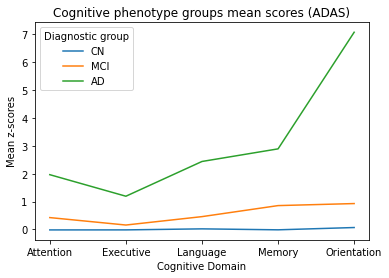

In [471]:
metadata_path = "./Tests/ADAS_Metadata.csv"
#Compute zscores means for each cognitive domain by diagnostic group
ADAS_means_CN = zscores_means(X_ADAS_CN, "CN", metadata_path)
ADAS_means_MCI = zscores_means(X_ADAS_MCI, "MCI", metadata_path)
ADAS_means_AD = zscores_means(X_ADAS_AD, "AD", metadata_path)

#Concanetate all dataframes
ADAS_means_df = pd.concat([ADAS_means_CN, ADAS_means_MCI, ADAS_means_AD])
ADAS_means_df.index = range(len(ADAS_means_df))

#plot dataframe
sns.lineplot(data=ADAS_means_df, x='Cognitive Domain', y='Mean', hue='Diagnostic')
plt.title("Cognitive phenotype groups mean scores (ADAS)")
plt.ylabel("Mean z-scores")
plt.legend(title="Diagnostic group")
plt.show()

#### Compute adjacency matrixes

In [106]:
ADAS_CN_mx = par_corr(X_ADAS_CN)
ADAS_MCI_mx = par_corr(X_ADAS_MCI)
ADAS_AD_mx = par_corr(X_ADAS_AD)

#### Plot adjacency matrixes

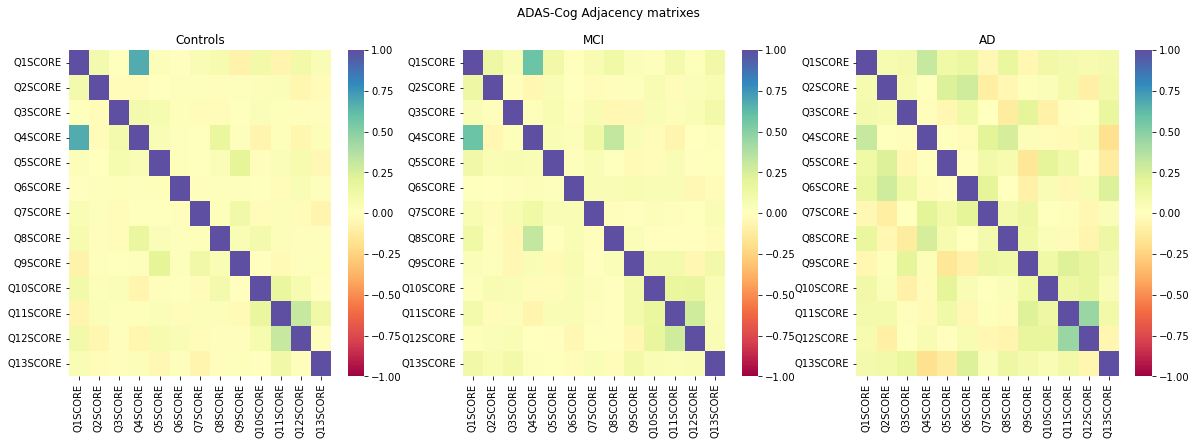

In [107]:
fig, axes = plt.subplots(1,3, figsize=(20,6))


fig.suptitle('ADAS-Cog Adjacency matrixes')

sns.heatmap(ax=axes[0],data=ADAS_CN_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[1],data=ADAS_MCI_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[2],data=ADAS_AD_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.show()

#### Compute graph

In [108]:
#Remove diagonal elements and negative correlations from the matrix

for i in range(ADAS_MCI_mx.shape[1]):
    colname = ADAS_MCI_mx.columns[i]
    ADAS_CN_mx[colname] = np.where((ADAS_CN_mx[colname]< 0) | (ADAS_CN_mx[colname]==1.0),0, ADAS_CN_mx[colname]) 
    ADAS_MCI_mx[colname] = np.where((ADAS_MCI_mx[colname]< 0) | (ADAS_MCI_mx[colname]==1.0),0, ADAS_MCI_mx[colname]) 
    ADAS_AD_mx[colname] = np.where((ADAS_AD_mx[colname]< 0) | (ADAS_AD_mx[colname]==1.0),0, ADAS_AD_mx[colname]) 

In [109]:
import networkx as nx

#convert adjacency matrix into graph
ADAS_CN_graph = nx.from_numpy_array(ADAS_CN_mx.to_numpy())
ADAS_MCI_graph = nx.from_numpy_array(ADAS_MCI_mx.to_numpy())
ADAS_AD_graph = nx.from_numpy_array(ADAS_AD_mx.to_numpy())

In [110]:
#count nodes and edges
print("CN-------------------------")
print("- Number of nodes: ", ADAS_CN_graph.number_of_nodes())
print("- Number of edges: ", ADAS_CN_graph.number_of_edges())
print()
print("MCI-------------------------")
print("- Number of nodes: ", ADAS_MCI_graph.number_of_nodes())
print("- Number of edges: ", ADAS_MCI_graph.number_of_edges())
print()
print("AD-------------------------")
print("- Number of nodes: ", ADAS_AD_graph.number_of_nodes())
print("- Number of edges: ", ADAS_AD_graph.number_of_edges())

CN-------------------------
- Number of nodes:  13
- Number of edges:  50

MCI-------------------------
- Number of nodes:  13
- Number of edges:  55

AD-------------------------
- Number of nodes:  13
- Number of edges:  54


#### Add node attributes

As the nodes represent different tests they are going to have the following attributes:

- ADNI column: name of the test in the ADNI database
- Test description
- Cognitive domain

In [111]:
#Import node metadata
ADAS_metadata = pd.read_csv("./Tests/ADAS_Metadata.csv", sep=";", 
                            usecols = ['Node', 'ADNI column', 'Test', 'Cognitive Domain'])

graphs = [ADAS_CN_graph, ADAS_MCI_graph, ADAS_AD_graph]

for graph in graphs:
    #ADNI column
    nx.set_node_attributes(graph, dict(zip(ADAS_metadata.Node, ADAS_metadata['ADNI column'])), name="ADNIColumn")
    #Test
    nx.set_node_attributes(graph, dict(zip(ADAS_metadata.Node, ADAS_metadata['Test'])), name="Test")
    #Cognitive domain
    nx.set_node_attributes(graph, dict(zip(ADAS_metadata.Node, ADAS_metadata['Cognitive Domain'])), name="Domain")

#### Draw graph

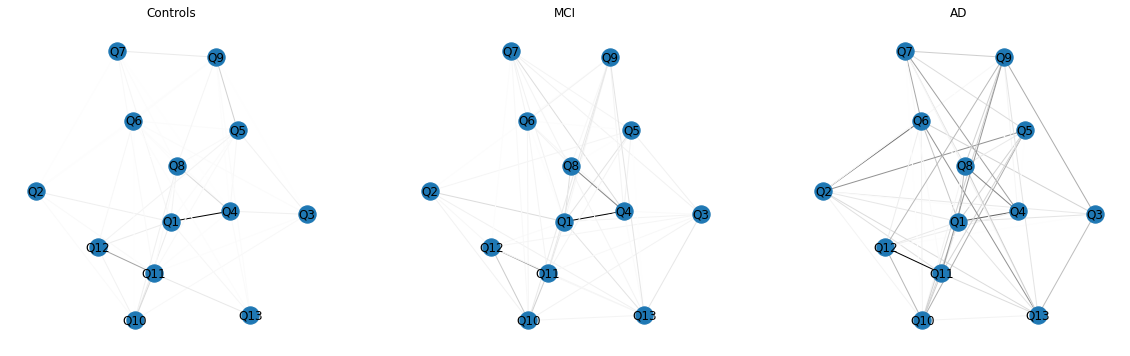

In [373]:
#Node labels
test_labels = {0:"Q1", 1:"Q2", 2:"Q3", 3:"Q4", 4:"Q5", 5: "Q6", 6:"Q7",
              7:"Q8",8:"Q9", 9:"Q10", 10:"Q11", 11:"Q12", 12:"Q13"}


#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))

#fix position
pos=nx.spring_layout(ADAS_CN_graph)

#get edges weights
edges_CN,weights_CN = zip(*nx.get_edge_attributes(ADAS_CN_graph,'weight').items())
edges_MCI,weights_MCI = zip(*nx.get_edge_attributes(ADAS_MCI_graph,'weight').items())
edges_AD,weights_AD = zip(*nx.get_edge_attributes(ADAS_AD_graph,'weight').items())

nx.draw(ax=axes[0], G=ADAS_CN_graph, pos=pos, labels=test_labels, with_labels=True,
       edge_color=weights_CN, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[1], G=ADAS_MCI_graph, pos=pos, labels=test_labels, with_labels=True,
       edge_color=weights_MCI, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[2], G=ADAS_AD_graph, pos=pos, labels=test_labels, with_labels=True,
       edge_color=weights_AD, edge_cmap=plt.cm.Greys)

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.show()

#### Edges weights

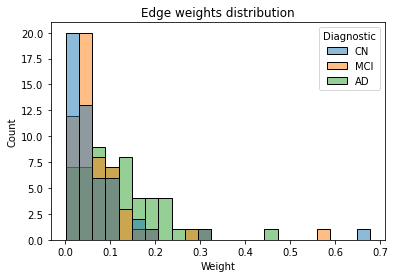

In [374]:
#Create dataframe with weights
weights_df_CN = pd.DataFrame(weights_CN, columns=["Weight"])
weights_df_CN['Diagnostic'] = "CN"
weights_df_MCI = pd.DataFrame(weights_MCI, columns=["Weight"])
weights_df_MCI['Diagnostic'] = "MCI"
weights_df_AD = pd.DataFrame(weights_AD, columns=["Weight"])
weights_df_AD['Diagnostic'] = "AD"

#merge all
weights_df = pd.concat([weights_df_CN, weights_df_MCI, weights_df_AD], ignore_index=True)

#plot histogram
sns.histplot(data=weights_df, x="Weight", hue="Diagnostic")
plt.title("Edge weights distribution")
plt.show()

#### Node centrality

In network analysis, measures of the importance of nodes are referred to as **centrality** measures. **Degree** is the simplest and the most common way of finding important nodes. A node’s degree is the sum of its edges between all the possible connections. This is the centrality measure used in the epilepsy paper. 

In [113]:
#Node degree

print("---------------------")
print("DEGREE CENTRALITY")
print("---------------------")
print()
print("Controls: ", nx.degree_centrality(ADAS_CN_graph))
print()
print("MCI: ", nx.degree_centrality(ADAS_MCI_graph))
print()
print("AD: ", nx.degree_centrality(ADAS_AD_graph))

---------------------
DEGREE CENTRALITY
---------------------

Controls:  {0: 0.75, 1: 0.5833333333333333, 2: 0.5833333333333333, 3: 0.75, 4: 0.8333333333333333, 5: 0.75, 6: 0.5833333333333333, 7: 0.6666666666666666, 8: 0.6666666666666666, 9: 0.5833333333333333, 10: 0.75, 11: 0.41666666666666663, 12: 0.41666666666666663}

MCI:  {0: 1.0, 1: 0.5833333333333333, 2: 0.6666666666666666, 3: 0.75, 4: 0.75, 5: 0.75, 6: 0.6666666666666666, 7: 0.41666666666666663, 8: 0.6666666666666666, 9: 0.75, 10: 0.6666666666666666, 11: 0.6666666666666666, 12: 0.8333333333333333}

AD:  {0: 0.8333333333333333, 1: 0.75, 2: 0.5833333333333333, 3: 0.5833333333333333, 4: 0.5833333333333333, 5: 0.6666666666666666, 6: 0.75, 7: 0.6666666666666666, 8: 0.75, 9: 0.8333333333333333, 10: 0.6666666666666666, 11: 0.5833333333333333, 12: 0.75}


According to the **node centrality** there are 4 hubs in the controls (0, 3, 5 and 10), 1 for the MCI group (0) and 2 for the alzheimer's patients (0 and 9). 

#### Other centrality measures

- **Closeness centrality**: is a way of detecting nodes that are able to spread information very efficiently through a graph. The closeness centrality of a node measures its average farness (inverse distance) to all other nodes. 
- **Eigenvector centrality**: is a kind of extension of degree—it looks at a combination of a node’s edges and the edges of that node’s neighbors. Eigenvector centrality cares if you are a hub, but it also cares how many hubs you are connected to. It’s calculated as a value from 0 to 1: the closer to one, the greater the centrality. Eigenvector centrality is useful for understanding which nodes can get information to many other nodes quickly. 
- **Betweenness centrality**: t doesn’t care about the number of edges any one node or set of nodes has. Betweenness centrality looks at all the shortest paths that pass through a particular node (see above). Betweenness centrality, which is also expressed on a scale of 0 to 1, is fairly good at finding nodes that connect two otherwise disparate parts of a network.

In [114]:
def centrality(graph,columns):
    
    """Function to compute a table with the different centrality measures for each node."""
    
    DC = nx.degree_centrality(graph) #degree centrality
    CC = nx.closeness_centrality(graph) #closeness centrality 
    EC = nx.eigenvector_centrality(graph) #eigenvector centrality
    BC = nx.betweenness_centrality(graph) #betweenness centrality
    
    centrality_df = pd.DataFrame() #create empty dataframe
    
    for node in DC:
        centrality_df.at[node, "Degree_Centrality"] = DC[node] 
        centrality_df.at[node, "Closeness_Centrality"] = CC[node] 
        centrality_df.at[node, "Eigenvector_Centrality"] = EC[node] 
        centrality_df.at[node, "Betweenness_Centrality"] = BC[node] 
    
    centrality_df.index = columns
        
    return centrality_df

In [115]:
print("Controls----------------------------------")
display(centrality(ADAS_CN_graph, ADAS_columns))
print("MCI----------------------------------")
display(centrality(ADAS_MCI_graph, ADAS_columns))
print("AD----------------------------------")
display(centrality(ADAS_AD_graph, ADAS_columns))

Controls----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1SCORE            0.750000              0.800000                0.299223   
Q2SCORE            0.583333              0.705882                0.257050   
Q3SCORE            0.583333              0.705882                0.264080   
Q4SCORE            0.750000              0.800000                0.321465   
Q5SCORE            0.833333              0.857143                0.350038   
Q6SCORE            0.750000              0.800000                0.301435   
Q7SCORE            0.583333              0.705882                0.265702   
Q8SCORE            0.666667              0.750000                0.297573   
Q9SCORE            0.666667              0.750000                0.283248   
Q10SCORE           0.583333              0.705882                0.240317   
Q11SCORE           0.750000              0.800000                0.299223   
Q12SCORE           0.416667              0.631579                0.187852   
Q13SCORE           0.416667              0.631579                0.189662   

          Betweenness_Centrality  
Q1SCORE                 0.066089  
Q2SCORE                 0.022571  
Q3SCORE                 0.018783  
Q4SCORE                 0.030904  
Q5SCORE                 0.050746  
Q6SCORE                 0.061797  
Q7SCORE                 0.010702  
Q8SCORE                 0.025601  
Q9SCORE                 0.032107  
Q10SCORE                0.021417  
Q11SCORE                0.066089  
Q12SCORE                0.007636  
Q13SCORE                0.009800

MCI----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1SCORE            1.000000              1.000000                0.367027   
Q2SCORE            0.583333              0.705882                0.236835   
Q3SCORE            0.666667              0.750000                0.270257   
Q4SCORE            0.750000              0.800000                0.285017   
Q5SCORE            0.750000              0.800000                0.283433   
Q6SCORE            0.750000              0.800000                0.278747   
Q7SCORE            0.666667              0.750000                0.271377   
Q8SCORE            0.416667              0.631579                0.168770   
Q9SCORE            0.666667              0.750000                0.254641   
Q10SCORE           0.750000              0.800000                0.291051   
Q11SCORE           0.666667              0.750000                0.267887   
Q12SCORE           0.666667              0.750000                0.265455   
Q13SCORE           0.833333              0.857143                0.320907   

          Betweenness_Centrality  
Q1SCORE                 0.071591  
Q2SCORE                 0.013438  
Q3SCORE                 0.010823  
Q4SCORE                 0.040061  
Q5SCORE                 0.039196  
Q6SCORE                 0.037482  
Q7SCORE                 0.013438  
Q8SCORE                 0.002165  
Q9SCORE                 0.027327  
Q10SCORE                0.025415  
Q11SCORE                0.018994  
Q12SCORE                0.016739  
Q13SCORE                0.031818

AD----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1SCORE            0.833333              0.857143                0.317970   
Q2SCORE            0.750000              0.800000                0.295818   
Q3SCORE            0.583333              0.705882                0.237594   
Q4SCORE            0.583333              0.705882                0.229504   
Q5SCORE            0.583333              0.705882                0.237950   
Q6SCORE            0.666667              0.750000                0.270225   
Q7SCORE            0.750000              0.800000                0.290090   
Q8SCORE            0.666667              0.750000                0.269673   
Q9SCORE            0.750000              0.800000                0.292104   
Q10SCORE           0.833333              0.857143                0.330175   
Q11SCORE           0.666667              0.750000                0.272928   
Q12SCORE           0.583333              0.705882                0.231347   
Q13SCORE           0.750000              0.800000                0.305606   

          Betweenness_Centrality  
Q1SCORE                 0.050830  
Q2SCORE                 0.038185  
Q3SCORE                 0.015061  
Q4SCORE                 0.021880  
Q5SCORE                 0.013167  
Q6SCORE                 0.021392  
Q7SCORE                 0.041847  
Q8SCORE                 0.022258  
Q9SCORE                 0.035299  
Q10SCORE                0.037175  
Q11SCORE                0.021735  
Q12SCORE                0.022024  
Q13SCORE                0.022781

#### Relation between node degree and betweenness centrality

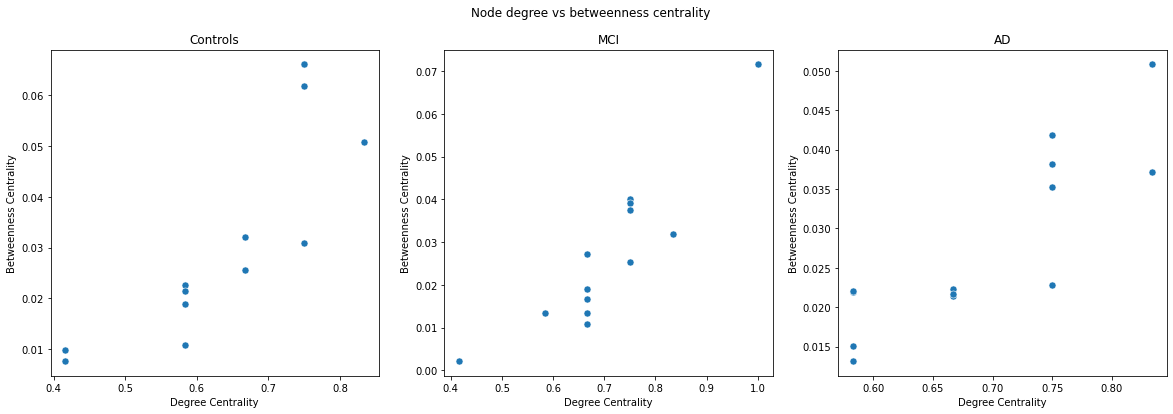

In [116]:
#Get centrality metrics table
ADAS_CN_centrality = centrality(ADAS_CN_graph, ADAS_columns)
ADAS_MCI_centrality = centrality(ADAS_MCI_graph, ADAS_columns)
ADAS_AD_centrality = centrality(ADAS_AD_graph, ADAS_columns)

#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))


sns.scatterplot(ax=axes[0],data=ADAS_CN_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[1],data=ADAS_MCI_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[2],data=ADAS_AD_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)

#labels
axes[0].set_ylabel("Betweenness Centrality")
axes[1].set_ylabel("Betweenness Centrality")
axes[2].set_ylabel("Betweenness Centrality")
axes[0].set_xlabel("Degree Centrality")
axes[1].set_xlabel("Degree Centrality")
axes[2].set_xlabel("Degree Centrality")

#add title
fig.suptitle('Node degree vs betweenness centrality')

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")


plt.show()

#### Average clustering coefficient

In graph theory, a **clustering coefficient** is a measure of the degree to which nodes in a graph tend to cluster together. Two versions of this measure exist: the global and the local. The global version was designed to give an overall indication of the clustering in the network, whereas the local gives an indication of the embeddedness of single nodes. In this work we are computing **global measures**.

The clustering coefficient for the graph is the average,

$$
    C = \frac{1}{n}\sum_{v \in G}c_v
$$

where $n$ is the number of nodes in the graph $G$.

In [117]:
print("--------------------------------")
print("AVERAGE CLUSTERING COEFFICIENT")
print("--------------------------------")
print()
print("Controls: ", nx.average_clustering(ADAS_CN_graph,weight='weight'))
print()
print("MCI: ", nx.average_clustering(ADAS_MCI_graph,weight='weight'))
print()
print("AD: ", nx.average_clustering(ADAS_AD_graph,weight='weight'))

--------------------------------
AVERAGE CLUSTERING COEFFICIENT
--------------------------------

Controls:  0.04371694899475797

MCI:  0.07777806097783024

AD:  0.13825166476496278


#### Global efficiency

The **efficiency** of a pair of nodes in a graph is the multiplicative inverse of the shortest path distance between the nodes. The average global efficiency of a graph is the average efficiency of all pairs of nodes. Edge weights are ignored when computing the shortest path distances.

Note than in the epilepsy paper they computed *normalized global efficiencies*.

In [118]:
print("--------------------------------")
print("AVERAGE GLOBAL EFFICIENCY")
print("--------------------------------")
print()
print("Controls: ", nx.global_efficiency(ADAS_CN_graph))
print()
print("MCI: ", nx.global_efficiency(ADAS_MCI_graph))
print()
print("AD: ", nx.global_efficiency(ADAS_AD_graph))

--------------------------------
AVERAGE GLOBAL EFFICIENCY
--------------------------------

Controls:  0.8205128205128205

MCI:  0.8525641025641025

AD:  0.8461538461538461


#### Global measures summary

The following global metrics are going to be computed:

- **Number of nodes**: number of entities
- **Number of edges**: pairs of connected entities
- **Diameter**: the diameter of a graph is definded as the largest shortest path distance in the graph. It is the maximum value of $d(u,v)$ overf all $u,v$ pairs, where $d(u,v)$ denotes the shortest path distance from vertex $u$ to vertex $v$.
- **Density**: it is the ratio of actual edges in the network to all possible connections between the entities of the network. Network density gives you a quick sense of how closely knit your network is. It is also know as the *sparsity* of the graph and ranges between 0 and 1. Low values would indicate a network with a few specific conexions, whereas high values are indicative of a low specificity. 
- **Average degree**: The average degree of an undirected graph is used to measure the number of edges compared to the number of nodes. To do this we simply divide the summation of all nodes' degree by the total number of nodes. 
- **Transitivity**: it is the ratio of all triangles over all possible triangles. So transitivity, like density, expresses how interconnected a graph is in terms of a ratio of actual over possible connections. 
- **Average clustering coefficient**: In graph theory, a clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. The global clustering coefficient is based on triplets of nodes. The global clustering coefficient is the number of closed triplets (or 3 x triangles) over the total number of triplets (both open and closed). 
- **Glogbal Efficiency**: In network science, the efficiency of a network is a measure of how efficiently it exchanges information and it is also called *communication efficiency*. The global efficiency is the average inverse shortest path length in the network.

In [119]:
def global_metrics(graph_CN, graph_MCI, graph_AD):
    
    """Function to compute a table with some global metrics of the graphs. 
    It returns a pandas DataFrame object."""
    
    df = pd.DataFrame(columns = ['NNodes', 'NEdges', 'Diameter', 'Density', 'AvDegree', 'Transitivity','AvCC', 'AvGE'],
                     index = ['CN', 'MCI', 'AD']) #empty dataframe
    
    #GLOBAL METRICS
    
    #Compute the number of nodes 
    df.loc['CN','NNodes'] = graph_CN.number_of_nodes()
    df.loc['MCI','NNodes'] = graph_MCI.number_of_nodes()
    df.loc['AD','NNodes'] = graph_AD.number_of_nodes()
    
    #Compute the number of nodes 
    df.loc['CN','NEdges'] = graph_CN.number_of_edges()
    df.loc['MCI','NEdges'] = graph_MCI.number_of_edges()
    df.loc['AD','NEdges'] = graph_AD.number_of_edges()
    
    #Compute the diameter of the graph
    df.loc['CN','Diameter'] = nx.diameter(graph_CN)
    df.loc['MCI','Diameter'] = nx.diameter(graph_MCI)
    df.loc['AD','Diameter'] = nx.diameter(graph_AD)
    
    #Compute the density of the graph
    df.loc['CN','Density'] = nx.density(graph_CN)
    df.loc['MCI','Density'] = nx.density(graph_MCI)
    df.loc['AD','Density'] = nx.density(graph_AD)
    
    #Compute the average degree of the network  
    df.loc['CN','AvDegree'] = sum(dict(graph_CN.degree(weight='weight')).values())/graph_CN.number_of_nodes()
    df.loc['MCI','AvDegree'] = sum(dict(graph_MCI.degree(weight='weight')).values())/graph_MCI.number_of_nodes()
    df.loc['AD','AvDegree'] = sum(dict(graph_AD.degree(weight='weight')).values())/graph_AD.number_of_nodes()

    #Compute the transitivity of the graph
    df.loc['CN','Transitivity'] = nx.transitivity(graph_CN)
    df.loc['MCI','Transitivity'] = nx.transitivity(graph_MCI)
    df.loc['AD','Transitivity'] = nx.transitivity(graph_AD)
    
    #Compute the average clustering coefficient
    df.loc['CN','AvCC'] = nx.average_clustering(graph_CN,weight='weight')
    df.loc['MCI','AvCC'] = nx.average_clustering(graph_MCI,weight='weight')
    df.loc['AD','AvCC'] = nx.average_clustering(graph_AD,weight='weight')
    
    #Compute the average global efficiency (shortest path)
    df.loc['CN','AvGE'] = nx.global_efficiency(graph_CN)
    df.loc['MCI','AvGE'] = nx.global_efficiency(graph_MCI)
    df.loc['AD','AvGE'] = nx.global_efficiency(graph_AD)
    
    return df

In [486]:
ADAS_gm = global_metrics(ADAS_CN_graph, ADAS_MCI_graph, ADAS_AD_graph)
ADAS_gm.reset_index(inplace=True)
ADAS_gm

index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0    CN     13     50        2  0.641026  0.548518     0.575931  0.043717   
1   MCI     13     55        2  0.705128  0.664487     0.704225  0.077778   
2    AD     13     54        2  0.692308  0.992547     0.641791  0.138252   

       AvGE  
0  0.820513  
1  0.852564  
2  0.846154

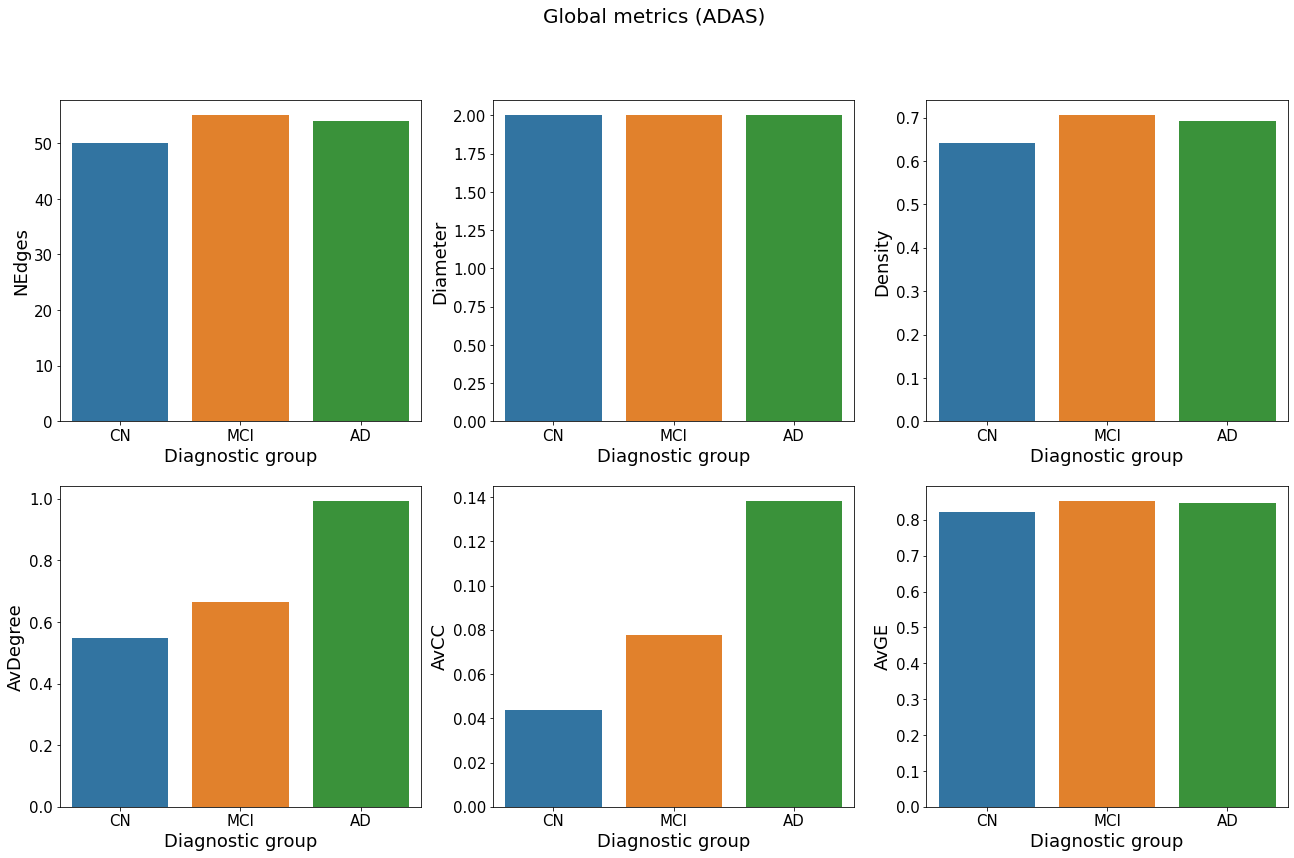

In [521]:
fig, ax = plt.subplots(2, 3, figsize=(22,13))

sns.barplot(ax=ax[0,0], x="index", y="NEdges", data=ADAS_gm) 
sns.barplot(ax=ax[0,1], x="index", y="Diameter", data=ADAS_gm)
sns.barplot(ax=ax[0,2], x="index", y="Density", data=ADAS_gm) 
sns.barplot(ax=ax[1,0], x="index", y="AvDegree", data=ADAS_gm) 
sns.barplot(ax=ax[1,1], x="index", y="AvCC", data=ADAS_gm)
sns.barplot(ax=ax[1,2], x="index", y="AvGE",  data=ADAS_gm)

fig.suptitle("Global metrics (ADAS)", fontsize=20)

rows, cols = 2, 3
for i in range(rows):
    for j in range(cols):
        ax[i, j].set_xlabel('Diagnostic group')
    
plt.show()

#### Modularity index (Louvain algorithm)

**Louvain Community Detection Algorithm** is a simple method to extract the community structure of a network. This is a heuristic method based on modularity optimization. 

The community structure of a network indexes the sub-division of such a network into segregated communities ormodules that contribute to the same processes while alsoallowing for a visual inspection of the network

Note that the order in which the nodes are considered can affect the final output. In the algorithm the ordering happens using a random shuffle. 

- In the epilepsy paper they calculated modularity 1,000 times for each group, and the highest proportion was chosen as the number of modules in that group. 

- Furthermore, in order to be certain regarding the module assignment for each node, they created a script that calculated the proportion of module assignment for each node in order to have each node assigned to the module with the highest probability. 

In [121]:
import networkx.algorithms.community as nx_comm

ADAS_CN_partition = nx_comm.louvain_communities(ADAS_CN_graph, weight='weight',seed=0)
ADAS_MCI_partition = nx_comm.louvain_communities(ADAS_MCI_graph, weight='weight',seed=0)
ADAS_AD_partition = nx_comm.louvain_communities(ADAS_AD_graph, weight='weight',seed=0)

print("--------------------------------")
print("LOUVAIN COMMUNITIES")
print("--------------------------------")
print()
print("Controls: ", ADAS_CN_partition)
print()
print("MCI: ", ADAS_MCI_partition)
print()
print("AD: ", ADAS_AD_partition)

print()
print("--------------------------------")
print("MODULARITY INDEX")
print("--------------------------------")
print()
print("Controls: ", nx_comm.modularity(ADAS_CN_graph, ADAS_CN_partition, weight='weight'))
print()
print("MCI: ", nx_comm.modularity(ADAS_MCI_graph, ADAS_MCI_partition, weight='weight'))
print()
print("AD: ", nx_comm.modularity(ADAS_AD_graph, ADAS_AD_partition, weight='weight'))

--------------------------------
LOUVAIN COMMUNITIES
--------------------------------

Controls:  [{0, 3, 7}, {2, 4, 5, 6, 8}, {1, 9, 10, 11, 12}]

MCI:  [{0, 3, 7}, {5, 8, 9, 10, 11}, {1, 2, 4, 6, 12}]

AD:  [{0, 3, 7}, {1, 2, 4, 5, 6, 12}, {8, 9, 10, 11}]

--------------------------------
MODULARITY INDEX
--------------------------------

Controls:  0.26375147215018024

MCI:  0.23818049628145266

AD:  0.20675408686555752


#### Draw graph displaying communities (Louvain communities)

In [122]:
def color_communities(graph, partition):
    
    colors = {} #create empty node dictionary
    
    #Convert set of partitions into node dictionary
    for i in range(len(partition)): #iterate for each group
        for node in partition[i]:
            colors[node] = i
            
    #Sort dictionary by keys
    node_list = list(colors.keys())
    node_list.sort()
    sorted_colors = {i: colors[i] for i in node_list}
            
    return list(sorted_colors.values())

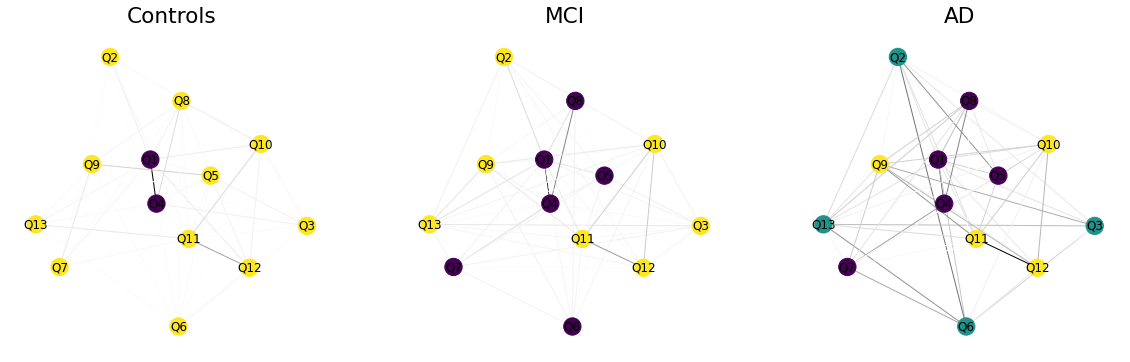

In [511]:
#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))

#Node labels
test_labels = {0:"Q1", 1:"Q2", 2:"Q3", 3:"Q4", 4:"Q5", 5: "Q6", 6:"Q7",
              7:"Q8",8:"Q9", 9:"Q10", 10:"Q11", 11:"Q12", 12:"Q13"}

#get colors
ADAS_CN_colors = color_communities(ADAS_CN_graph, ADAS_CN_partition)
ADAS_MCI_colors = color_communities(ADAS_MCI_graph, ADAS_MCI_partition)
ADAS_AD_colors = color_communities(ADAS_AD_graph, ADAS_AD_partition)

#fix positions
pos=nx.spring_layout(ADAS_CN_graph)

#get edges weights
edges_CN,weights_CN = zip(*nx.get_edge_attributes(ADAS_CN_graph,'weight').items())
edges_MCI,weights_MCI = zip(*nx.get_edge_attributes(ADAS_MCI_graph,'weight').items())
edges_AD,weights_AD = zip(*nx.get_edge_attributes(ADAS_AD_graph,'weight').items())

#draw graphs
nx.draw(ax=axes[0], G=ADAS_CN_graph, pos=pos, labels=test_labels, with_labels=True, node_color=ADAS_CN_colors,
       edge_color=weights_CN, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[1], G=ADAS_MCI_graph, pos=pos, labels=test_labels, with_labels=True, node_color=ADAS_MCI_colors,
       edge_color=weights_MCI, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[2], G=ADAS_AD_graph, pos=pos, labels=test_labels, with_labels=True, node_color=ADAS_AD_colors,
       edge_color=weights_AD, edge_cmap=plt.cm.Greys)

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.show()

#### Get subgraphs metrics (Louvain algorithm)

Each community detected is going to be considered as a subgraph. 

In [124]:
def metrics(graph):
    """Function to create a dictionary with all the metrics computed for a community"""
    
    metrics_dict = {}
    
    #GLOBAL METRICS
    #Compute the number of nodes 
    metrics_dict['NNodes'] = graph.number_of_nodes()
    #Compute the number of edges 
    metrics_dict['NEdges'] = graph.number_of_edges()
    #Compute the diameter of the graph
    metrics_dict['Diameter'] = nx.diameter(graph)
    #Compute the density of the graph
    metrics_dict['Density'] = nx.density(graph)
    #Compute the average degree of the network  
    metrics_dict['AvDegree'] = sum(dict(graph.degree(weight='weight')).values())/graph.number_of_nodes()
    #Compute the transitivity of the graph
    metrics_dict['Transitivity'] = nx.transitivity(graph)
    #Compute the average clustering coefficient
    metrics_dict['AvCC'] = nx.average_clustering(graph,weight='weight')
    #Compute the average global efficiency (shortest path)
    metrics_dict['AvGE'] = nx.global_efficiency(graph)
    
    #TESTS BELONGING TO THE COMMUNITY
    metrics_dict['Tests'] = list(dict(graph.nodes(data="Test")).values())
    
    return metrics_dict

In [125]:
def community_metrics(graph, partition):
    
    """Function to create a dataframe with all the metrics computed for each of the communities"""
    
    domains_list = list(dict(graph.nodes(data="Domain")).values())
    domains = [*set(domains_list)] #unique list of domains
    
    df = pd.DataFrame(columns = ['Index','NNodes', 'NEdges', 'Diameter', 'Density', 'AvDegree', 
                                 'Transitivity','AvCC', 'AvGE', 'Tests'] + domains) #empty dataframe
    
    for i in range(len(partition)): #iterate for each community
        #create subgraph for this community
        subgraph = graph.subgraph(partition[i]) 
        #compute metrics for the subgraph 
        metrics_dict = metrics(subgraph)
        
        #community index
        metrics_dict['Index'] = i
        
        #representation of each neurocognitive domain
        domains_list_community = list(dict(subgraph.nodes(data="Domain")).values())
        
        for domain in domains: 
            domain_count_total = domains_list.count(domain)
            domain_count_community = domains_list_community.count(domain)
            metrics_dict[domain] = domain_count_community/domain_count_total #percentage of representation 
        
        #introduce metrics in new row
        df = df.append(metrics_dict, ignore_index=True)
        
    return df

Community metrics for the controls group:

In [126]:
import warnings
warnings.filterwarnings('ignore')

display(community_metrics(ADAS_CN_graph, ADAS_CN_partition))

Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      3      3        1     1.0  0.612718          1.0  0.302002  1.0   
1     1      5      8        2     0.8  0.198234     0.789474  0.209797  0.9   
2     2      5      6        2     0.6   0.29995     0.545455  0.214788  0.8   

                                               Tests Language Memory  \
0  [Word recall, Delayed word recall, Word recogn...      0.0   0.75   
1  [Constructional praxis, Naming task, Ideationa...      0.2   0.25   
2  [Commands, Comprehension, Word finding difficu...      0.8    0.0   

  Executive Attention Orientation  
0       0.0       0.0         0.0  
1       1.0       0.0         1.0  
2       0.0       1.0         0.0

MCI group:

In [127]:
community_metrics(ADAS_MCI_graph, ADAS_MCI_partition)

Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      3      3        1     1.0   0.68623          1.0  0.496973  1.0   
1     1      5      8        2     0.8  0.394016     0.789474  0.366506  0.9   
2     2      5      8        2     0.8  0.190078     0.789474  0.383499  0.9   

                                               Tests Language Memory  \
0  [Word recall, Delayed word recall, Word recogn...      0.0   0.75   
1  [Ideational praxis, Remembering test instructi...      0.6   0.25   
2  [Commands, Constructional praxis, Naming task,...      0.4    0.0   

  Executive Attention Orientation  
0       0.0       0.0         0.0  
1       0.5       0.0         0.0  
2       0.5       1.0         1.0

AD group: 

In [128]:
community_metrics(ADAS_AD_graph, ADAS_AD_partition)

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0      3      3        1       1.0  0.484655          1.0  0.759361   
1     1      6     11        2  0.733333  0.524396     0.677419  0.241816   
2     2      4      6        1       1.0  0.646768          1.0  0.445045   

       AvGE                                              Tests Language  \
0       1.0  [Word recall, Delayed word recall, Word recogn...      0.0   
1  0.866667  [Commands, Constructional praxis, Naming task,...      0.4   
2       1.0  [Remembering test instructions, Comprehension,...      0.6   

  Memory Executive Attention Orientation  
0   0.75       0.0       0.0         0.0  
1    0.0       1.0       1.0         1.0  
2   0.25       0.0       0.0         0.0

#### Representation of the domains in each community

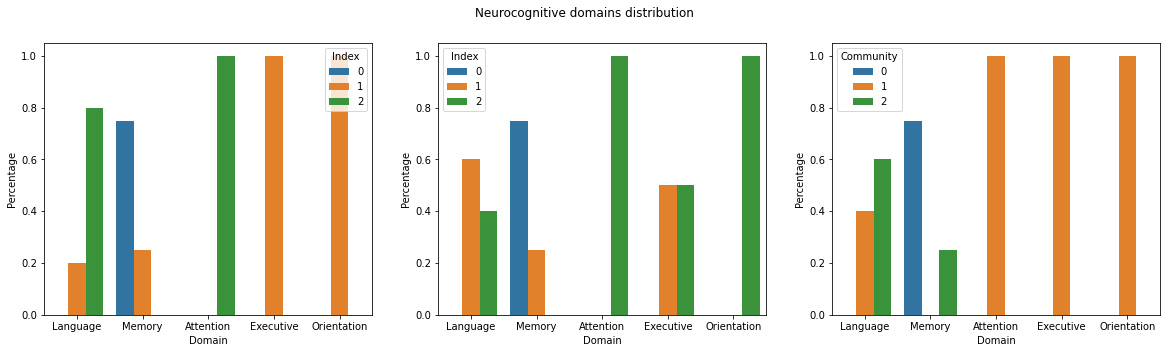

In [129]:
#Get data 
ADAS_CN_domains = community_metrics(ADAS_CN_graph, ADAS_CN_partition)[['Index','Language','Memory', 'Attention',
                                                                     'Executive', 'Orientation']]
ADAS_MCI_domains = community_metrics(ADAS_MCI_graph, ADAS_MCI_partition)[['Index','Language','Memory', 'Attention',
                                                                     'Executive', 'Orientation']]
ADAS_AD_domains = community_metrics(ADAS_AD_graph, ADAS_AD_partition)[['Index','Language','Memory', 'Attention',
                                                                     'Executive', 'Orientation']]

#Reshape data with melt() function
ADAS_CN_domains = ADAS_CN_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
ADAS_MCI_domains = ADAS_MCI_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
ADAS_AD_domains = ADAS_AD_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')

#plot 
fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.barplot(ax=axes[0], x="Domain", y="Percentage", hue="Index", data=ADAS_CN_domains)
sns.barplot(ax=axes[1], x="Domain", y="Percentage", hue="Index", data=ADAS_MCI_domains)
sns.barplot(ax=axes[2], x="Domain", y="Percentage", hue="Index", data=ADAS_AD_domains)


#ADAS_CN_domains.plot(kind='bar',ax=axes[0], x="Domain", y="Per. of representation", hue="Index", stacked=True)

fig.suptitle("Neurocognitive domains distribution")
plt.legend(title='Community')

plt.show()

#send data to build stacked barplot in R
ADAS_CN_domains.to_csv('./Results/ADAS/Louvain_CN.csv', index=False) 
ADAS_MCI_domains.to_csv('./Results/ADAS/Louvain_MCI.csv', index=False) 
ADAS_AD_domains.to_csv('./Results/ADAS/Louvain_AD.csv', index=False) 

#### Modularity index (Greedy modularity algorithm)

This function uses **Clauset-Newman-Moore greedy modularity maximization** to find the community partition with the largest modularity.

Greedy modularity maximization begins with each node in its own community and repeatedly joins the pair of communities that lead to the largest modularity until no further increase in modularity is possible (a maximum).

In [130]:
import networkx.algorithms.community as nx_comm

ADAS_CN_partition = nx_comm.greedy_modularity_communities(ADAS_CN_graph, weight='weight')
ADAS_MCI_partition = nx_comm.greedy_modularity_communities(ADAS_MCI_graph, weight='weight')
ADAS_AD_partition = nx_comm.greedy_modularity_communities(ADAS_AD_graph, weight='weight')

print("--------------------------------")
print("GREEDY MODULARITY COMMUNITIES")
print("--------------------------------")
print()
print("Controls: ", ADAS_CN_partition)
print()
print("MCI: ", ADAS_MCI_partition)
print()
print("AD: ", ADAS_AD_partition)

print()
print("--------------------------------")
print("MODULARITY INDEX")
print("--------------------------------")
print()
print("Controls: ", nx_comm.modularity(ADAS_CN_graph, ADAS_CN_partition, weight='weight'))
print()
print("MCI: ", nx_comm.modularity(ADAS_MCI_graph, ADAS_MCI_partition, weight='weight'))
print()
print("AD: ", nx_comm.modularity(ADAS_AD_graph, ADAS_AD_partition, weight='weight'))

--------------------------------
GREEDY MODULARITY COMMUNITIES
--------------------------------

Controls:  [frozenset({2, 4, 5, 6, 8}), frozenset({1, 9, 10, 11, 12}), frozenset({0, 3, 7})]

MCI:  [frozenset({2, 8, 9, 10, 11, 12}), frozenset({0, 1, 3, 4, 7}), frozenset({5, 6})]

AD:  [frozenset({0, 3, 4, 6, 7}), frozenset({8, 9, 10, 11}), frozenset({1, 2, 12, 5})]

--------------------------------
MODULARITY INDEX
--------------------------------

Controls:  0.26375147215018024

MCI:  0.22683048815546075

AD:  0.22552180465252383


#### Draw graph displaying communities (Greedy modularity communities)

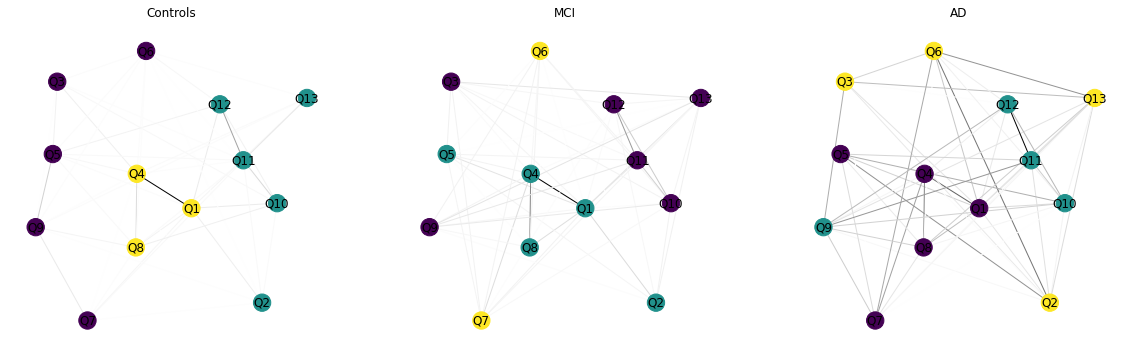

In [131]:
#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))

#Node labels
test_labels = {0:"Q1", 1:"Q2", 2:"Q3", 3:"Q4", 4:"Q5", 5: "Q6", 6:"Q7",
              7:"Q8",8:"Q9", 9:"Q10", 10:"Q11", 11:"Q12", 12:"Q13"}

#get colors
ADAS_CN_colors = color_communities(ADAS_CN_graph, ADAS_CN_partition)
ADAS_MCI_colors = color_communities(ADAS_MCI_graph, ADAS_MCI_partition)
ADAS_AD_colors = color_communities(ADAS_AD_graph, ADAS_AD_partition)

#fix positions
pos=nx.spring_layout(ADAS_CN_graph)

#get edges weights
edges_CN,weights_CN = zip(*nx.get_edge_attributes(ADAS_CN_graph,'weight').items())
edges_MCI,weights_MCI = zip(*nx.get_edge_attributes(ADAS_MCI_graph,'weight').items())
edges_AD,weights_AD = zip(*nx.get_edge_attributes(ADAS_AD_graph,'weight').items())

#draw graphs
nx.draw(ax=axes[0], G=ADAS_CN_graph, pos=pos, labels=test_labels, with_labels=True, node_color=ADAS_CN_colors,
       edge_color=weights_CN, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[1], G=ADAS_MCI_graph, pos=pos, labels=test_labels, with_labels=True, node_color=ADAS_MCI_colors,
       edge_color=weights_MCI, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[2], G=ADAS_AD_graph, pos=pos, labels=test_labels, with_labels=True, node_color=ADAS_AD_colors,
       edge_color=weights_AD, edge_cmap=plt.cm.Greys)

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.show()

#### Get subgraphs metrics (Greedy modularity algorithm)

Each community detected is going to be considered as a subgraph. 

Community metrics for the controls group:

In [132]:
import warnings
warnings.filterwarnings('ignore')

display(community_metrics(ADAS_CN_graph, ADAS_CN_partition))

Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      5      8        2     0.8  0.198234     0.789474  0.209797  0.9   
1     1      5      6        2     0.6   0.29995     0.545455  0.214788  0.8   
2     2      3      3        1     1.0  0.612718          1.0  0.302002  1.0   

                                               Tests Language Memory  \
0  [Constructional praxis, Naming task, Ideationa...      0.2   0.25   
1  [Commands, Comprehension, Word finding difficu...      0.8    0.0   
2  [Word recall, Delayed word recall, Word recogn...      0.0   0.75   

  Executive Attention Orientation  
0       1.0       0.0         1.0  
1       0.0       1.0         0.0  
2       0.0       0.0         0.0

MCI group:

In [133]:
community_metrics(ADAS_MCI_graph, ADAS_MCI_partition)

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0      6     13        2  0.866667  0.440539     0.866667  0.280661   
1     1      5      8        2       0.8   0.56004     0.789474  0.192208   
2     2      2      1        1       1.0  0.060484            0       0.0   

       AvGE                                              Tests Language  \
0  0.933333  [Constructional praxis, Remembering test instr...      0.6   
1       0.9  [Word recall, Commands, Delayed word recall, N...      0.4   
2       1.0                   [Ideational praxis, Orientation]      0.0   

  Memory Executive Attention Orientation  
0   0.25       0.5       1.0         0.0  
1   0.75       0.0       0.0         0.0  
2    0.0       0.5       0.0         1.0

AD group: 

In [134]:
community_metrics(ADAS_AD_graph, ADAS_AD_partition)

Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC  AvGE  \
0     0      5      9        2     0.9  0.537328        0.875   0.33332  0.95   
1     1      4      6        1     1.0  0.646768          1.0  0.445045   1.0   
2     2      4      6        1     1.0  0.494131          1.0  0.545392   1.0   

                                               Tests Language Memory  \
0  [Word recall, Delayed word recall, Naming task...      0.2   0.75   
1  [Remembering test instructions, Comprehension,...      0.6   0.25   
2  [Commands, Constructional praxis, Number cance...      0.2    0.0   

  Executive Attention Orientation  
0       0.0       0.0         1.0  
1       0.0       0.0         0.0  
2       1.0       1.0         0.0

#### Representation of the domains in each community

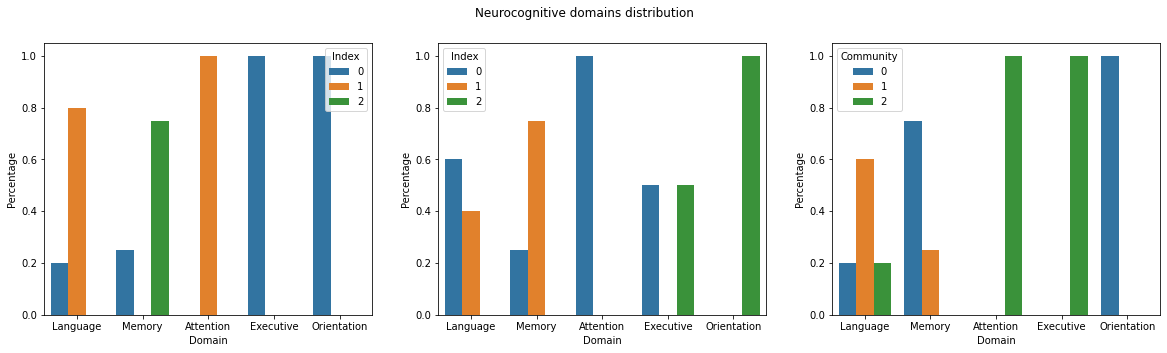

In [135]:
#Get data 
ADAS_CN_domains = community_metrics(ADAS_CN_graph, ADAS_CN_partition)[['Index','Language','Memory', 'Attention',
                                                                     'Executive', 'Orientation']]
ADAS_MCI_domains = community_metrics(ADAS_MCI_graph, ADAS_MCI_partition)[['Index','Language','Memory', 'Attention',
                                                                     'Executive', 'Orientation']]
ADAS_AD_domains = community_metrics(ADAS_AD_graph, ADAS_AD_partition)[['Index','Language','Memory', 'Attention',
                                                                     'Executive', 'Orientation']]

#Reshape data with melt() function
ADAS_CN_domains = ADAS_CN_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
ADAS_MCI_domains = ADAS_MCI_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
ADAS_AD_domains = ADAS_AD_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')

#plot 
fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.barplot(ax=axes[0], x="Domain", y="Percentage", hue="Index", data=ADAS_CN_domains)
sns.barplot(ax=axes[1], x="Domain", y="Percentage", hue="Index", data=ADAS_MCI_domains)
sns.barplot(ax=axes[2], x="Domain", y="Percentage", hue="Index", data=ADAS_AD_domains)


#ADAS_CN_domains.plot(kind='bar',ax=axes[0], x="Domain", y="Per. of representation", hue="Index", stacked=True)

fig.suptitle("Neurocognitive domains distribution")
plt.legend(title='Community')

plt.show()

#send data to build stacked barplot in R
ADAS_CN_domains.to_csv('./Results/ADAS/Greedy_CN.csv', index=False) 
ADAS_MCI_domains.to_csv('./Results/ADAS/Greedy_MCI.csv', index=False) 
ADAS_AD_domains.to_csv('./Results/ADAS/Greedy_AD.csv', index=False) 

#### Modularity index (Kernighan-Lin bipartition algorithm)

This function uses **Kernighan-Lin bipartition algorithm** to partition a graph into two blocks.

This algorithm partitions a network into two sets by iteratively swapping pairs of nodes to reduce the edge cut between the two sets. The pairs are chosen according to a modified form of Kernighan-Lin, which moves node individually, alternating between sides to keep the bisection balanced.

In [338]:
import networkx.algorithms.community as nx_comm

ADAS_CN_partition = nx_comm.kernighan_lin_bisection(ADAS_CN_graph, weight='weight', seed=0)
ADAS_MCI_partition = nx_comm.kernighan_lin_bisection(ADAS_MCI_graph, weight='weight', seed=0)
ADAS_AD_partition = nx_comm.kernighan_lin_bisection(ADAS_AD_graph, weight='weight', seed=0)

print("--------------------------------")
print("GREEDY MODULARITY COMMUNITIES")
print("--------------------------------")
print()
print("Controls: ", ADAS_CN_partition)
print()
print("MCI: ", ADAS_MCI_partition)
print()
print("AD: ", ADAS_AD_partition)

print()
print("--------------------------------")
print("MODULARITY INDEX")
print("--------------------------------")
print()
print("Controls: ", nx_comm.modularity(ADAS_CN_graph, ADAS_CN_partition, weight='weight'))
print()
print("MCI: ", nx_comm.modularity(ADAS_MCI_graph, ADAS_MCI_partition, weight='weight'))
print()
print("AD: ", nx_comm.modularity(ADAS_AD_graph, ADAS_AD_partition, weight='weight'))

--------------------------------
GREEDY MODULARITY COMMUNITIES
--------------------------------

Controls:  ({1, 5, 9, 10, 11, 12}, {0, 2, 3, 4, 6, 7, 8})

MCI:  ({5, 8, 9, 10, 11, 12}, {0, 1, 2, 3, 4, 6, 7})

AD:  ({1, 4, 8, 9, 10, 11}, {0, 2, 3, 5, 6, 7, 12})

--------------------------------
MODULARITY INDEX
--------------------------------

Controls:  0.19606972248939356

MCI:  0.2089923135032156

AD:  0.1613518482434896


#### Draw graph displaying communities (Greedy modularity communities)

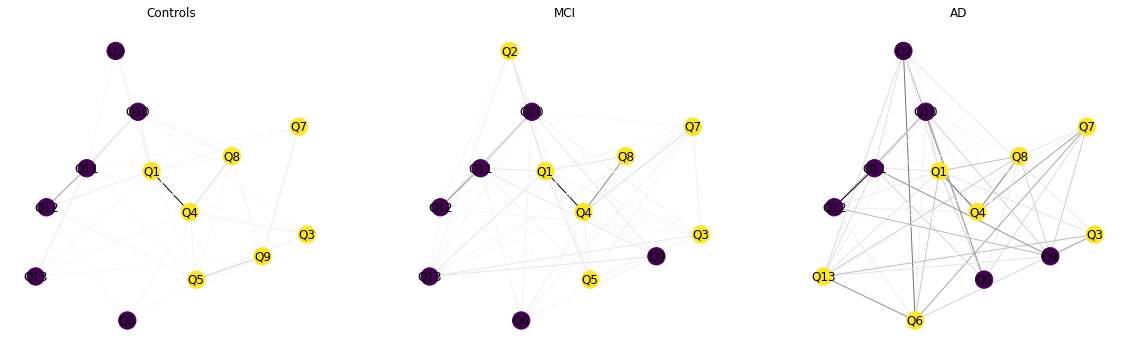

In [339]:
#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))

#Node labels
test_labels = {0:"Q1", 1:"Q2", 2:"Q3", 3:"Q4", 4:"Q5", 5: "Q6", 6:"Q7",
              7:"Q8",8:"Q9", 9:"Q10", 10:"Q11", 11:"Q12", 12:"Q13"}

#get colors
ADAS_CN_colors = color_communities(ADAS_CN_graph, ADAS_CN_partition)
ADAS_MCI_colors = color_communities(ADAS_MCI_graph, ADAS_MCI_partition)
ADAS_AD_colors = color_communities(ADAS_AD_graph, ADAS_AD_partition)

#fix positions
pos=nx.spring_layout(ADAS_CN_graph)

#get edges weights
edges_CN,weights_CN = zip(*nx.get_edge_attributes(ADAS_CN_graph,'weight').items())
edges_MCI,weights_MCI = zip(*nx.get_edge_attributes(ADAS_MCI_graph,'weight').items())
edges_AD,weights_AD = zip(*nx.get_edge_attributes(ADAS_AD_graph,'weight').items())

#draw graphs
nx.draw(ax=axes[0], G=ADAS_CN_graph, pos=pos, labels=test_labels, with_labels=True, node_color=ADAS_CN_colors,
       edge_color=weights_CN, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[1], G=ADAS_MCI_graph, pos=pos, labels=test_labels, with_labels=True, node_color=ADAS_MCI_colors,
       edge_color=weights_MCI, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[2], G=ADAS_AD_graph, pos=pos, labels=test_labels, with_labels=True, node_color=ADAS_AD_colors,
       edge_color=weights_AD, edge_cmap=plt.cm.Greys)

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.show()

#### Get subgraphs metrics (Kernighan-Lin bisection algorithm)

Each community detected is going to be considered as a subgraph. 

Community metrics for the controls group:

In [341]:
import warnings
warnings.filterwarnings('ignore')

display(community_metrics(ADAS_CN_graph, ADAS_CN_partition))

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0      6     10        2  0.666667  0.284551         0.48  0.100806   
1     1      7     18        2  0.857143  0.496483     0.828947  0.074446   

       AvGE                                              Tests Language  \
0  0.833333  [Commands, Ideational praxis, Comprehension, W...      0.8   
1  0.928571  [Word recall, Constructional praxis, Delayed w...      0.2   

  Memory Executive Attention Orientation  
0    0.0       0.5       1.0         0.0  
1    1.0       0.5       0.0         1.0

MCI group:

In [342]:
community_metrics(ADAS_MCI_graph, ADAS_MCI_partition)

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0      6     12        2       0.8  0.414494     0.789474  0.279033   
1     1      7     15        2  0.714286  0.532353         0.75  0.145192   

       AvGE                                              Tests Language  \
0       0.9  [Ideational praxis, Remembering test instructi...      0.6   
1  0.857143  [Word recall, Commands, Constructional praxis,...      0.4   

  Memory Executive Attention Orientation  
0   0.25       0.5       1.0         0.0  
1   0.75       0.5       0.0         1.0

AD group: 

In [343]:
community_metrics(ADAS_AD_graph, ADAS_AD_partition)

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0      6     12        2       0.8  0.669898     0.789474  0.281614   
1     1      7     16        2  0.761905  0.646282     0.711864  0.265832   

       AvGE                                              Tests Language  \
0       0.9  [Commands, Naming task, Remembering test instr...      1.0   
1  0.880952  [Word recall, Constructional praxis, Delayed w...      0.0   

  Memory Executive Attention Orientation  
0   0.25       0.0       0.0         0.0  
1   0.75       1.0       1.0         1.0

#### Representation of the domains in each community

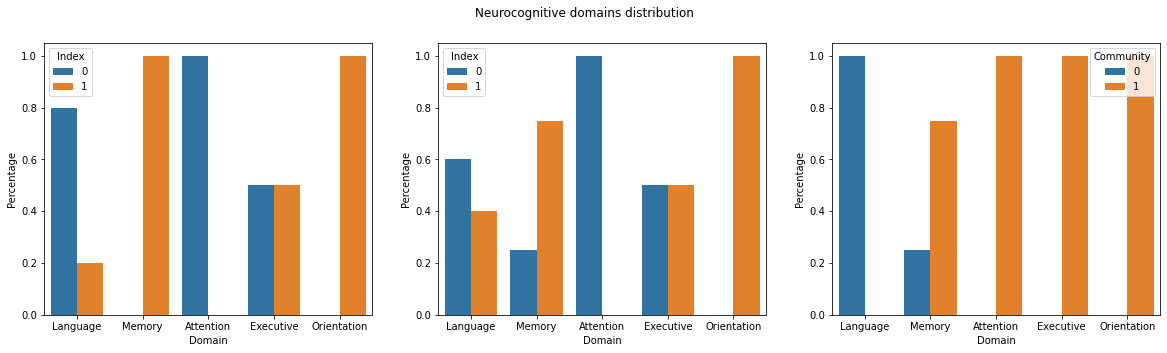

In [344]:
#Get data 
ADAS_CN_domains = community_metrics(ADAS_CN_graph, ADAS_CN_partition)[['Index','Language','Memory', 'Attention',
                                                                     'Executive', 'Orientation']]
ADAS_MCI_domains = community_metrics(ADAS_MCI_graph, ADAS_MCI_partition)[['Index','Language','Memory', 'Attention',
                                                                     'Executive', 'Orientation']]
ADAS_AD_domains = community_metrics(ADAS_AD_graph, ADAS_AD_partition)[['Index','Language','Memory', 'Attention',
                                                                     'Executive', 'Orientation']]

#Reshape data with melt() function
ADAS_CN_domains = ADAS_CN_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
ADAS_MCI_domains = ADAS_MCI_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
ADAS_AD_domains = ADAS_AD_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')

#plot 
fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.barplot(ax=axes[0], x="Domain", y="Percentage", hue="Index", data=ADAS_CN_domains)
sns.barplot(ax=axes[1], x="Domain", y="Percentage", hue="Index", data=ADAS_MCI_domains)
sns.barplot(ax=axes[2], x="Domain", y="Percentage", hue="Index", data=ADAS_AD_domains)


#ADAS_CN_domains.plot(kind='bar',ax=axes[0], x="Domain", y="Per. of representation", hue="Index", stacked=True)

fig.suptitle("Neurocognitive domains distribution")
plt.legend(title='Community')

plt.show()

#send data to build stacked barplot in R
ADAS_CN_domains.to_csv('./Results/ADAS/Bisection_CN.csv', index=False) 
ADAS_MCI_domains.to_csv('./Results/ADAS/Bisection_MCI.csv', index=False) 
ADAS_AD_domains.to_csv('./Results/ADAS/Bisection_AD.csv', index=False) 

#### Modularity index (Label propagation)

This function uses the **asynchronous label propagation algorithm** which is probabilistic and the found communities may vary on different executions.

The algorithm proceeds as follows. After initializing each node with a unique label, the algorithm repeatedly sets the label of a node to be the label that appears most frequently among that nodes neighbors. The algorithm halts when each node has the label that appears most frequently among its neighbors. The algorithm is asynchronous because each node is updated without waiting for updates on the remaining nodes.

In [358]:
import networkx.algorithms.community as nx_comm

ADAS_CN_partition = list(nx_comm.asyn_lpa_communities(ADAS_CN_graph, weight='weight', seed=0))
ADAS_MCI_partition = list(nx_comm.asyn_lpa_communities(ADAS_MCI_graph, weight='weight', seed=0))
ADAS_AD_partition = list(nx_comm.asyn_lpa_communities(ADAS_AD_graph, weight='weight', seed=0))

print("--------------------------------")
print("GREEDY MODULARITY COMMUNITIES")
print("--------------------------------")
print()
print("Controls: ", ADAS_CN_partition)
print()
print("MCI: ", ADAS_MCI_partition)
print()
print("AD: ", ADAS_AD_partition)

print()
print("--------------------------------")
print("MODULARITY INDEX")
print("--------------------------------")
print()
print("Controls: ", nx_comm.modularity(ADAS_CN_graph, ADAS_CN_partition, weight='weight'))
print()
print("MCI: ", nx_comm.modularity(ADAS_MCI_graph, ADAS_MCI_partition, weight='weight'))
print()
print("AD: ", nx_comm.modularity(ADAS_AD_graph, ADAS_AD_partition, weight='weight'))

--------------------------------
GREEDY MODULARITY COMMUNITIES
--------------------------------

Controls:  [{0, 3}, {1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12}]

MCI:  [{0, 3, 4, 5, 6, 7}, {1, 2, 8, 9, 10, 11, 12}]

AD:  [{0, 3, 4, 6, 7}, {1, 2, 12, 5}, {8, 9, 10, 11}]

--------------------------------
MODULARITY INDEX
--------------------------------

Controls:  0.1681909156612761

MCI:  0.23173824518515732

AD:  0.22552180465252383


#### Draw graph displaying communities (Greedy modularity communities)

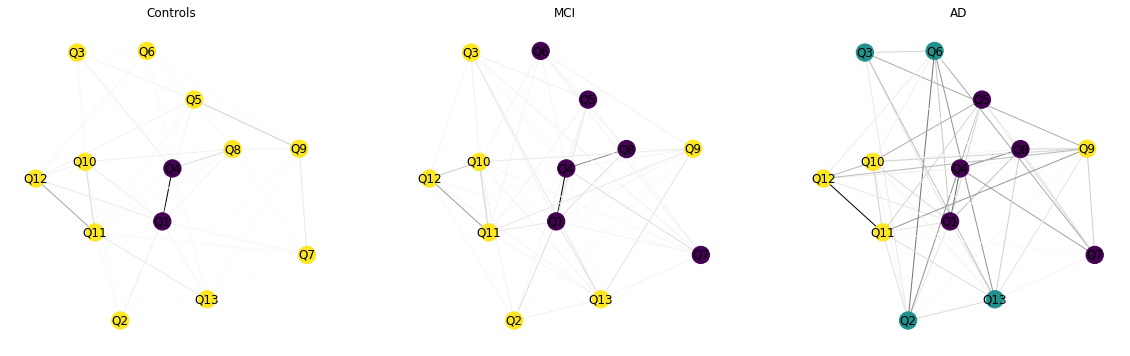

In [359]:
#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))

#Node labels
test_labels = {0:"Q1", 1:"Q2", 2:"Q3", 3:"Q4", 4:"Q5", 5: "Q6", 6:"Q7",
              7:"Q8",8:"Q9", 9:"Q10", 10:"Q11", 11:"Q12", 12:"Q13"}

#get colors
ADAS_CN_colors = color_communities(ADAS_CN_graph, ADAS_CN_partition)
ADAS_MCI_colors = color_communities(ADAS_MCI_graph, ADAS_MCI_partition)
ADAS_AD_colors = color_communities(ADAS_AD_graph, ADAS_AD_partition)

#fix positions
pos=nx.spring_layout(ADAS_CN_graph)

#get edges weights
edges_CN,weights_CN = zip(*nx.get_edge_attributes(ADAS_CN_graph,'weight').items())
edges_MCI,weights_MCI = zip(*nx.get_edge_attributes(ADAS_MCI_graph,'weight').items())
edges_AD,weights_AD = zip(*nx.get_edge_attributes(ADAS_AD_graph,'weight').items())

#draw graphs
nx.draw(ax=axes[0], G=ADAS_CN_graph, pos=pos, labels=test_labels, with_labels=True, node_color=ADAS_CN_colors,
       edge_color=weights_CN, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[1], G=ADAS_MCI_graph, pos=pos, labels=test_labels, with_labels=True, node_color=ADAS_MCI_colors,
       edge_color=weights_MCI, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[2], G=ADAS_AD_graph, pos=pos, labels=test_labels, with_labels=True, node_color=ADAS_AD_colors,
       edge_color=weights_AD, edge_cmap=plt.cm.Greys)

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.show()

#### Get subgraphs metrics (Greedy modularity algorithm)

Each community detected is going to be considered as a subgraph. 

Community metrics for the controls group:

In [360]:
import warnings
warnings.filterwarnings('ignore')

display(community_metrics(ADAS_CN_graph, ADAS_CN_partition))

Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      2      1        1     1.0  0.677158            0       0.0  1.0   
1     1     11     33        2     0.6  0.349595     0.536313  0.080998  0.8   

                                               Tests Language Memory  \
0                 [Word recall, Delayed word recall]      0.0    0.5   
1  [Commands, Constructional praxis, Naming task,...      1.0    0.5   

  Executive Attention Orientation  
0       0.0       0.0         0.0  
1       1.0       1.0         1.0

MCI group:

In [361]:
community_metrics(ADAS_MCI_graph, ADAS_MCI_partition)

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0      6     14        2  0.933333  0.549852     0.923077  0.132636   
1     1      7     17        2  0.809524  0.432313     0.794118  0.225838   

       AvGE                                              Tests Language  \
0  0.966667  [Word recall, Delayed word recall, Naming task...      0.2   
1  0.904762  [Commands, Constructional praxis, Remembering ...      0.8   

  Memory Executive Attention Orientation  
0   0.75       0.5       0.0         1.0  
1   0.25       0.5       1.0         0.0

AD group: 

In [362]:
community_metrics(ADAS_AD_graph, ADAS_AD_partition)

Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC  AvGE  \
0     0      5      9        2     0.9  0.537328        0.875   0.33332  0.95   
1     1      4      6        1     1.0  0.494131          1.0  0.545392   1.0   
2     2      4      6        1     1.0  0.646768          1.0  0.445045   1.0   

                                               Tests Language Memory  \
0  [Word recall, Delayed word recall, Naming task...      0.2   0.75   
1  [Commands, Constructional praxis, Number cance...      0.2    0.0   
2  [Remembering test instructions, Comprehension,...      0.6   0.25   

  Executive Attention Orientation  
0       0.0       0.0         1.0  
1       1.0       1.0         0.0  
2       0.0       0.0         0.0

#### Representation of the domains in each community

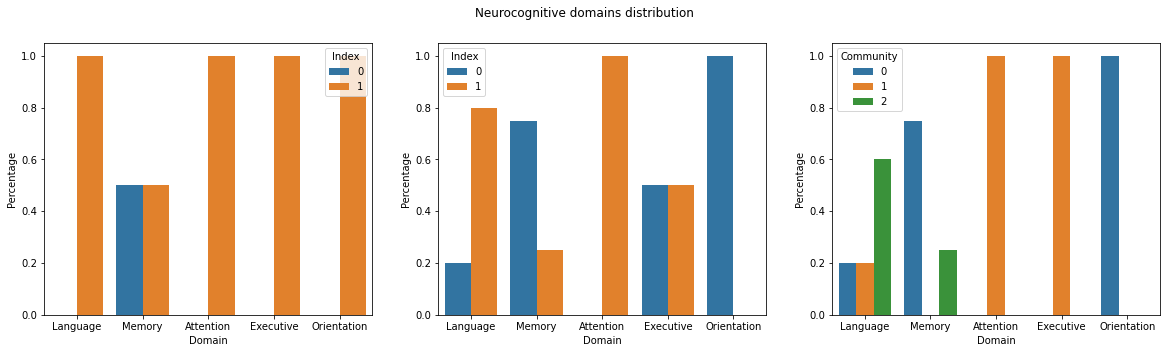

In [363]:
#Get data 
ADAS_CN_domains = community_metrics(ADAS_CN_graph, ADAS_CN_partition)[['Index','Language','Memory', 'Attention',
                                                                     'Executive', 'Orientation']]
ADAS_MCI_domains = community_metrics(ADAS_MCI_graph, ADAS_MCI_partition)[['Index','Language','Memory', 'Attention',
                                                                     'Executive', 'Orientation']]
ADAS_AD_domains = community_metrics(ADAS_AD_graph, ADAS_AD_partition)[['Index','Language','Memory', 'Attention',
                                                                     'Executive', 'Orientation']]

#Reshape data with melt() function
ADAS_CN_domains = ADAS_CN_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
ADAS_MCI_domains = ADAS_MCI_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
ADAS_AD_domains = ADAS_AD_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')

#plot 
fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.barplot(ax=axes[0], x="Domain", y="Percentage", hue="Index", data=ADAS_CN_domains)
sns.barplot(ax=axes[1], x="Domain", y="Percentage", hue="Index", data=ADAS_MCI_domains)
sns.barplot(ax=axes[2], x="Domain", y="Percentage", hue="Index", data=ADAS_AD_domains)


#ADAS_CN_domains.plot(kind='bar',ax=axes[0], x="Domain", y="Per. of representation", hue="Index", stacked=True)

fig.suptitle("Neurocognitive domains distribution")
plt.legend(title='Community')

plt.show()

#send data to build stacked barplot in R
ADAS_CN_domains.to_csv('./Results/ADAS/Asyn_CN.csv', index=False) 
ADAS_MCI_domains.to_csv('./Results/ADAS/Asyn_MCI.csv', index=False) 
ADAS_AD_domains.to_csv('./Results/ADAS/Asyn_AD.csv', index=False) 

### MMSE

#### Divide data by diagnostic group

In [376]:
#Get indexes of subjects belonging to each group
MMSE_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_MMSE = Y_MMSE.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    MMSE_indexes[dx] = Y_MMSE.index[Y_MMSE['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_MMSE_CN = X_MMSE.iloc[MMSE_indexes["CN"]]
X_MMSE_MCI = X_MMSE.iloc[MMSE_indexes["MCI"]]
X_MMSE_AD = X_MMSE.iloc[MMSE_indexes["AD"]]

print("Number of instances CN: ", X_MMSE_CN.shape[0])
print("Number of instances MCI: ", X_MMSE_MCI.shape[0])
print("Number of instances AD: ", X_MMSE_AD.shape[0])

Number of instances CN:  523
Number of instances MCI:  878
Number of instances AD:  339


#### Plot z-scores by cognitive domain

1. Compute averages of each test
2. Group by NC domain
3. Compute the average of each domain

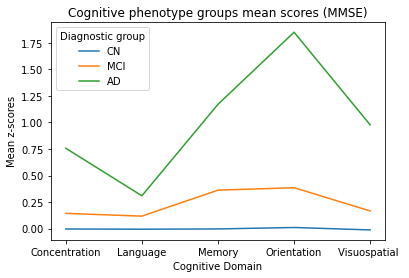

In [472]:
metadata_path = "./Tests/MMSE_Metadata.csv"
#Compute zscores means for each cognitive domain by diagnostic group
MMSE_means_CN = zscores_means(X_MMSE_CN, "CN", metadata_path)
MMSE_means_MCI = zscores_means(X_MMSE_MCI, "MCI", metadata_path)
MMSE_means_AD = zscores_means(X_MMSE_AD, "AD", metadata_path)

#Concanetate all dataframes
MMSE_means_df = pd.concat([MMSE_means_CN, MMSE_means_MCI, MMSE_means_AD])
MMSE_means_df.index = range(len(MMSE_means_df))

#plot dataframe
sns.lineplot(data=MMSE_means_df, x='Cognitive Domain', y='Mean', hue='Diagnostic')
plt.title("Cognitive phenotype groups mean scores (MMSE)")
plt.ylabel("Mean z-scores")
plt.legend(title="Diagnostic group")
plt.show()

#### Compute adjacency matrixes

In [377]:
MMSE_CN_mx = par_corr(X_MMSE_CN)
MMSE_MCI_mx = par_corr(X_MMSE_MCI)
MMSE_AD_mx = par_corr(X_MMSE_AD)

#### Plot adjacency matrixes

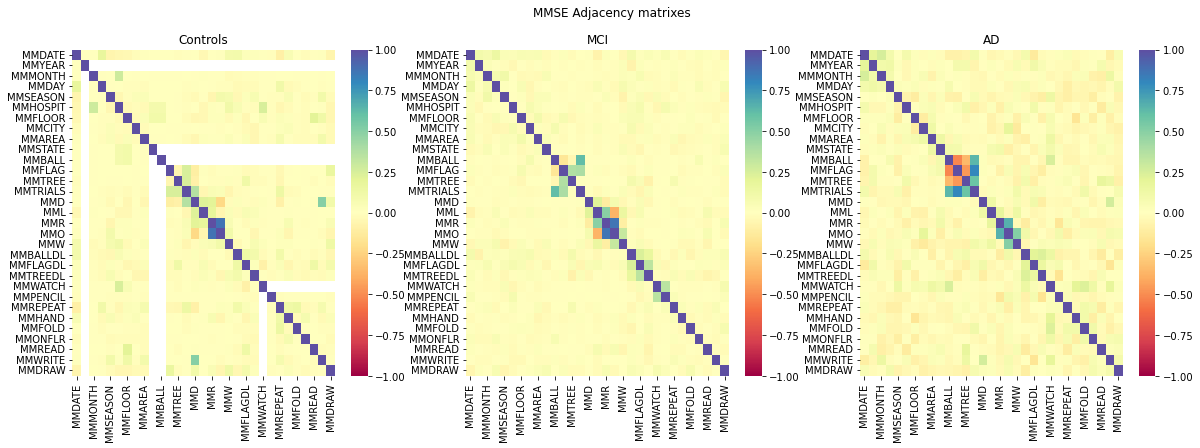

In [378]:
fig, axes = plt.subplots(1,3, figsize=(20,6))


fig.suptitle('MMSE Adjacency matrixes')

sns.heatmap(ax=axes[0],data=MMSE_CN_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[1],data=MMSE_MCI_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[2],data=MMSE_AD_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.show()

The 4 variables that are causing problems in the controls are: `MMYEAR`, `MMSTATE`, `MMBALL` and `MMWATCH`. All of them are binary variables, but it is the same for most of the MMSE features. 

- `MMYEAR`: patients are asked to say which is the current year. 
- `MMSTATE`: patients are asked to say which is the current state. 
- `MMBALL`: the patients have to name this object (and later repeat it: `MMBALLDL`) 
- `MMWATCH`: patient has to name this object.

The problem with these 4 variables seem to be that all control subjects are able to correctly pass the tests, so all of them have received 1 point and, therefore, at normalizing it using z-scores all values are 0, which is giving problems when computing partial correlations due to "division by 0". 

#### Compute graph

In [379]:
#Remove diagonal elements and negative correlations from the matrix

for i in range(MMSE_MCI_mx.shape[1]):
    colname = MMSE_MCI_mx.columns[i]
    MMSE_CN_mx[colname] = np.where((MMSE_CN_mx[colname]< 0) | (MMSE_CN_mx[colname]==1.0) | (MMSE_CN_mx[colname].isnull()),0, MMSE_CN_mx[colname]) 
    MMSE_MCI_mx[colname] = np.where((MMSE_MCI_mx[colname]< 0) | (MMSE_MCI_mx[colname]==1.0) | (MMSE_MCI_mx[colname].isnull()),0, MMSE_MCI_mx[colname]) 
    MMSE_AD_mx[colname] = np.where((MMSE_AD_mx[colname]< 0) | (MMSE_AD_mx[colname]==1.0) | (MMSE_AD_mx[colname].isnull()),0, MMSE_AD_mx[colname]) 

In [380]:
import networkx as nx

#convert adjacency matrix into graph
MMSE_CN_graph = nx.from_numpy_array(MMSE_CN_mx.to_numpy())
MMSE_MCI_graph = nx.from_numpy_array(MMSE_MCI_mx.to_numpy())
MMSE_AD_graph = nx.from_numpy_array(MMSE_AD_mx.to_numpy())

In [381]:
#count nodes and edges
print("CN-------------------------")
print("- Number of nodes: ", MMSE_CN_graph.number_of_nodes())
print("- Number of edges: ", MMSE_CN_graph.number_of_edges())
print()
print("MCI-------------------------")
print("- Number of nodes: ", MMSE_MCI_graph.number_of_nodes())
print("- Number of edges: ", MMSE_MCI_graph.number_of_edges())
print()
print("AD-------------------------")
print("- Number of nodes: ", MMSE_AD_graph.number_of_nodes())
print("- Number of edges: ", MMSE_AD_graph.number_of_edges())

CN-------------------------
- Number of nodes:  31
- Number of edges:  168

MCI-------------------------
- Number of nodes:  31
- Number of edges:  197

AD-------------------------
- Number of nodes:  31
- Number of edges:  202


#### Add node attributes

As the nodes represent different tests they are going to have the following attributes:

- ADNI column: name of the test in the ADNI database
- Test description
- Cognitive domain

In [382]:
#Import node metadata
MMSE_metadata = pd.read_csv("./Tests/MMSE_Metadata.csv", sep=";", 
                            usecols = ['Node', 'ADNI column', 'Test', 'Cognitive Domain'])

graphs = [MMSE_CN_graph, MMSE_MCI_graph, MMSE_AD_graph]

for graph in graphs:
    #ADNI column
    nx.set_node_attributes(graph, dict(zip(MMSE_metadata.Node, MMSE_metadata['ADNI column'])), name="ADNIColumn")
    #Test
    nx.set_node_attributes(graph, dict(zip(MMSE_metadata.Node, MMSE_metadata['Test'])), name="Test")
    #Cognitive domain
    nx.set_node_attributes(graph, dict(zip(MMSE_metadata.Node, MMSE_metadata['Cognitive Domain'])), name="Domain")

#### Draw graph

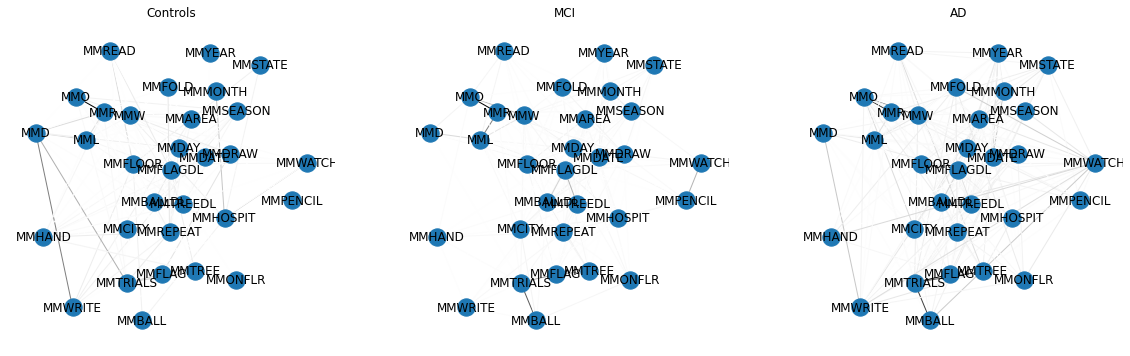

In [383]:
#Labels

test_labels = {} #create empty dictionary

for i in range(MMSE_CN_mx.shape[1]):
    test_labels[i] = MMSE_CN_mx.columns[i]
    

#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))

#fix position
pos=nx.spring_layout(MMSE_MCI_graph)

#get edges weights
edges_CN,weights_CN = zip(*nx.get_edge_attributes(MMSE_CN_graph,'weight').items())
edges_MCI,weights_MCI = zip(*nx.get_edge_attributes(MMSE_MCI_graph,'weight').items())
edges_AD,weights_AD = zip(*nx.get_edge_attributes(MMSE_AD_graph,'weight').items())

#draw graphs
nx.draw(ax=axes[0], G=MMSE_CN_graph, pos=pos, labels=test_labels, with_labels=True,
       edge_color=weights_CN, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[1], G=MMSE_MCI_graph, pos=pos, labels=test_labels, with_labels=True,
       edge_color=weights_MCI, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[2], G=MMSE_AD_graph, pos=pos, labels=test_labels, with_labels=True,
       edge_color=weights_AD, edge_cmap=plt.cm.Greys)

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.show()

#### Edges weights

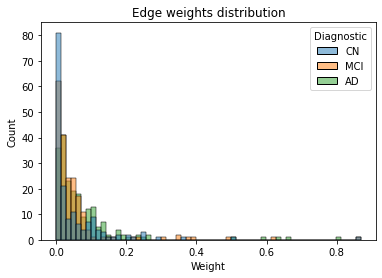

In [384]:
#Create dataframe with weights
weights_df_CN = pd.DataFrame(weights_CN, columns=["Weight"])
weights_df_CN['Diagnostic'] = "CN"
weights_df_MCI = pd.DataFrame(weights_MCI, columns=["Weight"])
weights_df_MCI['Diagnostic'] = "MCI"
weights_df_AD = pd.DataFrame(weights_AD, columns=["Weight"])
weights_df_AD['Diagnostic'] = "AD"

#merge all
weights_df = pd.concat([weights_df_CN, weights_df_MCI, weights_df_AD], ignore_index=True)

#plot histogram
sns.histplot(data=weights_df, x="Weight", hue="Diagnostic")
plt.title("Edge weights distribution")
plt.show()

#### Node centrality

In [144]:
#Node degree

print("---------------------")
print("DEGREE CENTRALITY")
print("---------------------")
print()
print("Controls: ", nx.degree_centrality(MMSE_CN_graph))
print()
print("MCI: ", nx.degree_centrality(MMSE_MCI_graph))
print()
print("AD: ", nx.degree_centrality(MMSE_AD_graph))

---------------------
DEGREE CENTRALITY
---------------------

Controls:  {0: 0.6, 1: 0.03333333333333333, 2: 0.36666666666666664, 3: 0.3333333333333333, 4: 0.4, 5: 0.43333333333333335, 6: 0.5, 7: 0.26666666666666666, 8: 0.4, 9: 0.2, 10: 0.2, 11: 0.43333333333333335, 12: 0.3, 13: 0.3333333333333333, 14: 0.4666666666666667, 15: 0.4666666666666667, 16: 0.4666666666666667, 17: 0.36666666666666664, 18: 0.6333333333333333, 19: 0.3333333333333333, 20: 0.4, 21: 0.4, 22: 0.26666666666666666, 23: 0.1, 24: 0.4666666666666667, 25: 0.43333333333333335, 26: 0.23333333333333334, 27: 0.2, 28: 0.43333333333333335, 29: 0.43333333333333335, 30: 0.3}

MCI:  {0: 0.7, 1: 0.3333333333333333, 2: 0.3, 3: 0.5333333333333333, 4: 0.43333333333333335, 5: 0.4666666666666667, 6: 0.43333333333333335, 7: 0.43333333333333335, 8: 0.4666666666666667, 9: 0.3, 10: 0.36666666666666664, 11: 0.3333333333333333, 12: 0.5, 13: 0.4, 14: 0.3, 15: 0.3333333333333333, 16: 0.36666666666666664, 17: 0.5, 18: 0.5, 19: 0.533333333333333

Based on the **node centrality**, there is only one hub for each group: node 18 in controls, 20 in MCI and 1 in AD. 

#### Other centrality measures

In [145]:
print("Controls----------------------------------")
display(centrality(MMSE_CN_graph, MMSE_columns))
print("MCI----------------------------------")
display(centrality(MMSE_MCI_graph, MMSE_columns))
print("AD----------------------------------")
display(centrality(MMSE_AD_graph, MMSE_columns))

Controls----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
MMDATE             0.600000              0.714286                0.255787   
MMYEAR             0.033333              0.422535                0.021129   
MMMONTH            0.366667              0.612245                0.180921   
MMDAY              0.333333              0.600000                0.147677   
MMSEASON           0.400000              0.612245                0.179665   
MMHOSPIT           0.433333              0.625000                0.190529   
MMFLOOR            0.500000              0.652174                0.220632   
MMCITY             0.266667              0.566038                0.118723   
MMAREA             0.400000              0.625000                0.212907   
MMSTATE            0.200000              0.517241                0.091940   
MMBALL             0.200000              0.517241                0.091940   
MMFLAG             0.433333              0.638298                0.199178   
MMTREE             0.300000              0.576923                0.144026   
MMTRIALS           0.333333              0.566038                0.147305   
MMD                0.466667              0.652174                0.197810   
MML                0.466667              0.638298                0.223747   
MMR                0.466667              0.652174                0.236430   
MMO                0.366667              0.612245                0.190604   
MMW                0.633333              0.731707                0.275369   
MMBALLDL           0.333333              0.588235                0.174378   
MMFLAGDL           0.400000              0.625000                0.199407   
MMTREEDL           0.400000              0.625000                0.205609   
MMWATCH            0.266667              0.576923                0.141815   
MMPENCIL           0.100000              0.491803                0.054010   
MMREPEAT           0.466667              0.638298                0.215015   
MMHAND             0.433333              0.638298                0.207726   
MMFOLD             0.233333              0.566038                0.121013   
MMONFLR            0.200000              0.526316                0.099677   
MMREAD             0.433333              0.625000                0.177786   
MMWRITE            0.433333              0.638298                0.200680   
MMDRAW             0.300000              0.555556                0.159112   

          Betweenness_Centrality  
MMDATE                  0.123126  
MMYEAR                  0.000000  
MMMONTH                 0.017092  
MMDAY                   0.021509  
MMSEASON                0.027149  
MMHOSPIT                0.030775  
MMFLOOR                 0.043252  
MMCITY                  0.012698  
MMAREA                  0.009281  
MMSTATE                 0.005446  
MMBALL                  0.005446  
MMFLAG                  0.027809  
MMTREE                  0.010806  
MMTRIALS                0.016081  
MMD                     0.040313  
MML                     0.022868  
MMR                     0.021354  
MMO                     0.011420  
MMW                     0.086263  
MMBALLDL                0.008105  
MMFLAGDL                0.018088  
MMTREEDL                0.013561  
MMWATCH                 0.007116  
MMPENCIL                0.000613  
MMREPEAT                0.031118  
MMHAND                  0.025839  
MMFOLD                  0.005101  
MMONFLR                 0.003144  
MMREAD                  0.041979  
MMWRITE                 0.037870  
MMDRAW                  0.005813

MCI----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
MMDATE             0.700000              0.769231                0.262153   
MMYEAR             0.333333              0.600000                0.156206   
MMMONTH            0.300000              0.588235                0.139315   
MMDAY              0.533333              0.681818                0.216059   
MMSEASON           0.433333              0.638298                0.180119   
MMHOSPIT           0.466667              0.652174                0.194696   
MMFLOOR            0.433333              0.638298                0.184926   
MMCITY             0.433333              0.638298                0.175778   
MMAREA             0.466667              0.652174                0.200300   
MMSTATE            0.300000              0.588235                0.121655   
MMBALL             0.366667              0.612245                0.154492   
MMFLAG             0.333333              0.600000                0.140987   
MMTREE             0.500000              0.666667                0.196061   
MMTRIALS           0.400000              0.625000                0.147702   
MMD                0.300000              0.588235                0.115396   
MML                0.333333              0.600000                0.134148   
MMR                0.366667              0.612245                0.162360   
MMO                0.500000              0.666667                0.190475   
MMW                0.500000              0.666667                0.199808   
MMBALLDL           0.533333              0.681818                0.221873   
MMFLAGDL           0.766667              0.810811                0.296151   
MMTREEDL           0.433333              0.638298                0.194312   
MMWATCH            0.266667              0.576923                0.123033   
MMPENCIL           0.333333              0.600000                0.134495   
MMREPEAT           0.666667              0.750000                0.249495   
MMHAND             0.300000              0.588235                0.133479   
MMFOLD             0.333333              0.600000                0.148602   
MMONFLR            0.233333              0.566038                0.116726   
MMREAD             0.333333              0.600000                0.142397   
MMWRITE            0.366667              0.612245                0.141325   
MMDRAW             0.566667              0.697674                0.220467   

          Betweenness_Centrality  
MMDATE                  0.066469  
MMYEAR                  0.005183  
MMMONTH                 0.003444  
MMDAY                   0.029376  
MMSEASON                0.018758  
MMHOSPIT                0.021036  
MMFLOOR                 0.013716  
MMCITY                  0.017912  
MMAREA                  0.017692  
MMSTATE                 0.008627  
MMBALL                  0.011588  
MMFLAG                  0.009568  
MMTREE                  0.029617  
MMTRIALS                0.019943  
MMD                     0.011474  
MML                     0.011157  
MMR                     0.009792  
MMO                     0.029058  
MMW                     0.028491  
MMBALLDL                0.024946  
MMFLAGDL                0.070290  
MMTREEDL                0.011357  
MMWATCH                 0.004564  
MMPENCIL                0.010438  
MMREPEAT                0.058158  
MMHAND                  0.006079  
MMFOLD                  0.006437  
MMONFLR                 0.001857  
MMREAD                  0.008553  
MMWRITE                 0.011674  
MMDRAW                  0.038837

AD----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
MMDATE             0.466667              0.652174                0.185434   
MMYEAR             0.566667              0.697674                0.220075   
MMMONTH            0.466667              0.652174                0.188451   
MMDAY              0.533333              0.681818                0.222474   
MMSEASON           0.300000              0.588235                0.135037   
MMHOSPIT           0.500000              0.666667                0.206168   
MMFLOOR            0.500000              0.666667                0.203647   
MMCITY             0.466667              0.652174                0.188711   
MMAREA             0.466667              0.652174                0.202401   
MMSTATE            0.533333              0.681818                0.209031   
MMBALL             0.300000              0.588235                0.133809   
MMFLAG             0.433333              0.638298                0.176258   
MMTREE             0.300000              0.588235                0.113338   
MMTRIALS           0.466667              0.652174                0.180576   
MMD                0.366667              0.612245                0.150135   
MML                0.466667              0.652174                0.189263   
MMR                0.233333              0.566038                0.089225   
MMO                0.500000              0.666667                0.195593   
MMW                0.500000              0.666667                0.202784   
MMBALLDL           0.400000              0.625000                0.169344   
MMFLAGDL           0.466667              0.652174                0.194607   
MMTREEDL           0.433333              0.638298                0.184314   
MMWATCH            0.633333              0.731707                0.240862   
MMPENCIL           0.333333              0.600000                0.139980   
MMREPEAT           0.466667              0.652174                0.178493   
MMHAND             0.233333              0.566038                0.088131   
MMFOLD             0.433333              0.638298                0.175765   
MMONFLR            0.333333              0.600000                0.145829   
MMREAD             0.366667              0.612245                0.147355   
MMWRITE            0.533333              0.681818                0.211771   
MMDRAW             0.466667              0.652174                0.181895   

          Betweenness_Centrality  
MMDATE                  0.022821  
MMYEAR                  0.036298  
MMMONTH                 0.020195  
MMDAY                   0.022343  
MMSEASON                0.004791  
MMHOSPIT                0.022711  
MMFLOOR                 0.021828  
MMCITY                  0.018759  
MMAREA                  0.014547  
MMSTATE                 0.032939  
MMBALL                  0.005494  
MMFLAG                  0.019970  
MMTREE                  0.011110  
MMTRIALS                0.024598  
MMD                     0.012540  
MML                     0.021011  
MMR                     0.006461  
MMO                     0.028962  
MMW                     0.023105  
MMBALLDL                0.012627  
MMFLAGDL                0.017373  
MMTREEDL                0.013340  
MMWATCH                 0.056459  
MMPENCIL                0.008789  
MMREPEAT                0.024766  
MMHAND                  0.006602  
MMFOLD                  0.018146  
MMONFLR                 0.005713  
MMREAD                  0.015159  
MMWRITE                 0.029614  
MMDRAW                  0.025528

#### Relation between node degree and betweenness centrality

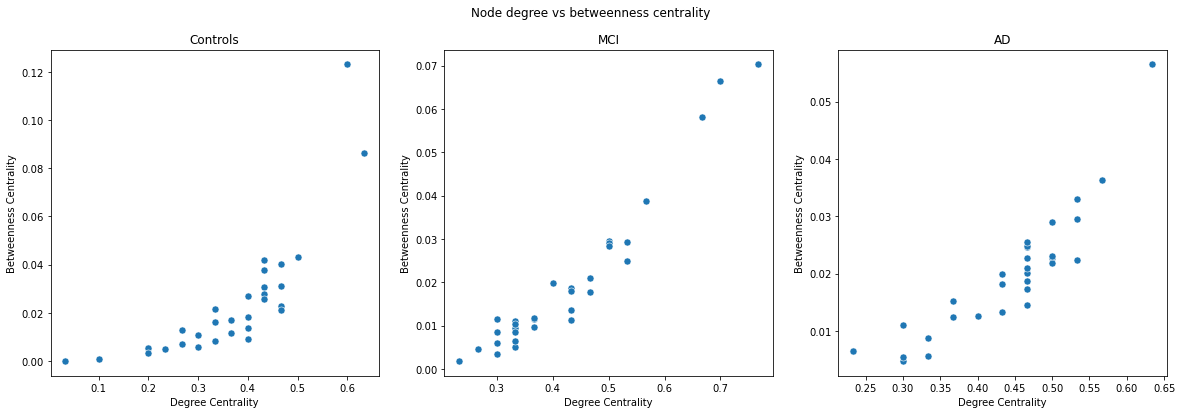

In [146]:
#Get centrality metrics table
MMSE_CN_centrality = centrality(MMSE_CN_graph, MMSE_columns)
MMSE_MCI_centrality = centrality(MMSE_MCI_graph, MMSE_columns)
MMSE_AD_centrality = centrality(MMSE_AD_graph, MMSE_columns)

#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))


sns.scatterplot(ax=axes[0],data=MMSE_CN_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[1],data=MMSE_MCI_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[2],data=MMSE_AD_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)

#labels
axes[0].set_ylabel("Betweenness Centrality")
axes[1].set_ylabel("Betweenness Centrality")
axes[2].set_ylabel("Betweenness Centrality")
axes[0].set_xlabel("Degree Centrality")
axes[1].set_xlabel("Degree Centrality")
axes[2].set_xlabel("Degree Centrality")

#add title
fig.suptitle('Node degree vs betweenness centrality')

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")


plt.show()

#### Average clustering coefficient

In [147]:
print("--------------------------------")
print("AVERAGE CLUSTERING COEFFICIENT")
print("--------------------------------")
print()
print("Controls: ", nx.average_clustering(MMSE_CN_graph,weight='weight'))
print()
print("MCI: ", nx.average_clustering(MMSE_MCI_graph,weight='weight'))
print()
print("AD: ", nx.average_clustering(MMSE_AD_graph,weight='weight'))

--------------------------------
AVERAGE CLUSTERING COEFFICIENT
--------------------------------

Controls:  0.009566610008547829

MCI:  0.014322577917242308

AD:  0.02129204169655286


#### Global efficiency

In [148]:
print("--------------------------------")
print("AVERAGE GLOBAL EFFICIENCY")
print("--------------------------------")
print()
print("Controls: ", nx.global_efficiency(MMSE_CN_graph))
print()
print("MCI: ", nx.global_efficiency(MMSE_MCI_graph))
print()
print("AD: ", nx.global_efficiency(MMSE_AD_graph))

--------------------------------
AVERAGE GLOBAL EFFICIENCY
--------------------------------

Controls:  0.6731182795698926

MCI:  0.7118279569892473

AD:  0.7172043010752688


#### Global metrics summary

In [514]:
MMSE_gm = global_metrics(MMSE_CN_graph, MMSE_MCI_graph, MMSE_AD_graph)
MMSE_gm.reset_index(inplace=True)
MMSE_gm

index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0    CN     31    168        3   0.36129  0.577043     0.352567  0.009567   
1   MCI     31    197        2  0.423656  0.664241     0.404028  0.014323   
2    AD     31    202        2  0.434409  0.953799     0.399061  0.021292   

       AvGE  
0  0.673118  
1  0.711828  
2  0.717204

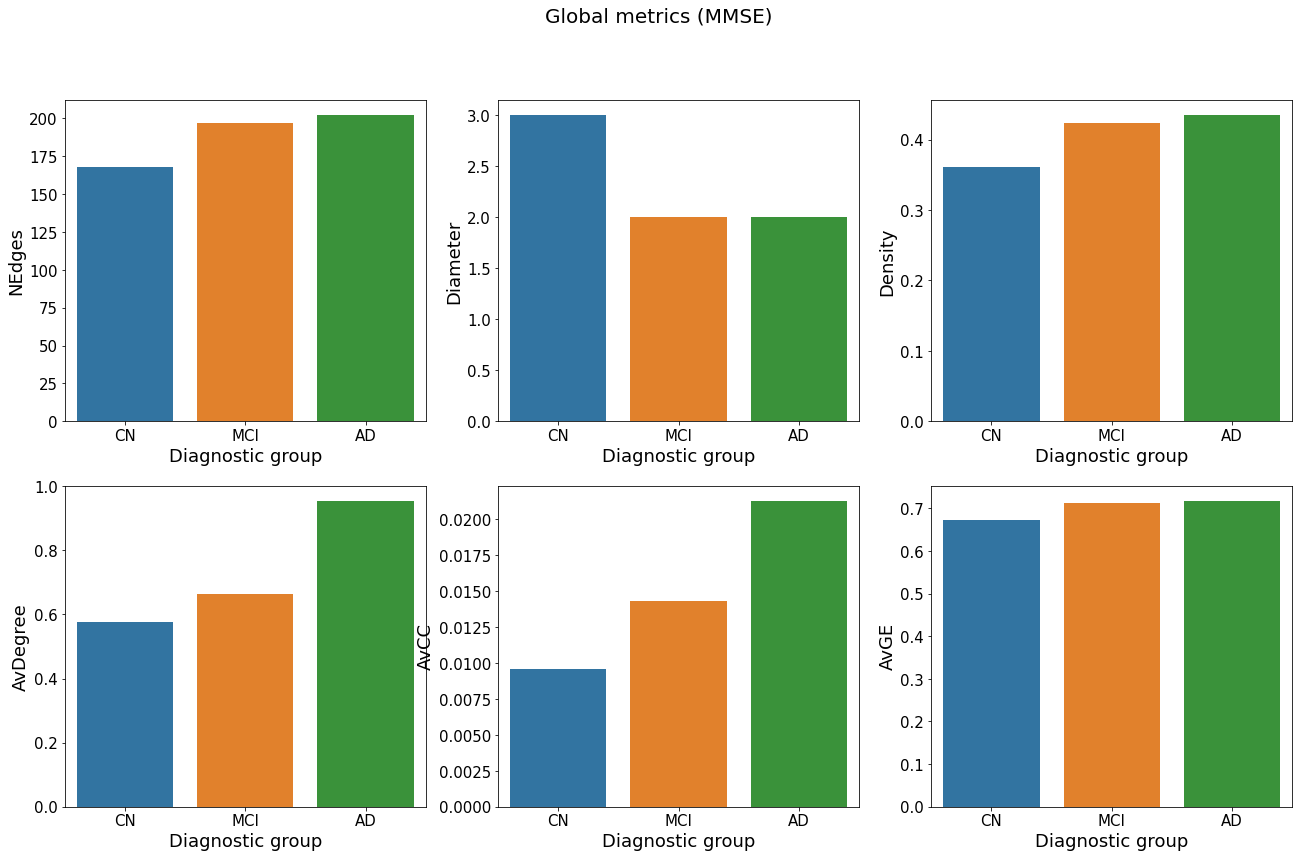

In [522]:
fig, ax = plt.subplots(2, 3, figsize=(22,13))

sns.barplot(ax=ax[0,0], x="index", y="NEdges", data=MMSE_gm) 
sns.barplot(ax=ax[0,1], x="index", y="Diameter", data=MMSE_gm)
sns.barplot(ax=ax[0,2], x="index", y="Density", data=MMSE_gm) 
sns.barplot(ax=ax[1,0], x="index", y="AvDegree", data=MMSE_gm) 
sns.barplot(ax=ax[1,1], x="index", y="AvCC", data=MMSE_gm)
sns.barplot(ax=ax[1,2], x="index", y="AvGE",  data=MMSE_gm)

fig.suptitle("Global metrics (MMSE)", fontsize=20)

rows, cols = 2, 3
for i in range(rows):
    for j in range(cols):
        ax[i, j].set_xlabel('Diagnostic group')

plt.show()

#### Modularity index (Louvain Algorithm)

In [233]:
import networkx.algorithms.community as nx_comm

MMSE_CN_partition = nx_comm.louvain_communities(MMSE_CN_graph, weight='weight',seed=0)
MMSE_MCI_partition = nx_comm.louvain_communities(MMSE_MCI_graph, weight='weight',seed=0)
MMSE_AD_partition = nx_comm.louvain_communities(MMSE_AD_graph, weight='weight',seed=0)

print("--------------------------------")
print("LOUVAIN COMMUNITIES")
print("--------------------------------")
print()
print("Controls: ", MMSE_CN_partition)
print()
print("MCI: ", MMSE_MCI_partition)
print()
print("AD: ", MMSE_AD_partition)

print()
print("--------------------------------")
print("MODULARITY INDEX")
print("--------------------------------")
print()
print("Controls: ", nx_comm.modularity(MMSE_CN_graph, MMSE_CN_partition, weight='weight'))
print()
print("MCI: ", nx_comm.modularity(MMSE_MCI_graph, MMSE_MCI_partition, weight='weight'))
print()
print("AD: ", nx_comm.modularity(MMSE_AD_graph, MMSE_AD_partition, weight='weight'))

--------------------------------
LOUVAIN COMMUNITIES
--------------------------------

Controls:  [{2, 5, 6, 22, 9, 10, 28}, {16, 17}, {18, 23, 11, 12, 13, 30}, {0, 1, 3, 7, 19, 20, 21, 24, 25, 26, 27}, {4, 8, 29, 14, 15}]

MCI:  [{0, 1, 2, 3, 4, 6, 8, 9, 27}, {10, 11, 12, 13}, {16, 17, 18, 28, 14, 15}, {19, 20, 5, 21, 7, 24, 25, 29}, {26, 30, 22, 23}]

AD:  [{6, 7, 8, 9, 28}, {10, 11, 12, 13}, {16, 17, 18, 23, 15}, {0, 1, 2, 3, 5, 19, 20, 21}, {4, 14, 22, 24, 25, 26, 27, 29, 30}]

--------------------------------
MODULARITY INDEX
--------------------------------

Controls:  0.3799483884269999

MCI:  0.43843417118221173

AD:  0.33747873231804304


#### Draw graph (color by communities)

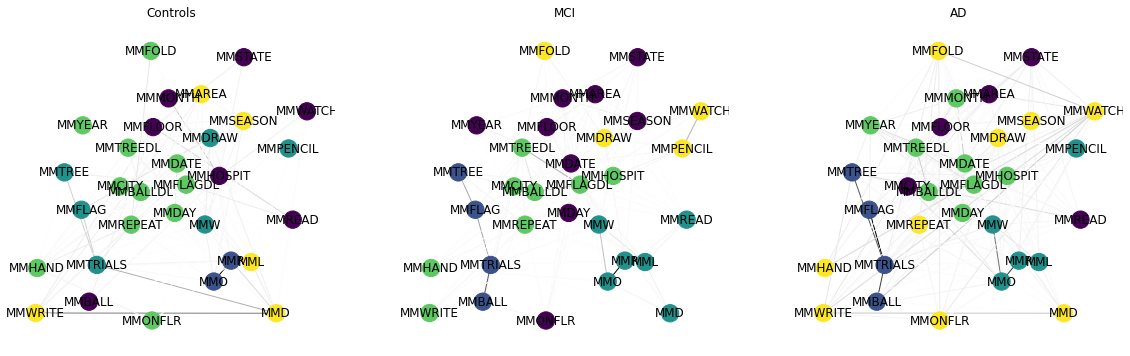

In [234]:
#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))

#Node Labels

test_labels = {} #create empty dictionary

for i in range(MMSE_CN_mx.shape[1]):
    test_labels[i] = MMSE_CN_mx.columns[i]

#get colors
MMSE_CN_colors = color_communities(MMSE_CN_graph, MMSE_CN_partition)
MMSE_MCI_colors = color_communities(MMSE_MCI_graph, MMSE_MCI_partition)
MMSE_AD_colors = color_communities(MMSE_AD_graph, MMSE_AD_partition)

#Plot

#fix position
pos=nx.spring_layout(MMSE_MCI_graph)

#get edges weights
edges_CN,weights_CN = zip(*nx.get_edge_attributes(MMSE_CN_graph,'weight').items())
edges_MCI,weights_MCI = zip(*nx.get_edge_attributes(MMSE_MCI_graph,'weight').items())
edges_AD,weights_AD = zip(*nx.get_edge_attributes(MMSE_AD_graph,'weight').items())

#draw graphs
nx.draw(ax=axes[0], G=MMSE_CN_graph, pos=pos, labels=test_labels, with_labels=True, node_color=MMSE_CN_colors,
       edge_color=weights_CN, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[1], G=MMSE_MCI_graph, pos=pos,  labels=test_labels, with_labels=True, node_color=MMSE_MCI_colors,
       edge_color=weights_MCI, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[2], G=MMSE_AD_graph, pos=pos, labels=test_labels, with_labels=True, node_color=MMSE_AD_colors,
       edge_color=weights_AD, edge_cmap=plt.cm.Greys)

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.show()

Community metrics for the controls group:

In [235]:
import warnings
warnings.filterwarnings('ignore')

display(community_metrics(MMSE_CN_graph, MMSE_CN_partition))

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0      7     11        2   0.52381  0.337584     0.206897    0.0032   
1     1      2      1        1       1.0   0.86789            0       0.0   
2     2      6      6        3       0.4  0.269044            0       0.0   
3     3     11     20        3  0.363636  0.250034      0.38961  0.110016   
4     4      5      7        2       0.7  0.403322     0.642857  0.091328   

       AvGE                                              Tests Language  \
0  0.761905  [Orientation to time , Orientation to place, O...     0.25   
1       1.0     [Spell WORLD backwards, Spell WORLD backwards]      0.0   
2  0.677778  [Registration-repeat 3 words, Registration-rep...    0.125   
3  0.660606  [Orientation to time , Orientation to time , O...      0.5   
4      0.85  [Orientation to time , Orientation to place, S...    0.125   

     Memory Concentration Orientation Visuospatial   
0  0.142857           0.0         0.4           0.0  
1       0.0           0.4         0.0           0.0  
2  0.428571           0.2         0.0           1.0  
3  0.428571           0.0         0.4           0.0  
4       0.0           0.4         0.2           0.0

MCI group:

In [236]:
community_metrics(MMSE_MCI_graph, MMSE_MCI_partition)

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0      9     22        2  0.611111  0.267001      0.59375  0.250777   
1     1      4      4        2  0.666667  0.700372          0.6  0.119732   
2     2      6      8        2  0.533333  0.754175            0       0.0   
3     3      8     19        2  0.678571  0.340883     0.534247  0.091128   
4     4      4      4        2  0.666667    0.2656          0.6  0.166368   

       AvGE                                              Tests Language  \
0  0.805556  [Orientation to time , Orientation to time , O...    0.125   
1  0.833333  [Registration-repeat 3 words, Registration-rep...      0.0   
2  0.766667  [Spell WORLD backwards, Spell WORLD backwards,...    0.125   
3  0.839286  [Orientation to place, Orientation to place, R...    0.375   
4  0.833333  [Comprehend instructions, Recognize and name c...    0.375   

     Memory Concentration Orientation Visuospatial   
0       0.0           0.0         0.8           0.0  
1  0.571429           0.0         0.0           0.0  
2       0.0           1.0         0.0           0.0  
3  0.428571           0.0         0.2           0.0  
4       0.0           0.0         0.0           1.0

AD group: 

In [237]:
community_metrics(MMSE_AD_graph, MMSE_AD_partition)

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0      5      8        2       0.8  0.195685     0.789474  0.258631   
1     1      4      3        2       0.5  1.012339            0       0.0   
2     2      5      6        2       0.6  0.655604     0.333333  0.071781   
3     3      8     19        2  0.678571    0.5119     0.608108  0.198652   
4     4      9     19        3  0.527778  0.425239     0.534247   0.16433   

       AvGE                                              Tests Language  \
0       0.9  [Orientation to place, Orientation to place, O...    0.125   
1      0.75  [Registration-repeat 3 words, Registration-rep...      0.0   
2       0.8  [Spell WORLD backwards, Spell WORLD backwards,...    0.125   
3  0.839286  [Orientation to time , Orientation to time , O...      0.0   
4  0.759259  [Orientation to time , Spell WORLD backwards, ...     0.75   

     Memory Concentration Orientation Visuospatial   
0       0.0           0.0         0.4           0.0  
1  0.571429           0.0         0.0           0.0  
2       0.0           0.8         0.0           0.0  
3  0.428571           0.0         0.5           0.0  
4       0.0           0.2         0.1           1.0

#### Representation of the domains in each community

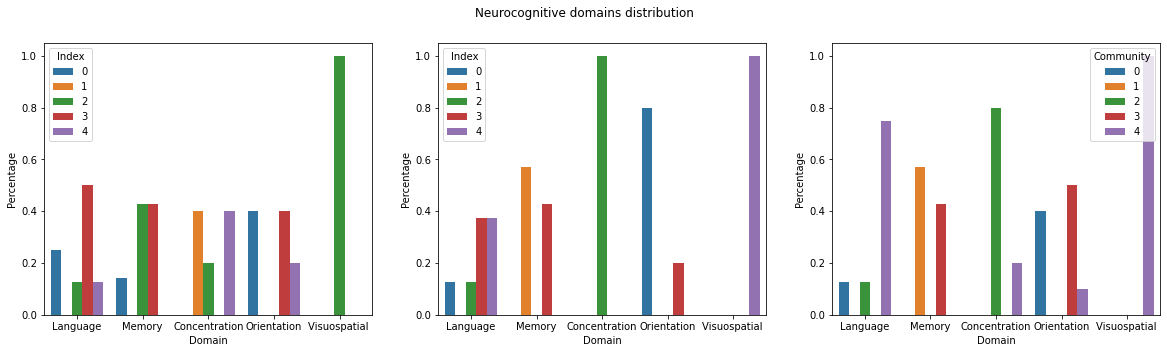

In [238]:
#Get data 
MMSE_CN_domains = community_metrics(MMSE_CN_graph, MMSE_CN_partition)[['Index','Language','Memory', 'Concentration',
                                                                      'Orientation', 'Visuospatial ']]
MMSE_MCI_domains = community_metrics(MMSE_MCI_graph, MMSE_MCI_partition)[['Index','Language','Memory', 'Concentration',
                                                                      'Orientation', 'Visuospatial ']]
MMSE_AD_domains = community_metrics(MMSE_AD_graph, MMSE_AD_partition)[['Index','Language','Memory', 'Concentration',
                                                                     'Orientation', 'Visuospatial ']]

#Reshape data with melt() function
MMSE_CN_domains = MMSE_CN_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
MMSE_MCI_domains = MMSE_MCI_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
MMSE_AD_domains = MMSE_AD_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')

#plot 
fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.barplot(ax=axes[0], x="Domain", y="Percentage", hue="Index", data=MMSE_CN_domains)
sns.barplot(ax=axes[1], x="Domain", y="Percentage", hue="Index", data=MMSE_MCI_domains)
sns.barplot(ax=axes[2], x="Domain", y="Percentage", hue="Index", data=MMSE_AD_domains)


#MMSE_CN_domains.plot(kind='bar',ax=axes[0], x="Domain", y="Per. of representation", hue="Index", stacked=True)

fig.suptitle("Neurocognitive domains distribution")
plt.legend(title='Community')

plt.show()

#send data to build stacked barplot in R
MMSE_CN_domains.to_csv('./Results/MMSE/Louvain_CN.csv', index=False) 
MMSE_MCI_domains.to_csv('./Results/MMSE/Louvain_MCI.csv', index=False) 
MMSE_AD_domains.to_csv('./Results/MMSE/Louvain_AD.csv', index=False) 

#### Modularity index (Greedy modularity algorithm)

This function uses **Clauset-Newman-Moore greedy modularity maximization** to find the community partition with the largest modularity.

Greedy modularity maximization begins with each node in its own community and repeatedly joins the pair of communities that lead to the largest modularity until no further increase in modularity is possible (a maximum).

In [227]:
import networkx.algorithms.community as nx_comm

MMSE_CN_partition = nx_comm.greedy_modularity_communities(MMSE_CN_graph, weight='weight')
MMSE_MCI_partition = nx_comm.greedy_modularity_communities(MMSE_MCI_graph, weight='weight')
MMSE_AD_partition = nx_comm.greedy_modularity_communities(MMSE_AD_graph, weight='weight')

print("--------------------------------")
print("GREEDY MODULARITY COMMUNITIES")
print("--------------------------------")
print()
print("Controls: ", MMSE_CN_partition)
print()
print("MCI: ", MMSE_MCI_partition)
print()
print("AD: ", MMSE_AD_partition)

print()
print("--------------------------------")
print("MODULARITY INDEX")
print("--------------------------------")
print()
print("Controls: ", nx_comm.modularity(MMSE_CN_graph, MMSE_CN_partition, weight='weight'))
print()
print("MCI: ", nx_comm.modularity(MMSE_MCI_graph, MMSE_MCI_partition, weight='weight'))
print()
print("AD: ", nx_comm.modularity(MMSE_AD_graph, MMSE_AD_partition, weight='weight'))

--------------------------------
GREEDY MODULARITY COMMUNITIES
--------------------------------

Controls:  [frozenset({0, 1, 3, 7, 19, 20, 21, 24, 25, 26, 27}), frozenset({2, 5, 22, 6, 9, 10, 28}), frozenset({18, 23, 11, 12, 13, 30}), frozenset({4, 8, 29, 14, 15}), frozenset({16, 17})]

MCI:  [frozenset({0, 1, 2, 3, 4, 6, 8, 9, 27}), frozenset({19, 20, 5, 21, 7, 24, 25, 29}), frozenset({16, 17, 18, 28, 14, 15}), frozenset({10, 11, 12, 13}), frozenset({26, 23, 30, 22})]

AD:  [frozenset({4, 14, 22, 24, 25, 26, 27, 29, 30}), frozenset({0, 1, 2, 3, 5, 19, 20, 21}), frozenset({16, 17, 18, 23, 15}), frozenset({6, 7, 8, 9, 28}), frozenset({10, 11, 12, 13})]

--------------------------------
MODULARITY INDEX
--------------------------------

Controls:  0.3799483884269999

MCI:  0.43843417118221173

AD:  0.33747873231804304


#### Draw graph displaying communities (Greedy modularity communities)

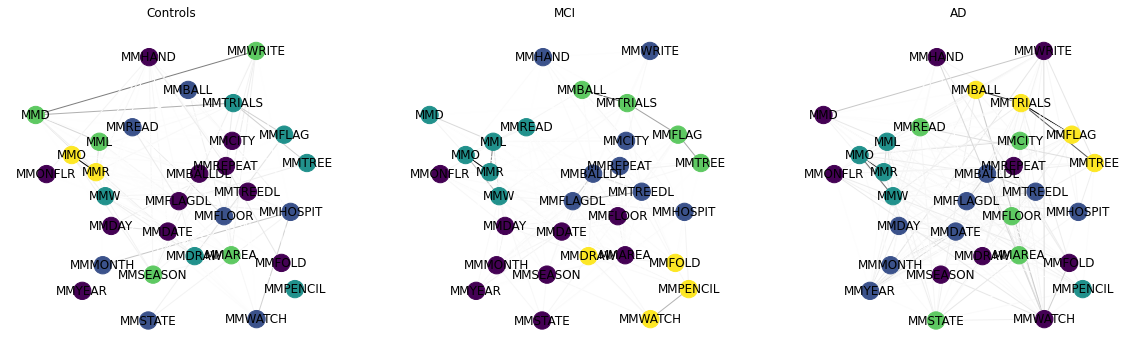

In [228]:
#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))

#Node Labels

test_labels = {} #create empty dictionary

for i in range(MMSE_CN_mx.shape[1]):
    test_labels[i] = MMSE_CN_mx.columns[i]

#get colors
MMSE_CN_colors = color_communities(MMSE_CN_graph, MMSE_CN_partition)
MMSE_MCI_colors = color_communities(MMSE_MCI_graph, MMSE_MCI_partition)
MMSE_AD_colors = color_communities(MMSE_AD_graph, MMSE_AD_partition)

#fix positions
pos=nx.spring_layout(MMSE_MCI_graph)

#get edges weights
edges_CN,weights_CN = zip(*nx.get_edge_attributes(MMSE_CN_graph,'weight').items())
edges_MCI,weights_MCI = zip(*nx.get_edge_attributes(MMSE_MCI_graph,'weight').items())
edges_AD,weights_AD = zip(*nx.get_edge_attributes(MMSE_AD_graph,'weight').items())

#draw graphs
nx.draw(ax=axes[0], G=MMSE_CN_graph, pos=pos, labels=test_labels, with_labels=True, node_color=MMSE_CN_colors,
       edge_color=weights_CN, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[1], G=MMSE_MCI_graph, pos=pos, labels=test_labels, with_labels=True, node_color=MMSE_MCI_colors,
       edge_color=weights_MCI, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[2], G=MMSE_AD_graph, pos=pos, labels=test_labels, with_labels=True, node_color=MMSE_AD_colors,
       edge_color=weights_AD, edge_cmap=plt.cm.Greys)

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.show()

Community metrics for the controls group:

In [229]:
import warnings
warnings.filterwarnings('ignore')

display(community_metrics(MMSE_CN_graph, MMSE_CN_partition))

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0     11     20        3  0.363636  0.250034      0.38961  0.110016   
1     1      7     11        2   0.52381  0.337584     0.206897    0.0032   
2     2      6      6        3       0.4  0.269044            0       0.0   
3     3      5      7        2       0.7  0.403322     0.642857  0.091328   
4     4      2      1        1       1.0   0.86789            0       0.0   

       AvGE                                              Tests Language  \
0  0.660606  [Orientation to time , Orientation to time , O...      0.5   
1  0.761905  [Orientation to time , Orientation to place, O...     0.25   
2  0.677778  [Registration-repeat 3 words, Registration-rep...    0.125   
3      0.85  [Orientation to time , Orientation to place, S...    0.125   
4       1.0     [Spell WORLD backwards, Spell WORLD backwards]      0.0   

     Memory Concentration Orientation Visuospatial   
0  0.428571           0.0         0.4           0.0  
1  0.142857           0.0         0.4           0.0  
2  0.428571           0.2         0.0           1.0  
3       0.0           0.4         0.2           0.0  
4       0.0           0.4         0.0           0.0

MCI group:

In [230]:
community_metrics(MMSE_MCI_graph, MMSE_MCI_partition)

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0      9     22        2  0.611111  0.267001      0.59375  0.250777   
1     1      8     19        2  0.678571  0.340883     0.534247  0.091128   
2     2      6      8        2  0.533333  0.754175            0       0.0   
3     3      4      4        2  0.666667  0.700372          0.6  0.119732   
4     4      4      4        2  0.666667    0.2656          0.6  0.166368   

       AvGE                                              Tests Language  \
0  0.805556  [Orientation to time , Orientation to time , O...    0.125   
1  0.839286  [Orientation to place, Orientation to place, R...    0.375   
2  0.766667  [Spell WORLD backwards, Spell WORLD backwards,...    0.125   
3  0.833333  [Registration-repeat 3 words, Registration-rep...      0.0   
4  0.833333  [Comprehend instructions, Recognize and name c...    0.375   

     Memory Concentration Orientation Visuospatial   
0       0.0           0.0         0.8           0.0  
1  0.428571           0.0         0.2           0.0  
2       0.0           1.0         0.0           0.0  
3  0.571429           0.0         0.0           0.0  
4       0.0           0.0         0.0           1.0

AD group: 

In [231]:
community_metrics(MMSE_AD_graph, MMSE_AD_partition)

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0      9     19        3  0.527778  0.425239     0.534247   0.16433   
1     1      8     19        2  0.678571    0.5119     0.608108  0.198652   
2     2      5      6        2       0.6  0.655604     0.333333  0.071781   
3     3      5      8        2       0.8  0.195685     0.789474  0.258631   
4     4      4      3        2       0.5  1.012339            0       0.0   

       AvGE                                              Tests Language  \
0  0.759259  [Orientation to time , Spell WORLD backwards, ...     0.75   
1  0.839286  [Orientation to time , Orientation to time , O...      0.0   
2       0.8  [Spell WORLD backwards, Spell WORLD backwards,...    0.125   
3       0.9  [Orientation to place, Orientation to place, O...    0.125   
4      0.75  [Registration-repeat 3 words, Registration-rep...      0.0   

     Memory Concentration Orientation Visuospatial   
0       0.0           0.2         0.1           1.0  
1  0.428571           0.0         0.5           0.0  
2       0.0           0.8         0.0           0.0  
3       0.0           0.0         0.4           0.0  
4  0.571429           0.0         0.0           0.0

#### Representation of the domains in each community

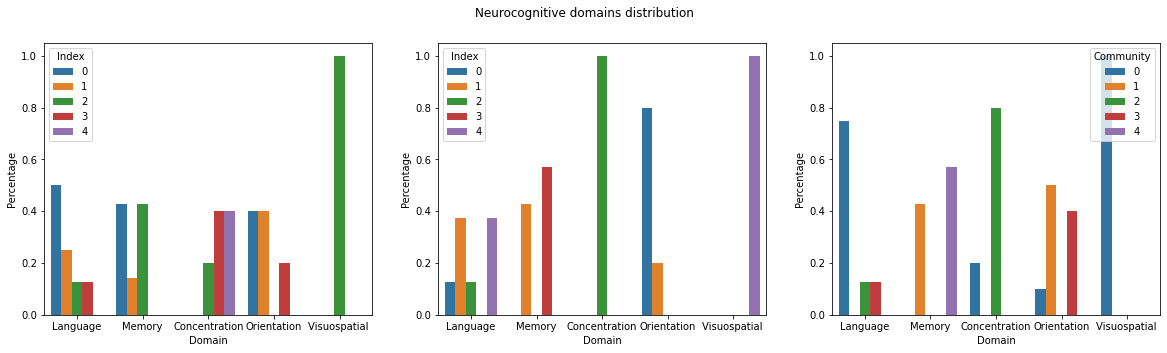

In [232]:
#Get data 
MMSE_CN_domains = community_metrics(MMSE_CN_graph, MMSE_CN_partition)[['Index','Language','Memory', 'Concentration',
                                                                     'Orientation', 'Visuospatial ']]
MMSE_MCI_domains = community_metrics(MMSE_MCI_graph, MMSE_MCI_partition)[['Index','Language','Memory', 'Concentration',
                                                                     'Orientation', 'Visuospatial ']]
MMSE_AD_domains = community_metrics(MMSE_AD_graph, MMSE_AD_partition)[['Index','Language','Memory', 'Concentration',
                                                                     'Orientation', 'Visuospatial ']]

#Reshape data with melt() function
MMSE_CN_domains = MMSE_CN_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
MMSE_MCI_domains = MMSE_MCI_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
MMSE_AD_domains = MMSE_AD_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')

#plot 
fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.barplot(ax=axes[0], x="Domain", y="Percentage", hue="Index", data=MMSE_CN_domains)
sns.barplot(ax=axes[1], x="Domain", y="Percentage", hue="Index", data=MMSE_MCI_domains)
sns.barplot(ax=axes[2], x="Domain", y="Percentage", hue="Index", data=MMSE_AD_domains)


#MMSE_CN_domains.plot(kind='bar',ax=axes[0], x="Domain", y="Per. of representation", hue="Index", stacked=True)

fig.suptitle("Neurocognitive domains distribution")
plt.legend(title='Community')

plt.show()

#send data to build stacked barplot in R
MMSE_CN_domains.to_csv('./Results/MMSE/Greedy_CN.csv', index=False) 
MMSE_MCI_domains.to_csv('./Results/MMSE/Greedy_MCI.csv', index=False) 
MMSE_AD_domains.to_csv('./Results/MMSE/Greedy_AD.csv', index=False) 

### MOCA

#### Divide data by diagnostic group

In [385]:
#Get indexes of subjects belonging to each group
MOCA_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_MOCA = Y_MOCA.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    MOCA_indexes[dx] = Y_MOCA.index[Y_MOCA['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_MOCA_CN = X_MOCA.iloc[MOCA_indexes["CN"]]
X_MOCA_MCI = X_MOCA.iloc[MOCA_indexes["MCI"]]
X_MOCA_AD = X_MOCA.iloc[MOCA_indexes["AD"]]

print("Number of instances CN: ", X_MOCA_CN.shape[0])
print("Number of instances MCI: ", X_MOCA_MCI.shape[0])
print("Number of instances AD: ", X_MOCA_AD.shape[0])

Number of instances CN:  645
Number of instances MCI:  684
Number of instances AD:  212


#### Plot z-scores by cognitive domain

1. Compute averages of each test
2. Group by NC domain
3. Compute the average of each domain

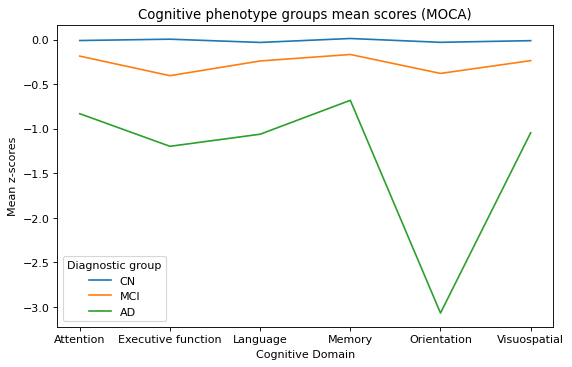

In [475]:
metadata_path = "./Tests/MOCA_Metadata.csv"
#Compute zscores means for each cognitive domain by diagnostic group
MOCA_means_CN = zscores_means(X_MOCA_CN, "CN", metadata_path)
MOCA_means_MCI = zscores_means(X_MOCA_MCI, "MCI", metadata_path)
MOCA_means_AD = zscores_means(X_MOCA_AD, "AD", metadata_path)

#Concanetate all dataframes
MOCA_means_df = pd.concat([MOCA_means_CN, MOCA_means_MCI, MOCA_means_AD])
MOCA_means_df.index = range(len(MOCA_means_df))

#plot dataframe
plt.figure(figsize=(8, 5), dpi=80)
sns.lineplot(data=MOCA_means_df, x='Cognitive Domain', y='Mean', hue='Diagnostic')
plt.title("Cognitive phenotype groups mean scores (MOCA)")
plt.ylabel("Mean z-scores")
plt.legend(title="Diagnostic group")
plt.show()

#### Compute adjacency matrixes

In [386]:
MOCA_CN_mx = par_corr(X_MOCA_CN)
MOCA_MCI_mx = par_corr(X_MOCA_MCI)
MOCA_AD_mx = par_corr(X_MOCA_AD)

#### Plot adjacency matrixes

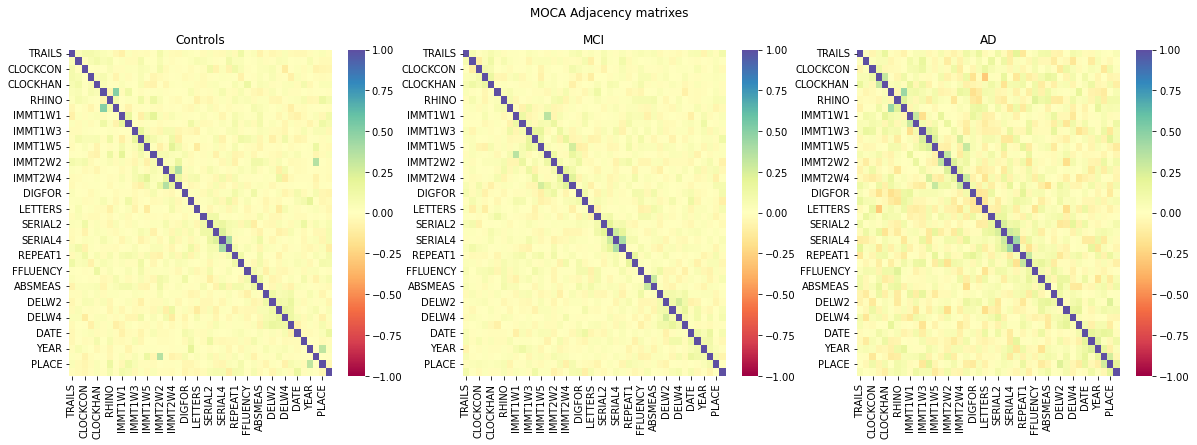

In [387]:
fig, axes = plt.subplots(1,3, figsize=(20,6))


fig.suptitle('MOCA Adjacency matrixes')

sns.heatmap(ax=axes[0],data=MOCA_CN_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[1],data=MOCA_MCI_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[2],data=MOCA_AD_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.show()

#### Compute graph

In [388]:
#Remove diagonal elements and negative correlations from the matrix

for i in range(MOCA_MCI_mx.shape[1]):
    colname = MOCA_MCI_mx.columns[i]
    MOCA_CN_mx[colname] = np.where((MOCA_CN_mx[colname]< 0) | (MOCA_CN_mx[colname]==1.0),0, MOCA_CN_mx[colname]) 
    MOCA_MCI_mx[colname] = np.where((MOCA_MCI_mx[colname]< 0) | (MOCA_MCI_mx[colname]==1.0),0, MOCA_MCI_mx[colname]) 
    MOCA_AD_mx[colname] = np.where((MOCA_AD_mx[colname]< 0) | (MOCA_AD_mx[colname]==1.0),0, MOCA_AD_mx[colname]) 

In [389]:
import networkx as nx

#convert adjacency matrix into graph
MOCA_CN_graph = nx.from_numpy_array(MOCA_CN_mx.to_numpy())
MOCA_MCI_graph = nx.from_numpy_array(MOCA_MCI_mx.to_numpy())
MOCA_AD_graph = nx.from_numpy_array(MOCA_AD_mx.to_numpy())

In [390]:
#count nodes and edges
print("CN-------------------------")
print("- Number of nodes: ", MOCA_CN_graph.number_of_nodes())
print("- Number of edges: ", MOCA_CN_graph.number_of_edges())
print()
print("MCI-------------------------")
print("- Number of nodes: ", MOCA_MCI_graph.number_of_nodes())
print("- Number of edges: ", MOCA_MCI_graph.number_of_edges())
print()
print("AD-------------------------")
print("- Number of nodes: ", MOCA_AD_graph.number_of_nodes())
print("- Number of edges: ", MOCA_AD_graph.number_of_edges())

CN-------------------------
- Number of nodes:  42
- Number of edges:  441

MCI-------------------------
- Number of nodes:  42
- Number of edges:  501

AD-------------------------
- Number of nodes:  42
- Number of edges:  477


#### Add node attributes

As the nodes represent different tests they are going to have the following attributes:

- ADNI column: name of the test in the ADNI database
- Test description
- Cognitive domain

In [391]:
#Import node metadata
MOCA_metadata = pd.read_csv("./Tests/MOCA_Metadata.csv", sep=";", 
                            usecols = ['Node', 'ADNI column', 'Test', 'Cognitive Domain'])

graphs = [MOCA_CN_graph, MOCA_MCI_graph, MOCA_AD_graph]

for graph in graphs:
    #ADNI column
    nx.set_node_attributes(graph, dict(zip(MOCA_metadata.Node, MOCA_metadata['ADNI column'])), name="ADNIColumn")
    #Test
    nx.set_node_attributes(graph, dict(zip(MOCA_metadata.Node, MOCA_metadata['Test'])), name="Test")
    #Cognitive domain
    nx.set_node_attributes(graph, dict(zip(MOCA_metadata.Node, MOCA_metadata['Cognitive Domain'])), name="Domain")

#### Draw graph

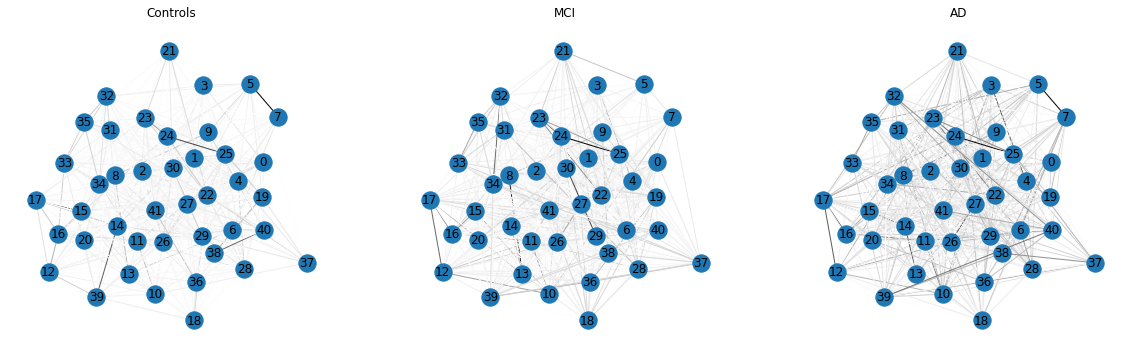

In [392]:
#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))

#fix position
pos=nx.spring_layout(MOCA_CN_graph)

#get edges weights
edges_CN,weights_CN = zip(*nx.get_edge_attributes(MOCA_CN_graph,'weight').items())
edges_MCI,weights_MCI = zip(*nx.get_edge_attributes(MOCA_MCI_graph,'weight').items())
edges_AD,weights_AD = zip(*nx.get_edge_attributes(MOCA_AD_graph,'weight').items())

#draw graphs
nx.draw(ax=axes[0], G=MOCA_CN_graph, pos=pos, with_labels=True,
       edge_color=weights_CN, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[1], G=MOCA_MCI_graph, pos=pos, with_labels=True,
       edge_color=weights_MCI, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[2], G=MOCA_AD_graph, pos=pos, with_labels=True,
       edge_color=weights_AD, edge_cmap=plt.cm.Greys)

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.show()

#### Edges weights

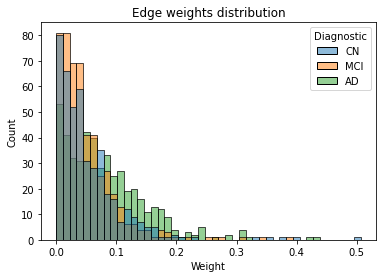

In [393]:
#Create dataframe with weights
weights_df_CN = pd.DataFrame(weights_CN, columns=["Weight"])
weights_df_CN['Diagnostic'] = "CN"
weights_df_MCI = pd.DataFrame(weights_MCI, columns=["Weight"])
weights_df_MCI['Diagnostic'] = "MCI"
weights_df_AD = pd.DataFrame(weights_AD, columns=["Weight"])
weights_df_AD['Diagnostic'] = "AD"

#merge all
weights_df = pd.concat([weights_df_CN, weights_df_MCI, weights_df_AD], ignore_index=True)

#plot histogram
sns.histplot(data=weights_df, x="Weight", hue="Diagnostic")
plt.title("Edge weights distribution")
plt.show()

#### Node centrality

In [168]:
#Node degree

print("---------------------")
print("DEGREE CENTRALITY")
print("---------------------")
print()
print("Controls: ", nx.degree_centrality(MOCA_CN_graph))
print()
print("MCI: ", nx.degree_centrality(MOCA_MCI_graph))
print()
print("AD: ", nx.degree_centrality(MOCA_AD_graph))

---------------------
DEGREE CENTRALITY
---------------------

Controls:  {0: 0.4634146341463415, 1: 0.6829268292682927, 2: 0.5121951219512195, 3: 0.4878048780487805, 4: 0.6585365853658537, 5: 0.41463414634146345, 6: 0.6097560975609756, 7: 0.3170731707317073, 8: 0.6097560975609756, 9: 0.4878048780487805, 10: 0.5365853658536586, 11: 0.5121951219512195, 12: 0.43902439024390244, 13: 0.5609756097560976, 14: 0.5365853658536586, 15: 0.4878048780487805, 16: 0.4634146341463415, 17: 0.4878048780487805, 18: 0.5121951219512195, 19: 0.5365853658536586, 20: 0.4878048780487805, 21: 0.36585365853658536, 22: 0.6097560975609756, 23: 0.5121951219512195, 24: 0.5365853658536586, 25: 0.5365853658536586, 26: 0.6585365853658537, 27: 0.6829268292682927, 28: 0.5853658536585367, 29: 0.5365853658536586, 30: 0.5853658536585367, 31: 0.5609756097560976, 32: 0.4878048780487805, 33: 0.41463414634146345, 34: 0.5609756097560976, 35: 0.4878048780487805, 36: 0.4878048780487805, 37: 0.29268292682926833, 38: 0.585365853658

There are 2 hubs in the controls (1, 27), 1 in the MCI group (22) and 2 in the AD group (17 and 21). 

#### Other centrality measures

In [169]:
print("Controls----------------------------------")
display(centrality(MOCA_CN_graph, MOCA_columns))
print("MCI----------------------------------")
display(centrality(MOCA_MCI_graph, MOCA_columns))
print("AD----------------------------------")
display(centrality(MOCA_AD_graph, MOCA_columns))

Controls----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
TRAILS             0.463415              0.650794                0.141142   
CUBE               0.682927              0.759259                0.203010   
CLOCKCON           0.512195              0.672131                0.156501   
CLOCKNO            0.487805              0.661290                0.149324   
CLOCKHAN           0.658537              0.745455                0.195954   
LION               0.414634              0.630769                0.120873   
RHINO              0.609756              0.719298                0.180211   
CAMEL              0.317073              0.594203                0.094470   
IMMT1W1            0.609756              0.719298                0.181689   
IMMT1W2            0.487805              0.661290                0.143624   
IMMT1W3            0.536585              0.683333                0.154521   
IMMT1W4            0.512195              0.672131                0.152933   
IMMT1W5            0.439024              0.640625                0.128489   
IMMT2W1            0.560976              0.694915                0.166164   
IMMT2W2            0.536585              0.683333                0.160629   
IMMT2W3            0.487805              0.661290                0.151068   
IMMT2W4            0.463415              0.650794                0.139552   
IMMT2W5            0.487805              0.661290                0.142407   
DIGFOR             0.512195              0.672131                0.157648   
DIGBACK            0.536585              0.683333                0.159633   
LETTERS            0.487805              0.661290                0.144097   
SERIAL1            0.365854              0.611940                0.113094   
SERIAL2            0.609756              0.719298                0.174276   
SERIAL3            0.512195              0.672131                0.152127   
SERIAL4            0.536585              0.683333                0.153019   
SERIAL5            0.536585              0.683333                0.159780   
REPEAT1            0.658537              0.745455                0.198055   
REPEAT2            0.682927              0.759259                0.197680   
FFLUENCY           0.585366              0.706897                0.175960   
ABSTRAN            0.536585              0.683333                0.155861   
ABSMEAS            0.585366              0.706897                0.174009   
DELW1              0.560976              0.694915                0.158293   
DELW2              0.487805              0.661290                0.139582   
DELW3              0.414634              0.630769                0.119370   
DELW4              0.560976              0.694915                0.168679   
DELW5              0.487805              0.661290                0.147378   
DATE               0.487805              0.661290                0.151312   
MONTH              0.292683              0.585714                0.090300   
YEAR               0.585366              0.706897                0.167606   
DAY                0.365854              0.611940                0.107897   
PLACE              0.439024              0.640625                0.131704   
CITY               0.414634              0.630769                0.130340   

          Betweenness_Centrality  
TRAILS                  0.007974  
CUBE                    0.020578  
CLOCKCON                0.010308  
CLOCKNO                 0.008996  
CLOCKHAN                0.019024  
LION                    0.009619  
RHINO                   0.018244  
CAMEL                   0.004562  
IMMT1W1                 0.016109  
IMMT1W2                 0.011218  
IMMT1W3                 0.014748  
IMMT1W4                 0.010906  
IMMT1W5                 0.010175  
IMMT2W1                 0.013777  
IMMT2W2                 0.011767  
IMMT2W3                 0.008469  
IMMT2W4                 0.008616  
IMMT2W5                 0.011330  
DIGFOR                  0.009824 

MCI----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
TRAILS             0.658537              0.745455                0.176104   
CUBE               0.609756              0.719298                0.159324   
CLOCKCON           0.560976              0.694915                0.145815   
CLOCKNO            0.585366              0.706897                0.151589   
CLOCKHAN           0.585366              0.706897                0.155789   
LION               0.463415              0.650794                0.122891   
RHINO              0.634146              0.732143                0.163295   
CAMEL              0.463415              0.650794                0.125278   
IMMT1W1            0.609756              0.719298                0.162156   
IMMT1W2            0.634146              0.732143                0.170710   
IMMT1W3            0.634146              0.732143                0.166342   
IMMT1W4            0.560976              0.694915                0.150617   
IMMT1W5            0.585366              0.706897                0.157063   
IMMT2W1            0.560976              0.694915                0.145299   
IMMT2W2            0.585366              0.706897                0.155997   
IMMT2W3            0.536585              0.683333                0.142659   
IMMT2W4            0.634146              0.732143                0.170557   
IMMT2W5            0.585366              0.706897                0.153311   
DIGFOR             0.512195              0.672131                0.136970   
DIGBACK            0.585366              0.706897                0.154630   
LETTERS            0.634146              0.732143                0.165857   
SERIAL1            0.487805              0.661290                0.131038   
SERIAL2            0.682927              0.759259                0.179933   
SERIAL3            0.585366              0.706897                0.151837   
SERIAL4            0.609756              0.719298                0.159963   
SERIAL5            0.585366              0.706897                0.154571   
REPEAT1            0.585366              0.706897                0.152918   
REPEAT2            0.634146              0.732143                0.168500   
FFLUENCY           0.658537              0.745455                0.176788   
ABSTRAN            0.585366              0.706897                0.157185   
ABSMEAS            0.658537              0.745455                0.175291   
DELW1              0.560976              0.694915                0.147852   
DELW2              0.512195              0.672131                0.128701   
DELW3              0.536585              0.683333                0.138209   
DELW4              0.536585              0.683333                0.140182   
DELW5              0.487805              0.661290                0.126786   
DATE               0.658537              0.745455                0.171985   
MONTH              0.634146              0.732143                0.167402   
YEAR               0.487805              0.661290                0.131157   
DAY                0.658537              0.745455                0.170901   
PLACE              0.536585              0.683333                0.142367   
CITY               0.536585              0.683333                0.143248   

          Betweenness_Centrality  
TRAILS                  0.012334  
CUBE                    0.011737  
CLOCKCON                0.010031  
CLOCKNO                 0.011923  
CLOCKHAN                0.009686  
LION                    0.006714  
RHINO                   0.014118  
CAMEL                   0.006038  
IMMT1W1                 0.010946  
IMMT1W2                 0.010785  
IMMT1W3                 0.013091  
IMMT1W4                 0.008744  
IMMT1W5                 0.009830  
IMMT2W1                 0.010706  
IMMT2W2                 0.010050  
IMMT2W3                 0.008453  
IMMT2W4                 0.011175  
IMMT2W5                 0.010840  
DIGFOR                  0.007615 

AD----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
TRAILS             0.560976              0.694915                0.155298   
CUBE               0.512195              0.672131                0.141675   
CLOCKCON           0.609756              0.719298                0.165456   
CLOCKNO            0.560976              0.694915                0.156046   
CLOCKHAN           0.585366              0.706897                0.156967   
LION               0.536585              0.683333                0.148852   
RHINO              0.536585              0.683333                0.149809   
CAMEL              0.634146              0.732143                0.172253   
IMMT1W1            0.560976              0.694915                0.155197   
IMMT1W2            0.487805              0.661290                0.134423   
IMMT1W3            0.536585              0.683333                0.148186   
IMMT1W4            0.585366              0.706897                0.161599   
IMMT1W5            0.512195              0.672131                0.144345   
IMMT2W1            0.536585              0.683333                0.151789   
IMMT2W2            0.585366              0.706897                0.163625   
IMMT2W3            0.585366              0.706897                0.161958   
IMMT2W4            0.439024              0.640625                0.124687   
IMMT2W5            0.634146              0.732143                0.173433   
DIGFOR             0.585366              0.706897                0.165900   
DIGBACK            0.512195              0.672131                0.144900   
LETTERS            0.439024              0.640625                0.124580   
SERIAL1            0.634146              0.732143                0.176966   
SERIAL2            0.512195              0.672131                0.145725   
SERIAL3            0.512195              0.672131                0.139285   
SERIAL4            0.609756              0.719298                0.168956   
SERIAL5            0.560976              0.694915                0.153734   
REPEAT1            0.560976              0.694915                0.154855   
REPEAT2            0.560976              0.694915                0.154068   
FFLUENCY           0.536585              0.683333                0.149028   
ABSTRAN            0.609756              0.719298                0.170505   
ABSMEAS            0.585366              0.706897                0.161905   
DELW1              0.560976              0.694915                0.155105   
DELW2              0.609756              0.719298                0.168789   
DELW3              0.560976              0.694915                0.158071   
DELW4              0.585366              0.706897                0.160331   
DELW5              0.560976              0.694915                0.157629   
DATE               0.560976              0.694915                0.153762   
MONTH              0.365854              0.611940                0.103405   
YEAR               0.585366              0.706897                0.161364   
DAY                0.560976              0.694915                0.154186   
PLACE              0.487805              0.661290                0.136012   
CITY               0.609756              0.719298                0.168301   

          Betweenness_Centrality  
TRAILS                  0.011492  
CUBE                    0.008808  
CLOCKCON                0.014563  
CLOCKNO                 0.011629  
CLOCKHAN                0.014637  
LION                    0.010091  
RHINO                   0.010259  
CAMEL                   0.016204  
IMMT1W1                 0.011072  
IMMT1W2                 0.008350  
IMMT1W3                 0.010700  
IMMT1W4                 0.012543  
IMMT1W5                 0.008709  
IMMT2W1                 0.009008  
IMMT2W2                 0.011753  
IMMT2W3                 0.012379  
IMMT2W4                 0.005832  
IMMT2W5                 0.015982  
DIGFOR                  0.010449 

#### Relation between node degree and betweenness centrality

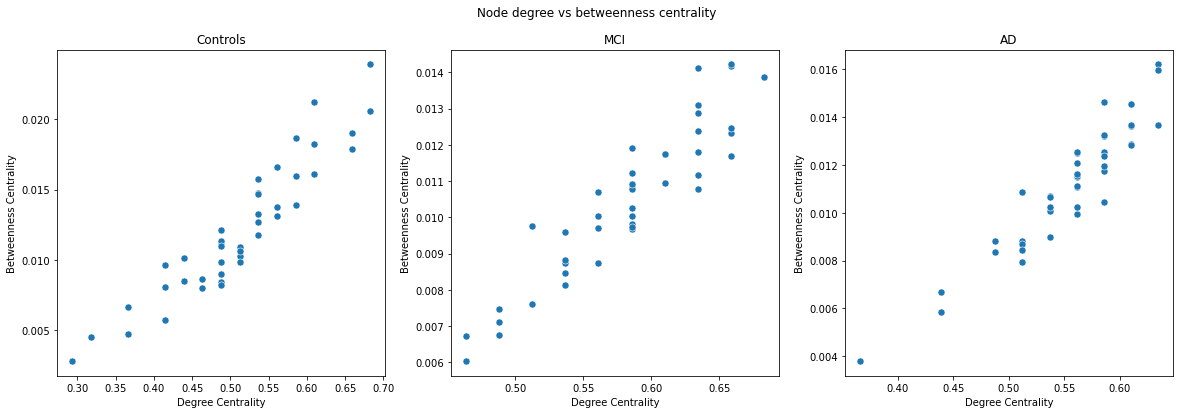

In [170]:
#Get centrality metrics table
MOCA_CN_centrality = centrality(MOCA_CN_graph, MOCA_columns)
MOCA_MCI_centrality = centrality(MOCA_MCI_graph, MOCA_columns)
MOCA_AD_centrality = centrality(MOCA_AD_graph, MOCA_columns)

#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))


sns.scatterplot(ax=axes[0],data=MOCA_CN_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[1],data=MOCA_MCI_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[2],data=MOCA_AD_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)

#labels
axes[0].set_ylabel("Betweenness Centrality")
axes[1].set_ylabel("Betweenness Centrality")
axes[2].set_ylabel("Betweenness Centrality")
axes[0].set_xlabel("Degree Centrality")
axes[1].set_xlabel("Degree Centrality")
axes[2].set_xlabel("Degree Centrality")

#add title
fig.suptitle('Node degree vs betweenness centrality')

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")


plt.show()

#### Average clustering coefficient 

In [171]:
print("--------------------------------")
print("AVERAGE CLUSTERING COEFFICIENT")
print("--------------------------------")
print()
print("Controls: ", nx.average_clustering(MOCA_CN_graph,weight='weight'))
print()
print("MCI: ", nx.average_clustering(MOCA_MCI_graph,weight='weight'))
print()
print("AD: ", nx.average_clustering(MOCA_AD_graph,weight='weight'))

--------------------------------
AVERAGE CLUSTERING COEFFICIENT
--------------------------------

Controls:  0.0377794541509782

MCI:  0.050595210902288454

AD:  0.06818436064682183


#### Global efficiency

In [172]:
print("--------------------------------")
print("AVERAGE GLOBAL EFFICIENCY")
print("--------------------------------")
print()
print("Controls: ", nx.global_efficiency(MOCA_CN_graph))
print()
print("MCI: ", nx.global_efficiency(MOCA_MCI_graph))
print()
print("AD: ", nx.global_efficiency(MOCA_AD_graph))

--------------------------------
AVERAGE GLOBAL EFFICIENCY
--------------------------------

Controls:  0.7560975609756098

MCI:  0.7909407665505227

AD:  0.7770034843205574


#### Global metrics summary

In [517]:
MOCA_gm = global_metrics(MOCA_CN_graph, MOCA_MCI_graph, MOCA_AD_graph)
MOCA_gm.reset_index(inplace=True)
MOCA_gm

index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0    CN     42    441        2  0.512195  1.110233     0.502033  0.037779   
1   MCI     42    501        2  0.581882  1.167575     0.555027  0.050595   
2    AD     42    477        2  0.554007  1.855053     0.507838  0.068184   

       AvGE  
0  0.756098  
1  0.790941  
2  0.777003

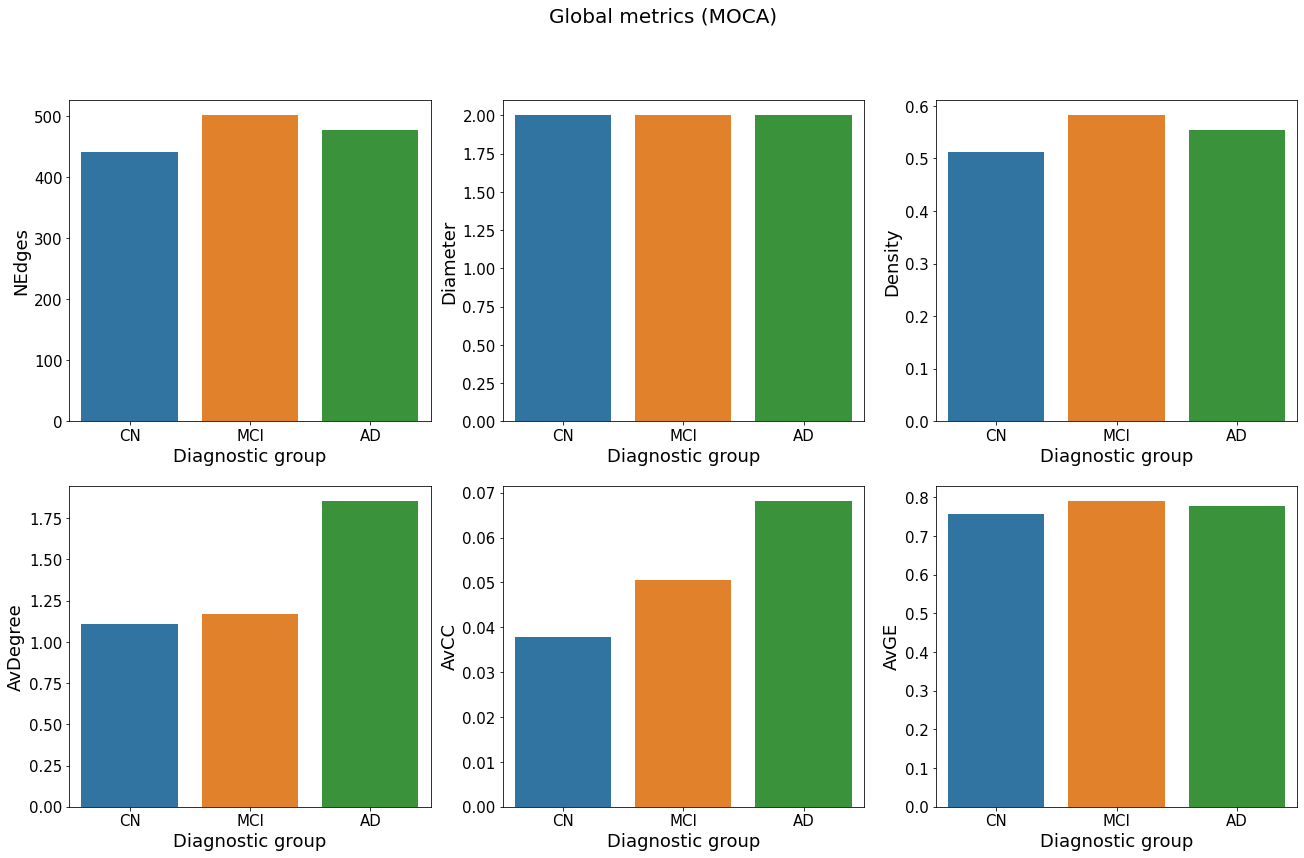

In [523]:
fig, ax = plt.subplots(2, 3, figsize=(22,13))

sns.barplot(ax=ax[0,0], x="index", y="NEdges", data=MOCA_gm) 
sns.barplot(ax=ax[0,1], x="index", y="Diameter", data=MOCA_gm)
sns.barplot(ax=ax[0,2], x="index", y="Density", data=MOCA_gm) 
sns.barplot(ax=ax[1,0], x="index", y="AvDegree", data=MOCA_gm) 
sns.barplot(ax=ax[1,1], x="index", y="AvCC", data=MOCA_gm)
sns.barplot(ax=ax[1,2], x="index", y="AvGE",  data=MOCA_gm)

fig.suptitle("Global metrics (MOCA)", fontsize=20)

rows, cols = 2, 3
for i in range(rows):
    for j in range(cols):
        ax[i, j].set_xlabel('Diagnostic group')
    
plt.show()

#### Modularity Index (Louvain Algorithm)

In [270]:
import networkx.algorithms.community as nx_comm

MOCA_CN_partition = nx_comm.louvain_communities(MOCA_CN_graph, weight='weight',seed=0)
MOCA_MCI_partition = nx_comm.louvain_communities(MOCA_MCI_graph, weight='weight',seed=0)
MOCA_AD_partition = nx_comm.louvain_communities(MOCA_AD_graph, weight='weight',seed=0)

print("--------------------------------")
print("LOUVAIN COMMUNITIES")
print("--------------------------------")
print()
print("Controls: ", MOCA_CN_partition)
print()
print("MCI: ", MOCA_MCI_partition)
print()
print("AD: ", MOCA_AD_partition)

print()
print("--------------------------------")
print("MODULARITY INDEX")
print("--------------------------------")
print()
print("Controls: ", nx_comm.modularity(MOCA_CN_graph, MOCA_CN_partition, weight='weight'))
print()
print("MCI: ", nx_comm.modularity(MOCA_MCI_graph, MOCA_MCI_partition, weight='weight'))
print()
print("AD: ", nx_comm.modularity(MOCA_AD_graph, MOCA_AD_partition, weight='weight'))

--------------------------------
LOUVAIN COMMUNITIES
--------------------------------

Controls:  [{19, 5, 38, 7, 40, 9}, {16, 17, 39, 10, 11, 12, 14, 15}, {2, 36, 6, 8, 41, 13, 18, 26, 27}, {0, 1, 3, 4, 37, 28, 29, 30}, {21, 22, 23, 24, 25}, {32, 33, 34, 35, 20, 31}]

MCI:  [{2, 3, 4, 28}, {0, 5, 6, 41, 20, 21, 29, 30}, {7, 40, 10, 11, 12, 15, 16, 17, 26, 27}, {1, 22, 23, 24, 25}, {36, 37, 38, 39, 8, 9, 13, 14, 18, 19}, {32, 33, 34, 35, 31}]

AD:  [{0, 1, 3, 4, 21, 22, 23, 24, 25}, {33, 2, 35, 20, 5, 34, 7}, {10, 11, 12, 15, 16, 17}, {8, 9, 13, 14, 18, 19, 26, 27, 31}, {32, 36, 37, 6, 38, 39, 40, 41, 28, 29, 30}]

--------------------------------
MODULARITY INDEX
--------------------------------

Controls:  0.2511554495476031

MCI:  0.22356960066352222

AD:  0.1598109214702111


#### Draw graph (by communities)

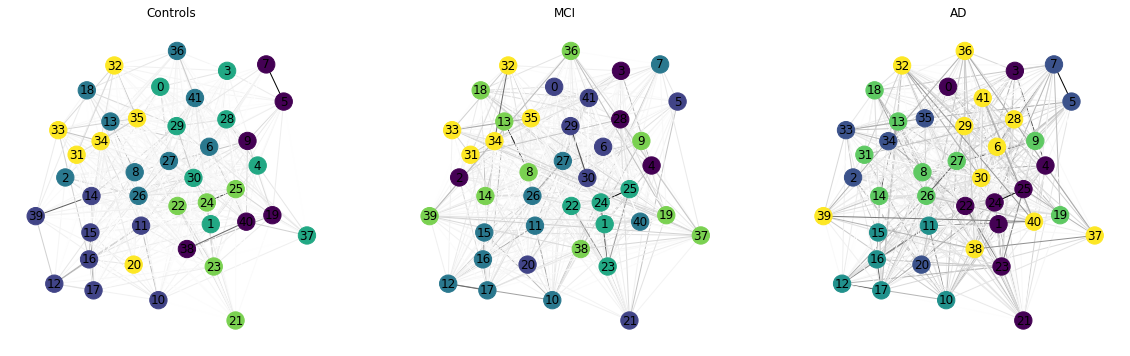

In [271]:
#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))


#get colors
MOCA_CN_colors = color_communities(MOCA_CN_graph, MOCA_CN_partition)
MOCA_MCI_colors = color_communities(MOCA_MCI_graph, MOCA_MCI_partition)
MOCA_AD_colors = color_communities(MOCA_AD_graph, MOCA_AD_partition)

#Plot

#fix position
pos=nx.spring_layout(MOCA_CN_graph)

#get edges weights
edges_CN,weights_CN = zip(*nx.get_edge_attributes(MOCA_CN_graph,'weight').items())
edges_MCI,weights_MCI = zip(*nx.get_edge_attributes(MOCA_MCI_graph,'weight').items())
edges_AD,weights_AD = zip(*nx.get_edge_attributes(MOCA_AD_graph,'weight').items())

#draw graphs
nx.draw(ax=axes[0], G=MOCA_CN_graph, pos=pos, node_color=MOCA_CN_colors, with_labels=True,
       edge_color=weights_CN, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[1], G=MOCA_MCI_graph, pos=pos, node_color=MOCA_MCI_colors, with_labels=True,
       edge_color=weights_MCI, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[2], G=MOCA_AD_graph, pos=pos, node_color=MOCA_AD_colors, with_labels=True,
       edge_color=weights_AD, edge_cmap=plt.cm.Greys)

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.show()

Community metrics for the controls group:

In [272]:
import warnings
warnings.filterwarnings('ignore')

display(community_metrics(MOCA_CN_graph, MOCA_CN_partition))

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0      6      8        2  0.533333  0.495561     0.214286  0.033233   
1     1      8     20        2  0.714286  0.629413     0.658537  0.162972   
2     2      9     27        2      0.75  0.447491     0.707143  0.223649   
3     3      8     20        2  0.714286  0.317637     0.678571  0.234776   
4     4      5     10        1       1.0  0.529161          1.0  0.253827   
5     5      6     13        2  0.866667   0.43994     0.866667  0.491598   

       AvGE                                              Tests  \
0  0.766667  [Name animals, Orientation to date, Name anima...   
1  0.857143  [Orientation to date, Read a list of words and...   
2     0.875  [Draw a clock (contorn), Orientation to date, ...   
3  0.857143  [Trail-making task, Copy cube, Draw a clock (n...   
4       1.0  [Count substracting by 7, Count substracting b...   
5  0.933333  [Delayed recall, Delayed recall, Delayed recal...   

  Executive function  Language    Memory Visuospatial Attention Orientation  
0                0.0  0.333333  0.066667          0.0     0.125    0.333333  
1                0.0       0.0  0.466667          0.0       0.0    0.166667  
2                0.0       0.5  0.133333          0.2     0.125    0.333333  
3                1.0  0.166667       0.0          0.8       0.0    0.166667  
4                0.0       0.0       0.0          0.0     0.625         0.0  
5                0.0       0.0  0.333333          0.0     0.125         0.0

MCI group:

In [273]:
community_metrics(MOCA_MCI_graph, MOCA_MCI_partition)

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0      4      6        1       1.0  0.267011          1.0   0.55773   
1     1      8     22        2  0.785714   0.37028         0.72  0.117797   
2     2     10     28        2  0.622222  0.559807          0.6  0.196619   
3     3      5     10        1       1.0  0.576448          1.0   0.28335   
4     4     10     32        2  0.711111  0.538116     0.674157  0.118324   
5     5      5     10        1       1.0  0.482998          1.0  0.442008   

       AvGE                                              Tests  \
0       1.0  [Draw a clock (contorn), Draw a clock (numbers...   
1  0.892857  [Trail-making task, Name animals, Name animals...   
2  0.811111  [Name animals, Orientation to place, Read a li...   
3       1.0  [Copy cube, Count substracting by 8, Count sub...   
4  0.855556  [Orientation to date, Orientation to date, Ori...   
5       1.0  [Delayed recall, Delayed recall, Delayed recal...   

  Executive function  Language    Memory Visuospatial Attention Orientation  
0                0.0  0.166667       0.0          0.6       0.0         0.0  
1                1.0  0.333333       0.0          0.2      0.25    0.166667  
2                0.0       0.5       0.4          0.0       0.0    0.166667  
3                0.0       0.0       0.0          0.2       0.5         0.0  
4                0.0       0.0  0.266667          0.0      0.25    0.666667  
5                0.0       0.0  0.333333          0.0       0.0         0.0

AD group: 

In [274]:
community_metrics(MOCA_AD_graph, MOCA_AD_partition)

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0      9     27        2      0.75  0.815005     0.683824  0.177874   
1     1      7     14        2  0.666667  0.500415          0.6  0.135253   
2     2      6     11        2  0.733333  0.635774          0.6  0.252173   
3     3      9     24        2  0.666667  0.631441     0.621622  0.140222   
4     4     11     34        2  0.618182  0.765185     0.513812  0.207942   

       AvGE                                              Tests  \
0     0.875  [Trail-making task, Copy cube, Draw a clock (n...   
1  0.833333  [Delayed recall, Draw a clock (contorn), Delay...   
2  0.866667  [Read a list of words and repeat them , Read a...   
3  0.833333  [Read a list of words and repeat them , Read a...   
4  0.809091  [Delayed recall, Orientation to date, Orientat...   

  Executive function  Language    Memory Visuospatial Attention Orientation  
0                0.0       0.0       0.0          0.8     0.625         0.0  
1                0.0  0.333333       0.2          0.2     0.125         0.0  
2                0.0       0.0       0.4          0.0       0.0         0.0  
3                0.0  0.333333  0.333333          0.0      0.25         0.0  
4                1.0  0.333333  0.066667          0.0       0.0         1.0

#### Representation of the domains in each community

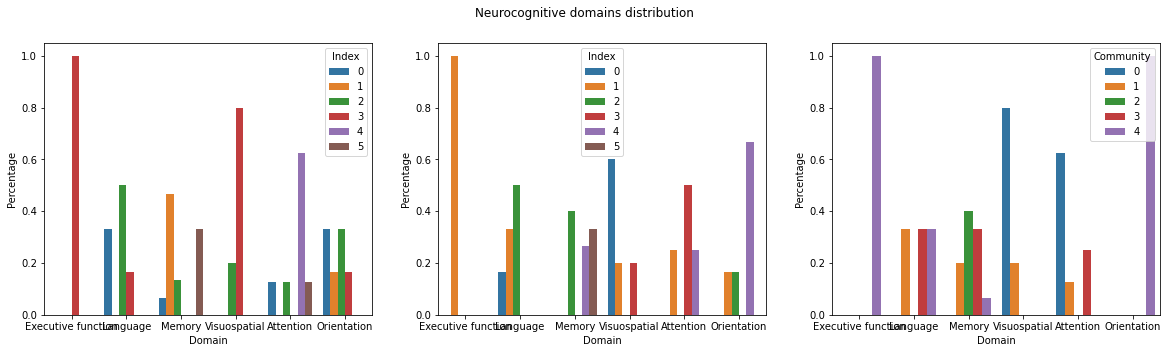

In [275]:
#Get data 
MOCA_CN_domains = community_metrics(MOCA_CN_graph, MOCA_CN_partition)[['Index','Executive function','Language', 'Memory',
                                                                      'Visuospatial', 'Attention', 'Orientation']]
MOCA_MCI_domains = community_metrics(MOCA_MCI_graph, MOCA_MCI_partition)[['Index','Executive function','Language', 'Memory',
                                                                      'Visuospatial', 'Attention', 'Orientation']]
MOCA_AD_domains = community_metrics(MOCA_AD_graph, MOCA_AD_partition)[['Index','Executive function','Language', 'Memory',
                                                                      'Visuospatial', 'Attention', 'Orientation']]

#Reshape data with melt() function
MOCA_CN_domains = MOCA_CN_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
MOCA_MCI_domains = MOCA_MCI_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
MOCA_AD_domains = MOCA_AD_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')

#plot 
fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.barplot(ax=axes[0], x="Domain", y="Percentage", hue="Index", data=MOCA_CN_domains)
sns.barplot(ax=axes[1], x="Domain", y="Percentage", hue="Index", data=MOCA_MCI_domains)
sns.barplot(ax=axes[2], x="Domain", y="Percentage", hue="Index", data=MOCA_AD_domains)


#MOCA_CN_domains.plot(kind='bar',ax=axes[0], x="Domain", y="Per. of representation", hue="Index", stacked=True)

fig.suptitle("Neurocognitive domains distribution")
plt.legend(title='Community')

plt.show()

#send data to build stacked barplot in R
MOCA_CN_domains.to_csv('./Results/MOCA/Louvain_CN.csv', index=False) 
MOCA_MCI_domains.to_csv('./Results/MOCA/Louvain_MCI.csv', index=False) 
MOCA_AD_domains.to_csv('./Results/MOCA/Louvain_AD.csv', index=False) 

#### Modularity index (Greedy modularity algorithm)

This function uses **Clauset-Newman-Moore greedy modularity maximization** to find the community partition with the largest modularity.

Greedy modularity maximization begins with each node in its own community and repeatedly joins the pair of communities that lead to the largest modularity until no further increase in modularity is possible (a maximum).

In [276]:
import networkx.algorithms.community as nx_comm

MOCA_CN_partition = nx_comm.greedy_modularity_communities(MOCA_CN_graph, weight='weight')
MOCA_MCI_partition = nx_comm.greedy_modularity_communities(MOCA_MCI_graph, weight='weight')
MOCA_AD_partition = nx_comm.greedy_modularity_communities(MOCA_AD_graph, weight='weight')

print("--------------------------------")
print("GREEDY MODULARITY COMMUNITIES")
print("--------------------------------")
print()
print("Controls: ", MOCA_CN_partition)
print()
print("MCI: ", MOCA_MCI_partition)
print()
print("AD: ", MOCA_AD_partition)

print()
print("--------------------------------")
print("MODULARITY INDEX")
print("--------------------------------")
print()
print("Controls: ", nx_comm.modularity(MOCA_CN_graph, MOCA_CN_partition, weight='weight'))
print()
print("MCI: ", nx_comm.modularity(MOCA_MCI_graph, MOCA_MCI_partition, weight='weight'))
print()
print("AD: ", nx_comm.modularity(MOCA_AD_graph, MOCA_AD_partition, weight='weight'))

--------------------------------
GREEDY MODULARITY COMMUNITIES
--------------------------------

Controls:  [frozenset({0, 2, 39, 14, 18, 26, 27, 29, 30}), frozenset({36, 38, 6, 40, 9, 8, 41, 13, 19}), frozenset({4, 21, 22, 23, 24, 25, 37, 28}), frozenset({16, 17, 10, 11, 12, 15}), frozenset({32, 33, 34, 35, 20, 31}), frozenset({1, 3, 5, 7})]

MCI:  [frozenset({0, 1, 2, 3, 4, 22, 23, 24, 25, 28}), frozenset({8, 9, 13, 14, 18, 19, 26, 27}), frozenset({16, 17, 40, 41, 10, 11, 12, 15}), frozenset({20, 21, 5, 7, 6, 29, 30}), frozenset({32, 33, 34, 35, 31}), frozenset({36, 37, 38, 39})]

AD:  [frozenset({0, 32, 33, 3, 4, 34, 35, 29, 30, 31}), frozenset({8, 9, 13, 14, 18, 19, 26, 27}), frozenset({16, 17, 10, 11, 12, 15}), frozenset({1, 21, 22, 23, 24, 25}), frozenset({2, 20, 5, 6, 7, 28}), frozenset({36, 37, 38, 39, 40, 41})]

--------------------------------
MODULARITY INDEX
--------------------------------

Controls:  0.24935653908509695

MCI:  0.2273523024945965

AD:  0.1617248729009592


#### Draw graph displaying communities (Greedy modularity communities)

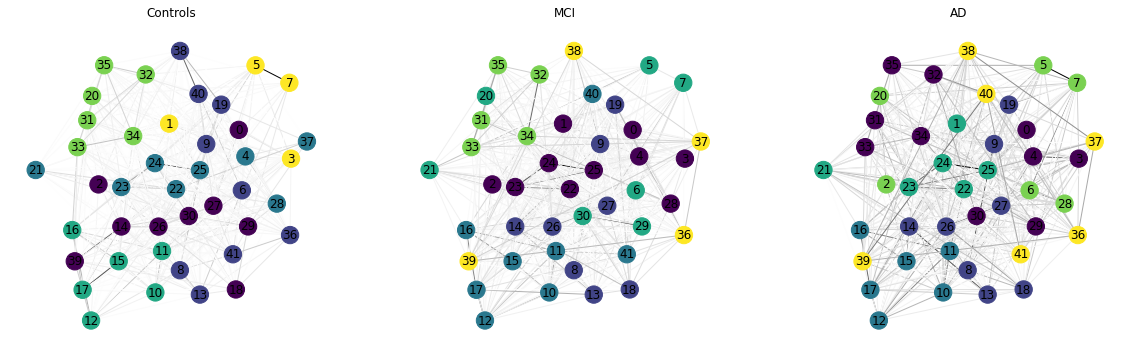

In [277]:
#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))

#get colors
MOCA_CN_colors = color_communities(MOCA_CN_graph, MOCA_CN_partition)
MOCA_MCI_colors = color_communities(MOCA_MCI_graph, MOCA_MCI_partition)
MOCA_AD_colors = color_communities(MOCA_AD_graph, MOCA_AD_partition)

#fix positions
pos=nx.spring_layout(MOCA_CN_graph)

#get edges weights
edges_CN,weights_CN = zip(*nx.get_edge_attributes(MOCA_CN_graph,'weight').items())
edges_MCI,weights_MCI = zip(*nx.get_edge_attributes(MOCA_MCI_graph,'weight').items())
edges_AD,weights_AD = zip(*nx.get_edge_attributes(MOCA_AD_graph,'weight').items())

#draw graphs
nx.draw(ax=axes[0], G=MOCA_CN_graph, pos=pos, with_labels=True, node_color=MOCA_CN_colors,
       edge_color=weights_CN, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[1], G=MOCA_MCI_graph, pos=pos, with_labels=True, node_color=MOCA_MCI_colors,
       edge_color=weights_MCI, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[2], G=MOCA_AD_graph, pos=pos, with_labels=True, node_color=MOCA_AD_colors,
       edge_color=weights_AD, edge_cmap=plt.cm.Greys)

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.show()

Community metrics for the controls group:

In [278]:
import warnings
warnings.filterwarnings('ignore')

display(community_metrics(MOCA_CN_graph, MOCA_CN_partition))

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0      9     26        2  0.722222  0.489445     0.642857   0.10268   
1     1      9     24        2  0.666667  0.487654     0.537736  0.087736   
2     2      8     18        2  0.642857   0.48683     0.676056  0.157799   
3     3      6     12        2       0.8  0.562137      0.72973  0.236319   
4     4      6     13        2  0.866667   0.43994     0.866667  0.491598   
5     5      4      5        2  0.833333  0.353156         0.75  0.088997   

       AvGE                                              Tests  \
0  0.861111  [Trail-making task, Draw a clock (contorn), Or...   
1  0.833333  [Orientation to date, Orientation to date, Nam...   
2  0.821429  [Draw a clock (hands), Orientation to date, Co...   
3       0.9  [Read a list of words and repeat them , Read a...   
4  0.933333  [Delayed recall, Delayed recall, Delayed recal...   
5  0.916667  [Copy cube, Draw a clock (numbers), Name anima...   

  Executive function  Language    Memory Visuospatial Attention Orientation  
0                1.0  0.333333  0.066667          0.4     0.125    0.166667  
1                0.0  0.166667       0.2          0.0     0.125    0.666667  
2                0.0  0.166667       0.0          0.2     0.625    0.166667  
3                0.0       0.0       0.4          0.0       0.0         0.0  
4                0.0       0.0  0.333333          0.0     0.125         0.0  
5                0.0  0.333333       0.0          0.4       0.0         0.0

MCI group:

In [279]:
community_metrics(MOCA_MCI_graph, MOCA_MCI_partition)

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0     10     35        2  0.777778  0.581574     0.767442  0.129665   
1     1      8     20        2  0.714286  0.512554     0.650602  0.148112   
2     2      8     19        2  0.678571  0.524132     0.616438  0.209244   
3     3      7     16        2  0.761905  0.343862     0.711864  0.129608   
4     4      5     10        1       1.0  0.482998          1.0  0.442008   
5     5      4      6        1       1.0  0.322134          1.0  0.693034   

       AvGE                                              Tests  \
0  0.888889  [Trail-making task, Copy cube, Draw a clock (c...   
1  0.857143  [Read a list of words and repeat them , Read a...   
2  0.839286  [Orientation to place, Orientation to place, R...   
3  0.880952  [Name animals, Name animals, Name animals, Seq...   
4       1.0  [Delayed recall, Delayed recall, Delayed recal...   
5       1.0  [Orientation to date, Orientation to date, Ori...   

  Executive function  Language    Memory Visuospatial Attention Orientation  
0                0.0  0.166667       0.0          1.0       0.5         0.0  
1                0.0  0.333333  0.266667          0.0      0.25         0.0  
2                0.0       0.0       0.4          0.0       0.0    0.333333  
3                1.0       0.5       0.0          0.0      0.25         0.0  
4                0.0       0.0  0.333333          0.0       0.0         0.0  
5                0.0       0.0       0.0          0.0       0.0    0.666667

AD group: 

In [280]:
community_metrics(MOCA_AD_graph, MOCA_AD_partition)

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0     10     32        2  0.711111  0.636906     0.640449  0.135255   
1     1      8     20        2  0.714286  0.637843     0.642857  0.148785   
2     2      6     11        2  0.733333  0.635774          0.6  0.252173   
3     3      6     12        2       0.8  0.718382      0.72973   0.29017   
4     4      6     10        2  0.666667  0.503817         0.48  0.125151   
5     5      6     11        2  0.733333  0.573924          0.6  0.301839   

       AvGE                                              Tests  \
0  0.855556  [Trail-making task, Delayed recall, Delayed re...   
1  0.857143  [Read a list of words and repeat them , Read a...   
2  0.866667  [Read a list of words and repeat them , Read a...   
3       0.9  [Copy cube, Count substracting by 7, Count sub...   
4  0.833333  [Draw a clock (contorn), Name animals, Name an...   
5  0.866667  [Orientation to date, Orientation to date, Ori...   

  Executive function  Language    Memory Visuospatial Attention Orientation  
0                1.0       0.0  0.333333          0.6       0.0         0.0  
1                0.0  0.333333  0.266667          0.0      0.25         0.0  
2                0.0       0.0       0.4          0.0       0.0         0.0  
3                0.0       0.0       0.0          0.2     0.625         0.0  
4                0.0  0.666667       0.0          0.2     0.125         0.0  
5                0.0       0.0       0.0          0.0       0.0         1.0

#### Representation of the domains in each community

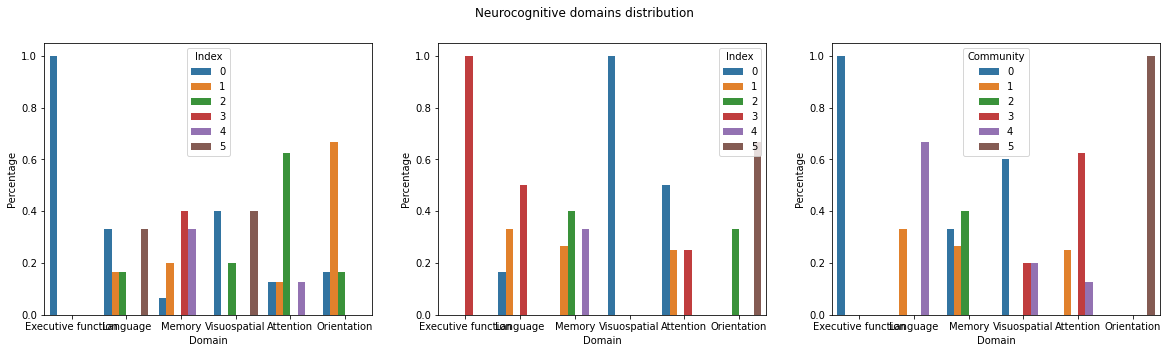

In [281]:
#Get data 
MOCA_CN_domains = community_metrics(MOCA_CN_graph, MOCA_CN_partition)[['Index','Executive function','Language', 'Memory',
                                                                      'Visuospatial', 'Attention', 'Orientation']]
MOCA_MCI_domains = community_metrics(MOCA_MCI_graph, MOCA_MCI_partition)[['Index','Executive function','Language', 'Memory',
                                                                      'Visuospatial', 'Attention', 'Orientation']]
MOCA_AD_domains = community_metrics(MOCA_AD_graph, MOCA_AD_partition)[['Index','Executive function','Language', 'Memory',
                                                                      'Visuospatial', 'Attention', 'Orientation']]

#Reshape data with melt() function
MOCA_CN_domains = MOCA_CN_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
MOCA_MCI_domains = MOCA_MCI_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
MOCA_AD_domains = MOCA_AD_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')

#plot 
fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.barplot(ax=axes[0], x="Domain", y="Percentage", hue="Index", data=MOCA_CN_domains)
sns.barplot(ax=axes[1], x="Domain", y="Percentage", hue="Index", data=MOCA_MCI_domains)
sns.barplot(ax=axes[2], x="Domain", y="Percentage", hue="Index", data=MOCA_AD_domains)


#MOCA_CN_domains.plot(kind='bar',ax=axes[0], x="Domain", y="Per. of representation", hue="Index", stacked=True)

fig.suptitle("Neurocognitive domains distribution")
plt.legend(title='Community')

plt.show()

#send data to build stacked barplot in R
MOCA_CN_domains.to_csv('./Results/MOCA/Greedy_CN.csv', index=False) 
MOCA_MCI_domains.to_csv('./Results/MOCA/Greedy_MCI.csv', index=False) 
MOCA_AD_domains.to_csv('./Results/MOCA/Greedy_AD.csv', index=False) 

### Merged data

#### Divide data by diagnostic group

In [394]:
#Get indexes of subjects belonging to each group
merged_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_merged = Y_merged.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    merged_indexes[dx] = Y_merged.index[Y_merged['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_merged_CN = X_merged.iloc[merged_indexes["CN"]]
X_merged_MCI = X_merged.iloc[merged_indexes["MCI"]]
X_merged_AD = X_merged.iloc[merged_indexes["AD"]]

print("Number of instances CN: ", X_merged_CN.shape[0])
print("Number of instances MCI: ", X_merged_MCI.shape[0])
print("Number of instances AD: ", X_merged_AD.shape[0])

Number of instances CN:  288
Number of instances MCI:  468
Number of instances AD:  142


#### Plot z-scores by cognitive domain

1. Compute averages of each test
2. Group by NC domain
3. Compute the average of each domain

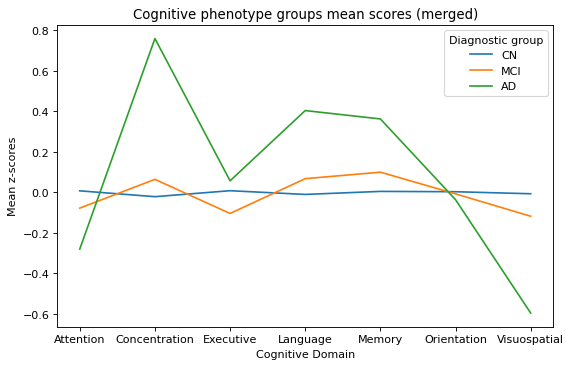

In [476]:
metadata_path = "./Tests/merged_Metadata.csv"
#Compute zscores means for each cognitive domain by diagnostic group
merged_means_CN = zscores_means(X_merged_CN, "CN", metadata_path)
merged_means_MCI = zscores_means(X_merged_MCI, "MCI", metadata_path)
merged_means_AD = zscores_means(X_merged_AD, "AD", metadata_path)

#Concanetate all dataframes
merged_means_df = pd.concat([merged_means_CN, merged_means_MCI, merged_means_AD])
merged_means_df.index = range(len(merged_means_df))

#plot dataframe
plt.figure(figsize=(8, 5), dpi=80)
sns.lineplot(data=merged_means_df, x='Cognitive Domain', y='Mean', hue='Diagnostic')
plt.title("Cognitive phenotype groups mean scores (merged)")
plt.ylabel("Mean z-scores")
plt.legend(title="Diagnostic group")
plt.show()

#### Compute adjacency matrixes

In [395]:
merged_CN_mx = par_corr(X_merged_CN)
merged_MCI_mx = par_corr(X_merged_MCI)
merged_AD_mx = par_corr(X_merged_AD)

#### Plot adjacency matrixes

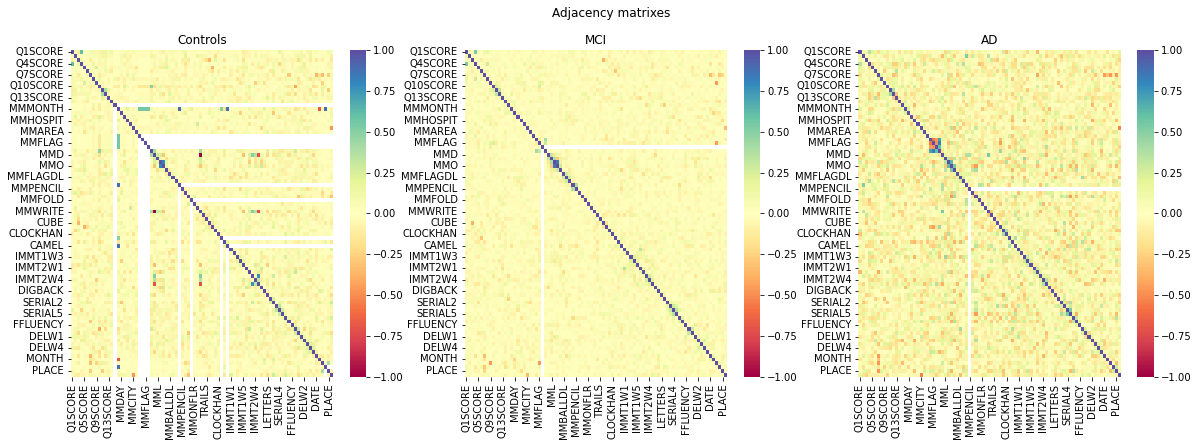

In [396]:
fig, axes = plt.subplots(1,3, figsize=(20,6))


fig.suptitle('Adjacency matrixes')

sns.heatmap(ax=axes[0],data=merged_CN_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[1],data=merged_MCI_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
sns.heatmap(ax=axes[2],data=merged_AD_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.show()

In [397]:
X_merged_CN.describe()

Q1SCORE     Q2SCORE     Q3SCORE     Q4SCORE     Q5SCORE     Q6SCORE  \
count  288.000000  288.000000  288.000000  288.000000  288.000000  288.000000   
mean    -0.021696    0.012332    0.019762    0.000824   -0.038149   -0.055067   
std      1.014144    0.901633    1.002973    1.039224    0.937875    0.882614   
min     -2.272568   -0.190270   -0.711416   -1.572513   -0.286972   -0.273434   
25%     -0.743674   -0.190270   -0.711416   -0.480655   -0.286972   -0.273434   
50%      0.020773   -0.190270   -0.711416    0.065274   -0.286972   -0.273434   
75%      0.785220   -0.190270    1.185693    0.611203   -0.286972   -0.273434   
max      3.078561   11.479633    3.082802    3.886778    3.484660    6.015556   

          Q7SCORE     Q8SCORE     Q9SCORE    Q10SCORE    Q11SCORE    Q12SCORE  \
count  288.000000  288.000000  288.000000  288.000000  288.000000  288.000000   
mean     0.010734   -0.043688   -0.050805   -0.030021    0.087142    0.010262   
std      0.968365    0.946505    0.803553    0.897207    1.225588    1.059035   
min     -0.312115   -1.048522   -0.140692   -0.149071   -0.226779   -0.158334   
25%     -0.312115   -0.648809   -0.140692   -0.149071   -0.226779   -0.158334   
50%     -0.312115   -0.515572   -0.140692   -0.149071   -0.226779   -0.158334   
75%     -0.312115    0.550329   -0.140692   -0.149071   -0.226779   -0.158334   
max      7.892040    5.346885   10.214214    6.708204   10.205041    9.552815   

         Q13SCORE      MMDATE  MMYEAR     MMMONTH       MMDAY    MMSEASON  \
count  288.000000  288.000000   288.0  288.000000  288.000000  288.000000   
mean    -0.005439   -0.007650     0.0    0.003472    0.003472   -0.011957   
std      1.066202    0.981337     0.0    0.058926    0.058926    0.982330   
min     -0.676418   -0.183597     0.0    0.000000    0.000000   -0.286972   
25%     -0.676418   -0.183597     0.0    0.000000    0.000000   -0.286972   
50%     -0.676418   -0.183597     0.0    0.000000    0.000000   -0.286972   
75%      0.961225   -0.183597     0.0    0.000000    0.000000   -0.286972   
max      4.236512    5.446712     0.0    1.000000    1.000000    3.484660   

         MMHOSPIT     MMFLOOR      MMCITY      MMAREA  MMSTATE  MMBALL  \
count  288.000000  288.000000  288.000000  288.000000    288.0   288.0   
mean     0.065219    0.109648   -0.053831    0.020644      0.0     0.0   
std      1.195192    1.253205    0.803903    1.041394      0.0     0.0   
min     -0.149071   -0.183597   -0.149071   -0.239732      0.0     0.0   
25%     -0.149071   -0.183597   -0.149071   -0.239732      0.0     0.0   
50%     -0.149071   -0.183597   -0.149071   -0.239732      0.0     0.0   
75%     -0.149071   -0.183597   -0.149071   -0.239732      0.0     0.0   
max      6.708204    5.446712    6.708204    4.171331      0.0     0.0   

       MMFLAG  MMTREE    MMTRIALS         MMD         MML         MMR  \
count   288.0   288.0  288.000000  288.000000  288.000000  288.000000   
mean      0.0     0.0   -0.035892   -0.026694   -0.046749   -0.048784   
std       0.0     0.0    0.802124    0.801486    0.868555    0.931961   
min       0.0     0.0   -0.099394   -0.073922   -0.183597   -0.329293   
25%       0.0     0.0   -0.099394   -0.073922   -0.183597   -0.329293   
50%       0.0     0.0   -0.099394   -0.073922   -0.183597   -0.329293   
75%       0.0     0.0   -0.099394   -0.073922   -0.183597   -0.329293   
max       0.0     0.0   12.092990   13.527749    5.446712    3.036811   

              MMO         MMW    MMBALLDL    MMFLAGDL    MMTREEDL  MMWATCH  \
count  288.000000  288.000000  288.000000  288.000000  288.000000    288.0   
mean    -0.011957    0.029119    0.025070    0.006049    0.056407      0.0   
std      0.982330    1.130626    1.071994    1.008802    1.074032      0.0   
min     -0.286972   -0.104828   -0.167132   -0.368514   -0.329293      0.0   
25%     -0.286972   -0.104828   -0.167132   -0.368514   -0.329293      0.0   
50%     -0.286972   -0.104828   -0.167132   -0.368514   -0.3292

In [398]:
X_merged_MCI.describe()

Q1SCORE     Q2SCORE     Q3SCORE     Q4SCORE     Q5SCORE     Q6SCORE  \
count  468.000000  468.000000  468.000000  468.000000  468.000000  468.000000   
mean     0.893027    0.158830    0.216870    1.122137    0.333574   -0.018112   
std      1.154253    0.987097    1.027329    1.402034    1.463676    1.097752   
min     -2.272568   -0.190270   -0.711416   -1.572513   -0.286972   -0.273434   
25%      0.020773   -0.190270   -0.711416    0.065274   -0.286972   -0.273434   
50%      0.785220   -0.190270   -0.711416    1.157132   -0.286972   -0.273434   
75%      1.549667   -0.190270    1.185693    2.248991   -0.286972   -0.273434   
max      4.607454   11.479633    3.082802    3.886778    7.256293   15.449042   

          Q7SCORE     Q8SCORE     Q9SCORE    Q10SCORE    Q11SCORE    Q12SCORE  \
count  468.000000  468.000000  468.000000  468.000000  468.000000  468.000000   
mean     0.722170    0.746200    0.047378    0.393064    0.590529    0.121795   
std      2.140331    1.356363    1.230596    2.200148    1.719133    1.374876   
min     -0.312115   -1.048522   -0.140692   -0.149071   -0.226779   -0.158334   
25%     -0.312115   -0.115859   -0.140692   -0.149071   -0.226779   -0.158334   
50%     -0.312115    0.550329   -0.140692   -0.149071   -0.226779   -0.158334   
75%      2.422604    1.616231   -0.140692   -0.149071   -0.226779   -0.158334   
max     21.565631    5.346885   15.391667   20.422754    6.727768    9.552815   

         Q13SCORE      MMDATE      MMYEAR     MMMONTH       MMDAY    MMSEASON  \
count  468.000000  468.000000  468.000000  468.000000  468.000000  468.000000   
mean     0.320865    0.141228    0.004274    0.010684    0.055556    0.035390   
std      1.491641    1.314171    0.065302    0.102919    0.229307    1.055601   
min     -0.676418   -0.183597    0.000000    0.000000    0.000000   -0.286972   
25%     -0.676418   -0.183597    0.000000    0.000000    0.000000   -0.286972   
50%     -0.676418   -0.183597    0.000000    0.000000    0.000000   -0.286972   
75%      0.961225   -0.183597    0.000000    0.000000    0.000000   -0.286972   
max      7.511799    5.446712    1.000000    1.000000    1.000000    3.484660   

         MMHOSPIT     MMFLOOR      MMCITY      MMAREA     MMSTATE      MMBALL  \
count  468.000000  468.000000  468.000000  468.000000  468.000000  468.000000   
mean     0.495630    0.405901    0.041409    0.061879    0.012821    0.008547   
std      2.003454    1.725663    1.128100    1.114500    0.112620    0.092153   
min     -0.149071   -0.183597   -0.149071   -0.239732    0.000000    0.000000   
25%     -0.149071   -0.183597   -0.149071   -0.239732    0.000000    0.000000   
50%     -0.149071   -0.183597   -0.149071   -0.239732    0.000000    0.000000   
75%     -0.149071   -0.183597   -0.149071   -0.239732    0.000000    0.000000   
max      6.708204    5.446712    6.708204    4.171331    1.000000    1.000000   

           MMFLAG  MMTREE    MMTRIALS         MMD         MML         MMR  \
count  468.000000   468.0  468.000000  468.000000  468.000000  468.000000   
mean     0.002137     0.0   -0.001699   -0.044859   -0.003138    0.087874   
std      0.046225     0.0    0.698431    0.628737    0.992763    1.110330   
min      0.000000     0.0   -0.099394   -0.073922   -0.183597   -0.329293   
25%      0.000000     0.0   -0.099394   -0.073922   -0.183597   -0.329293   
50%      0.000000     0.0   -0.099394   -0.073922   -0.183597   -0.329293   
75%      0.000000     0.0   -0.099394   -0.073922   -0.183597   -0.329293   
max      1.000000     0.0    5.996798   13.527749    5.446712    3.036811   

              MMO         MMW    MMBALLDL    MMFLAGDL    MMTREEDL     MMWATCH  \
count  468.000000  468.000000  468.000000  468.000000  468.000000  468.000000   
mean     0.140157    0.142459    0.542535    0.520558    0.735202    0.006410   
std      1.196492    1.526015    1.967080    1.397837    1.566939    0.079892   
min     -0.286972   -0.104828   -0.167132   -0.368514   -0.329293    0.0

In [399]:
X_merged_AD.describe()

Q1SCORE     Q2SCORE     Q3SCORE     Q4SCORE     Q5SCORE     Q6SCORE  \
count  142.000000  142.000000  142.000000  142.000000  142.000000  142.000000   
mean     2.599435    0.647991    0.918495    3.160154    1.997256    1.320958   
std      1.098619    1.605076    1.366747    0.821720    2.978191    2.745563   
min      0.020773   -0.190270   -0.711416    0.065274   -0.286972   -0.273434   
25%      1.549667   -0.190270   -0.711416    2.794920   -0.286972   -0.273434   
50%      2.314114   -0.190270    1.185693    3.340849   -0.286972   -0.273434   
75%      3.078561    2.143711    1.185693    3.886778    3.484660    2.871061   
max      5.371901    9.145653    4.979911    3.886778   14.799557   15.449042   

          Q7SCORE     Q8SCORE     Q9SCORE    Q10SCORE    Q11SCORE    Q12SCORE  \
count  142.000000  142.000000  142.000000  142.000000  142.000000  142.000000   
mean     6.178026    3.061203    1.901121    3.665892    2.295469    1.482987   
std      4.771359    1.526773    5.444415    5.570556    3.264714    3.366392   
min     -0.312115   -1.048522   -0.140692   -0.149071   -0.226779   -0.158334   
25%      2.422604    1.749468   -0.140692   -0.149071   -0.226779   -0.158334   
50%      5.157322    3.215083   -0.140692   -0.149071   -0.226779   -0.158334   
75%      7.892040    4.280984   -0.140692    6.708204    3.250494   -0.158334   
max     18.830913    5.346885   25.746572   20.422754   10.205041   14.408389   

         Q13SCORE      MMDATE      MMYEAR     MMMONTH       MMDAY    MMSEASON  \
count  142.000000  142.000000  142.000000  142.000000  142.000000  142.000000   
mean     2.022234    3.147008    0.260563    0.239437    0.394366    0.536412   
std      2.056703    2.777360    0.440496    0.428250    0.490444    1.563572   
min     -0.676418   -0.183597    0.000000    0.000000    0.000000   -0.286972   
25%      0.961225   -0.183597    0.000000    0.000000    0.000000   -0.286972   
50%      0.961225    5.446712    0.000000    0.000000    0.000000   -0.286972   
75%      2.598869    5.446712    1.000000    0.000000    1.000000   -0.286972   
max      7.511799    5.446712    1.000000    1.000000    1.000000    3.484660   

         MMHOSPIT     MMFLOOR      MMCITY      MMAREA     MMSTATE      MMBALL  \
count  142.000000  142.000000  142.000000  142.000000  142.000000  142.000000   
mean     1.734265    1.957506    0.816742    0.847502    0.028169    0.014085   
std      3.071488    2.742942    2.393827    1.907723    0.166041    0.118257   
min     -0.149071   -0.183597   -0.149071   -0.239732    0.000000    0.000000   
25%     -0.149071   -0.183597   -0.149071   -0.239732    0.000000    0.000000   
50%     -0.149071   -0.183597   -0.149071   -0.239732    0.000000    0.000000   
75%      6.708204    5.446712   -0.149071   -0.239732    0.000000    0.000000   
max      6.708204    5.446712    6.708204    4.171331    1.000000    1.000000   

           MMFLAG      MMTREE    MMTRIALS         MMD         MML         MMR  \
count  142.000000  142.000000  142.000000  142.000000  142.000000  142.000000   
mean     0.035211    0.014085    0.136726    0.021864    0.371504    0.618906   
std      0.184966    0.118257    0.965528    1.141427    1.684409    1.519511   
min      0.000000    0.000000   -0.099394   -0.073922   -0.183597   -0.329293   
25%      0.000000    0.000000   -0.099394   -0.073922   -0.183597   -0.329293   
50%      0.000000    0.000000   -0.099394   -0.073922   -0.183597   -0.329293   
75%      0.000000    0.000000   -0.099394   -0.073922   -0.183597    3.036811   
max      1.000000    1.000000    5.996798   13.527749    5.446712    3.036811   

              MMO         MMW    MMBALLDL    MMFLAGDL    MMTREEDL     MMWATCH  \
count  142.000000  142.000000  142.000000  142.000000  142.000000  142.000000   
mean     0.855142    1.932683    3.904288    2.301206    2.396777    0.007042   
std      1.739112    3.950782    2.919693    1.052991    1.325576    0.083918   
min     -0.286972   -0.104828   -0.1

#### Compute graph

In [400]:
#Remove diagonal elements and negative correlations from the matrix

for i in range(merged_MCI_mx.shape[1]):
    colname = merged_MCI_mx.columns[i]
    merged_CN_mx[colname] = np.where((merged_CN_mx[colname]< 0) | (merged_CN_mx[colname]==1.0) | (merged_CN_mx[colname].isnull()),0, merged_CN_mx[colname]) 
    merged_MCI_mx[colname] = np.where((merged_MCI_mx[colname]< 0) | (merged_MCI_mx[colname]==1.0) | (merged_MCI_mx[colname].isnull()),0, merged_MCI_mx[colname]) 
    merged_AD_mx[colname] = np.where((merged_AD_mx[colname]< 0) | (merged_AD_mx[colname]==1.0) | (merged_AD_mx[colname].isnull()),0, merged_AD_mx[colname]) 

In [401]:
import networkx as nx

#convert adjacency matrix into graph
merged_CN_graph = nx.from_numpy_array(merged_CN_mx.to_numpy())
merged_MCI_graph = nx.from_numpy_array(merged_MCI_mx.to_numpy())
merged_AD_graph = nx.from_numpy_array(merged_AD_mx.to_numpy())

In [402]:
#count nodes and edges
print("CN-------------------------")
print("- Number of nodes: ", merged_CN_graph.number_of_nodes())
print("- Number of edges: ", merged_CN_graph.number_of_edges())
print()
print("MCI-------------------------")
print("- Number of nodes: ", merged_MCI_graph.number_of_nodes())
print("- Number of edges: ", merged_MCI_graph.number_of_edges())
print()
print("AD-------------------------")
print("- Number of nodes: ", merged_AD_graph.number_of_nodes())
print("- Number of edges: ", merged_AD_graph.number_of_edges())

CN-------------------------
- Number of nodes:  86
- Number of edges:  1567

MCI-------------------------
- Number of nodes:  86
- Number of edges:  1834

AD-------------------------
- Number of nodes:  86
- Number of edges:  1792


#### Add node attributes

As the nodes represent different tests they are going to have the following attributes:

- ADNI column: name of the test in the ADNI database
- Test description
- Cognitive domain

In [403]:
#Import node metadata
merged_metadata = pd.read_csv("./Tests/merged_Metadata.csv", sep=";", 
                            usecols = ['Node', 'ADNI column', 'Test', 'Cognitive Domain'])

graphs = [merged_CN_graph, merged_MCI_graph, merged_AD_graph]

for graph in graphs:
    #ADNI column
    nx.set_node_attributes(graph, dict(zip(merged_metadata.Node, merged_metadata['ADNI column'])), name="ADNIColumn")
    #Test
    nx.set_node_attributes(graph, dict(zip(merged_metadata.Node, merged_metadata['Test'])), name="Test")
    #Cognitive domain
    nx.set_node_attributes(graph, dict(zip(merged_metadata.Node, merged_metadata['Cognitive Domain'])), name="Domain")

#### Draw graph

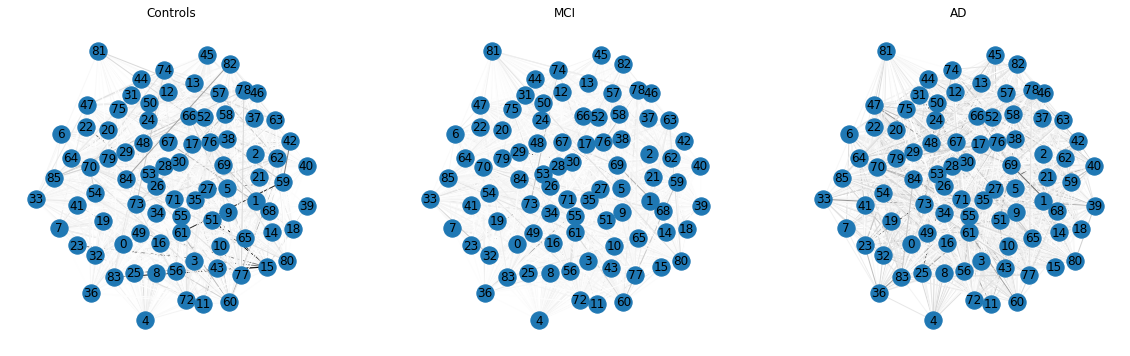

In [404]:
#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))

#fix position
pos=nx.spring_layout(merged_AD_graph)

#get edges weights
edges_CN,weights_CN = zip(*nx.get_edge_attributes(merged_CN_graph,'weight').items())
edges_MCI,weights_MCI = zip(*nx.get_edge_attributes(merged_MCI_graph,'weight').items())
edges_AD,weights_AD = zip(*nx.get_edge_attributes(merged_AD_graph,'weight').items())

#draw graphs
nx.draw(ax=axes[0], G=merged_CN_graph, pos=pos, with_labels=True,
       edge_color=weights_CN, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[1], G=merged_MCI_graph, pos=pos, with_labels=True,
       edge_color=weights_MCI, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[2], G=merged_AD_graph, pos=pos, with_labels=True,
       edge_color=weights_AD, edge_cmap=plt.cm.Greys)

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.show()

#### Edges weights

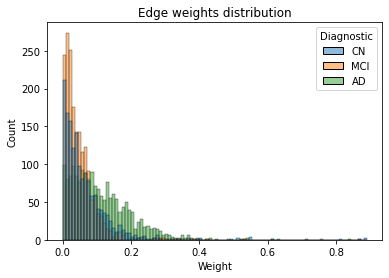

In [405]:
#Create dataframe with weights
weights_df_CN = pd.DataFrame(weights_CN, columns=["Weight"])
weights_df_CN['Diagnostic'] = "CN"
weights_df_MCI = pd.DataFrame(weights_MCI, columns=["Weight"])
weights_df_MCI['Diagnostic'] = "MCI"
weights_df_AD = pd.DataFrame(weights_AD, columns=["Weight"])
weights_df_AD['Diagnostic'] = "AD"

#merge all
weights_df = pd.concat([weights_df_CN, weights_df_MCI, weights_df_AD], ignore_index=True)

#plot histogram
sns.histplot(data=weights_df, x="Weight", hue="Diagnostic")
plt.title("Edge weights distribution")
plt.show()

#### Node centrality

In [318]:
#Node degree

print("---------------------")
print("DEGREE CENTRALITY")
print("---------------------")
print()
print("Controls: ", nx.degree_centrality(merged_CN_graph))
print()
print("MCI: ", nx.degree_centrality(merged_MCI_graph))
print()
print("AD: ", nx.degree_centrality(merged_AD_graph))

---------------------
DEGREE CENTRALITY
---------------------

Controls:  {0: 0.49411764705882355, 1: 0.4588235294117647, 2: 0.5176470588235293, 3: 0.5647058823529412, 4: 0.5294117647058824, 5: 0.4823529411764706, 6: 0.47058823529411764, 7: 0.47058823529411764, 8: 0.5176470588235293, 9: 0.4, 10: 0.5411764705882353, 11: 0.47058823529411764, 12: 0.5294117647058824, 13: 0.5176470588235293, 14: 0.10588235294117647, 15: 0.44705882352941173, 16: 0.4823529411764706, 17: 0.5176470588235293, 18: 0.5294117647058824, 19: 0.4823529411764706, 20: 0.3529411764705882, 21: 0.5176470588235293, 22: 0.12941176470588234, 23: 0.12941176470588234, 24: 0.12941176470588234, 25: 0.12941176470588234, 26: 0.49411764705882355, 27: 0.5058823529411764, 28: 0.4588235294117647, 29: 0.5529411764705883, 30: 0.47058823529411764, 31: 0.5294117647058824, 32: 0.44705882352941173, 33: 0.5058823529411764, 34: 0.4235294117647059, 35: 0.12941176470588234, 36: 0.38823529411764707, 37: 0.36470588235294116, 38: 0.4117647058823529

#### Other centrality measures

In [319]:
print("Controls----------------------------------")
display(centrality(merged_CN_graph, merged_columns))
print("MCI----------------------------------")
display(centrality(merged_MCI_graph, merged_columns))
print("AD----------------------------------")
display(centrality(merged_AD_graph, merged_columns))

Controls----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1SCORE           0.494118              0.664062                0.116724   
Q2SCORE           0.458824              0.648855                0.107468   
Q3SCORE           0.517647              0.674603                0.118964   
Q4SCORE           0.564706              0.696721                0.130772   
Q5SCORE           0.529412              0.680000                0.122708   
...                    ...                   ...                     ...   
MONTH             0.329412              0.598592                0.084941   
YEAR              0.435294              0.639098                0.109554   
DAY               0.423529              0.634328                0.105562   
PLACE             0.423529              0.634328                0.108342   
CITY              0.329412              0.598592                0.084854   

         Betweenness_Centrality  
Q1SCORE                0.009302  
Q2SCORE                0.008298  
Q3SCORE                0.016123  
Q4SCORE                0.014933  
Q5SCORE                0.014585  
...                         ...  
MONTH                  0.002593  
YEAR                   0.004602  
DAY                    0.004418  
PLACE                  0.004020  
CITY                   0.002592  

[86 rows x 4 columns]

MCI----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1SCORE           0.576471              0.702479                0.119632   
Q2SCORE           0.447059              0.643939                0.096805   
Q3SCORE           0.482353              0.658915                0.103050   
Q4SCORE           0.517647              0.674603                0.108933   
Q5SCORE           0.576471              0.702479                0.119169   
...                    ...                   ...                     ...   
MONTH             0.458824              0.648855                0.098009   
YEAR              0.505882              0.669291                0.107441   
DAY               0.529412              0.680000                0.114637   
PLACE             0.470588              0.653846                0.099921   
CITY              0.576471              0.702479                0.121926   

         Betweenness_Centrality  
Q1SCORE                0.008127  
Q2SCORE                0.004120  
Q3SCORE                0.005139  
Q4SCORE                0.006427  
Q5SCORE                0.009671  
...                         ...  
MONTH                  0.004806  
YEAR                   0.005989  
DAY                    0.005769  
PLACE                  0.004921  
CITY                   0.007566  

[86 rows x 4 columns]

AD----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1SCORE           0.552941              0.691057                0.117409   
Q2SCORE           0.470588              0.653846                0.102735   
Q3SCORE           0.600000              0.714286                0.132138   
Q4SCORE           0.470588              0.653846                0.105419   
Q5SCORE           0.364706              0.611511                0.082294   
...                    ...                   ...                     ...   
MONTH             0.458824              0.648855                0.100692   
YEAR              0.494118              0.664062                0.110764   
DAY               0.482353              0.658915                0.103070   
PLACE             0.517647              0.674603                0.113411   
CITY              0.494118              0.664062                0.109648   

         Betweenness_Centrality  
Q1SCORE                0.008549  
Q2SCORE                0.005587  
Q3SCORE                0.008229  
Q4SCORE                0.005095  
Q5SCORE                0.002732  
...                         ...  
MONTH                  0.004889  
YEAR                   0.005102  
DAY                    0.006086  
PLACE                  0.006597  
CITY                   0.005620  

[86 rows x 4 columns]

#### Relation between node degree and betweenness centrality

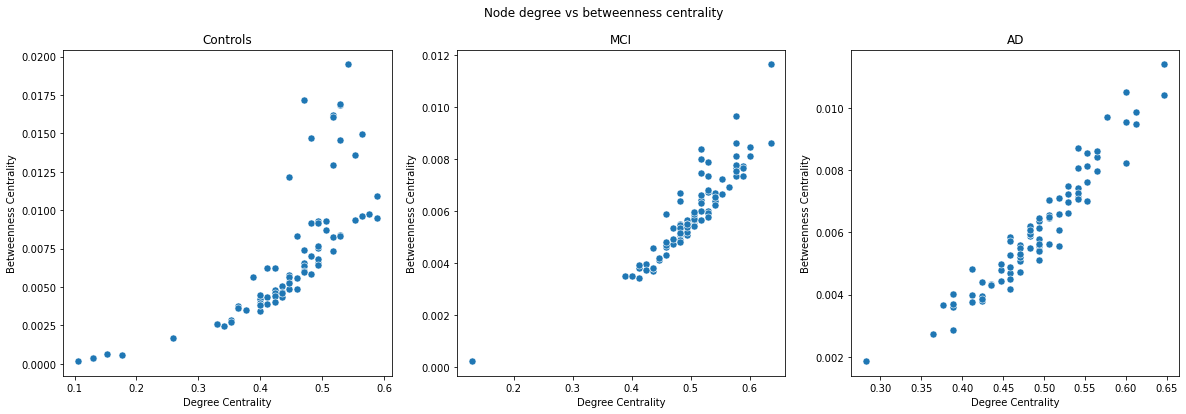

In [320]:
#Get centrality metrics table
merged_CN_centrality = centrality(merged_CN_graph, merged_columns)
merged_MCI_centrality = centrality(merged_MCI_graph, merged_columns)
merged_AD_centrality = centrality(merged_AD_graph, merged_columns)

#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))


sns.scatterplot(ax=axes[0],data=merged_CN_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[1],data=merged_MCI_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[2],data=merged_AD_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)

#labels
axes[0].set_ylabel("Betweenness Centrality")
axes[1].set_ylabel("Betweenness Centrality")
axes[2].set_ylabel("Betweenness Centrality")
axes[0].set_xlabel("Degree Centrality")
axes[1].set_xlabel("Degree Centrality")
axes[2].set_xlabel("Degree Centrality")

#add title
fig.suptitle('Node degree vs betweenness centrality')

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")


plt.show()

#### Average clustering coefficient

In [321]:
print("--------------------------------")
print("AVERAGE CLUSTERING COEFFICIENT")
print("--------------------------------")
print()
print("Controls: ", nx.average_clustering(merged_CN_graph,weight='weight'))
print()
print("MCI: ", nx.average_clustering(merged_MCI_graph,weight='weight'))
print()
print("AD: ", nx.average_clustering(merged_AD_graph,weight='weight'))

--------------------------------
AVERAGE CLUSTERING COEFFICIENT
--------------------------------

Controls:  0.020997713891294623

MCI:  0.018545889457092877

AD:  0.03992872096420798


#### Global efficiency

In [322]:
print("--------------------------------")
print("AVERAGE GLOBAL EFFICIENCY")
print("--------------------------------")
print()
print("Controls: ", nx.global_efficiency(merged_CN_graph))
print()
print("MCI: ", nx.global_efficiency(merged_MCI_graph))
print()
print("AD: ", nx.global_efficiency(merged_AD_graph))

--------------------------------
AVERAGE GLOBAL EFFICIENCY
--------------------------------

Controls:  0.7143638850889192

MCI:  0.750889192886457

AD:  0.7451436388508892


#### Global measures summary

In [519]:
merged_gm = global_metrics(merged_CN_graph, merged_MCI_graph, merged_AD_graph)
merged_gm.reset_index(inplace=True)
merged_gm

index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0    CN     86   1567        2  0.428728  2.389279     0.432164  0.020998   
1   MCI     86   1834        2  0.501778  2.014199     0.478606  0.018546   
2    AD     86   1792        2  0.490287   4.68398     0.422415  0.039929   

       AvGE  
0  0.714364  
1  0.750889  
2  0.745144

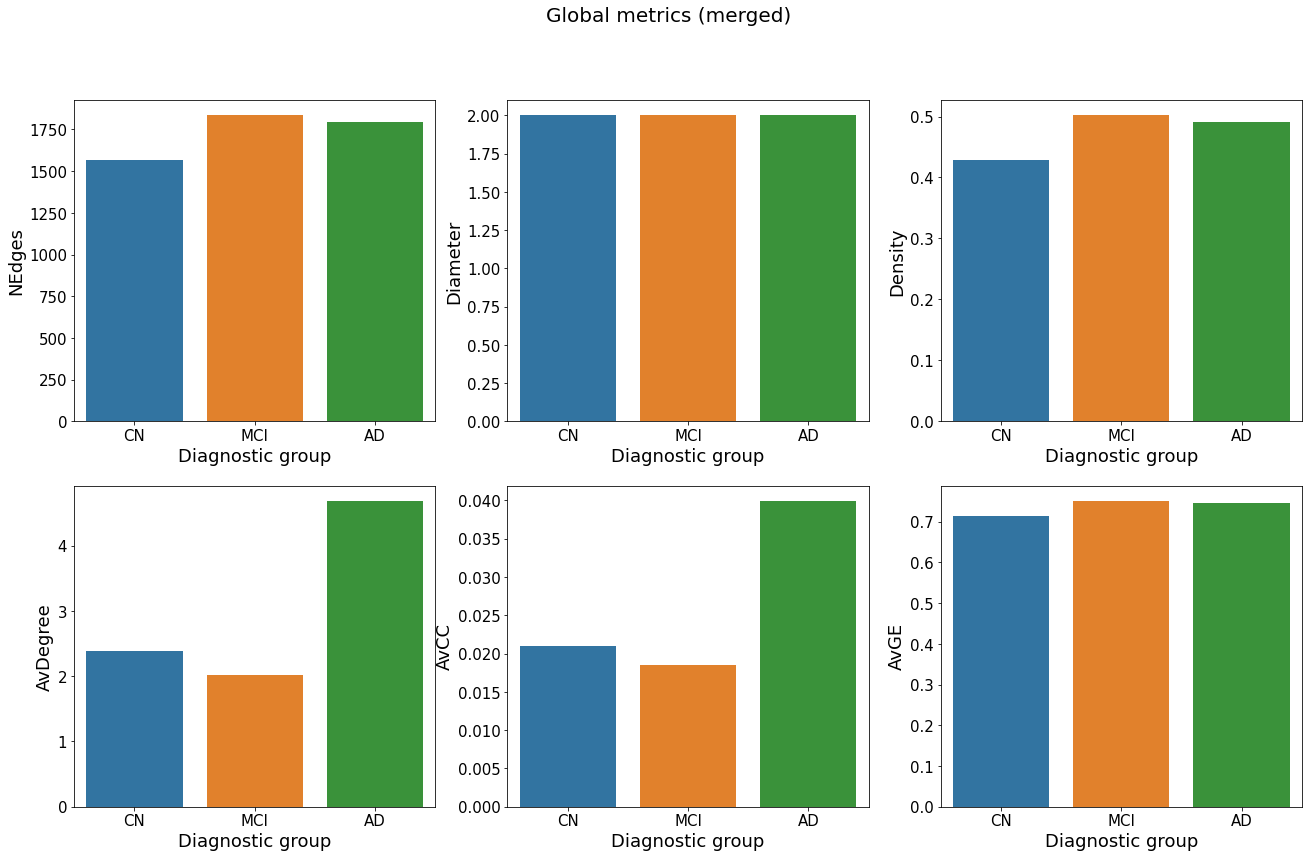

In [524]:
fig, ax = plt.subplots(2, 3, figsize=(22,13))

sns.barplot(ax=ax[0,0], x="index", y="NEdges", data=merged_gm) 
sns.barplot(ax=ax[0,1], x="index", y="Diameter", data=merged_gm)
sns.barplot(ax=ax[0,2], x="index", y="Density", data=merged_gm) 
sns.barplot(ax=ax[1,0], x="index", y="AvDegree", data=merged_gm) 
sns.barplot(ax=ax[1,1], x="index", y="AvCC", data=merged_gm)
sns.barplot(ax=ax[1,2], x="index", y="AvGE",  data=merged_gm)

fig.suptitle("Global metrics (merged)", fontsize=20)

rows, cols = 2, 3
for i in range(rows):
    for j in range(cols):
        ax[i, j].set_xlabel('Diagnostic group')
    
plt.show()

#### Modularity Index (Louvain Algorithm)

In [324]:
import networkx.algorithms.community as nx_comm

merged_CN_partition = nx_comm.louvain_communities(merged_CN_graph, weight='weight',seed=0)
merged_MCI_partition = nx_comm.louvain_communities(merged_MCI_graph, weight='weight',seed=0)
merged_AD_partition = nx_comm.louvain_communities(merged_AD_graph, weight='weight',seed=0)

print("--------------------------------")
print("LOUVAIN COMMUNITIES")
print("--------------------------------")
print()
print("Controls: ", merged_CN_partition)
print()
print("MCI: ", merged_MCI_partition)
print()
print("AD: ", merged_AD_partition)

print()
print("--------------------------------")
print("MODULARITY INDEX")
print("--------------------------------")
print()
print("Controls: ", nx_comm.modularity(merged_CN_graph, merged_CN_partition, weight='weight'))
print()
print("MCI: ", nx_comm.modularity(merged_MCI_graph, merged_MCI_partition, weight='weight'))
print()
print("AD: ", nx_comm.modularity(merged_AD_graph, merged_AD_partition, weight='weight'))

--------------------------------
LOUVAIN COMMUNITIES
--------------------------------

Controls:  [{0, 1, 2, 3, 7, 75, 76, 77, 14, 78, 80, 16, 79, 19, 33, 34, 36, 37, 41, 43, 47}, {10, 11, 84, 82}, {35, 39, 12, 15, 49, 50, 83, 51, 22, 23, 24, 25}, {81, 63, 4, 8, 29, 30, 31}, {65, 66, 5, 70, 71, 72, 6, 74, 13, 18, 20, 85, 21, 32, 38, 40, 44, 45, 46, 48, 52, 53, 54, 55, 57, 62}, {67, 68, 69}, {64, 73, 9, 17, 26, 27, 28, 42, 56, 58, 59, 60, 61}]

MCI:  [{2, 6, 39, 8, 9, 10, 11, 15, 17, 82, 19, 24, 25}, {64, 1, 32, 33, 4, 37, 34, 40, 12, 13, 14, 16, 21}, {0, 3, 38, 7}, {35, 36, 70, 71, 43, 52, 85, 54, 55, 56, 53, 58, 59, 60, 61, 62, 57}, {65, 5, 73, 74, 49, 18, 83, 51, 50, 20, 84}, {72, 41, 75, 47, 48, 27, 28, 29, 30, 31}, {66, 67, 68, 69, 42, 44, 45, 23, 26}, {76, 77, 78, 79, 80, 81, 46, 22, 63}]

AD:  [{64, 70, 41, 44, 13, 46, 79, 78, 83, 84, 53, 52, 23, 24, 25, 26}, {1, 35, 37, 39, 40, 27, 42, 74, 80, 82, 59, 60, 61, 62}, {65, 2, 67, 4, 72, 73, 43, 45, 77, 47, 48, 16, 50, 85, 55, 56}, {

#### Draw graphs (color by communities)

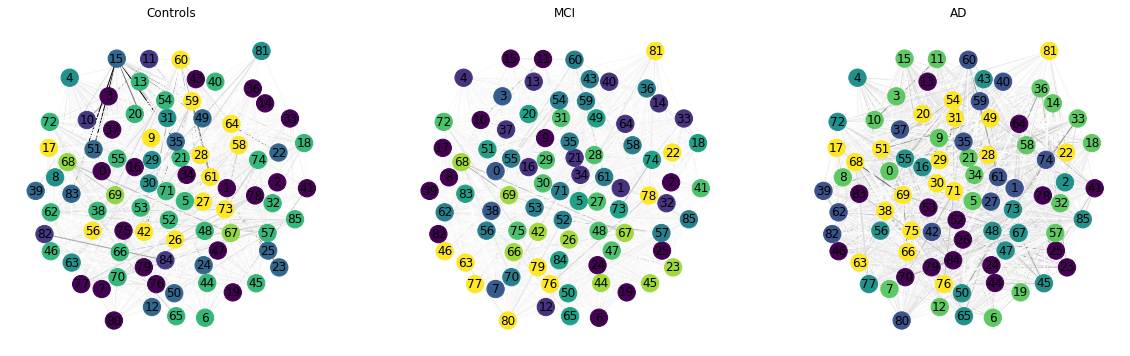

In [325]:
#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))


#get colors
merged_CN_colors = color_communities(merged_CN_graph, merged_CN_partition)
merged_MCI_colors = color_communities(merged_MCI_graph, merged_MCI_partition)
merged_AD_colors = color_communities(merged_AD_graph, merged_AD_partition)

#Plot

#fix position
pos=nx.spring_layout(merged_AD_graph)

#get edges weights
edges_CN,weights_CN = zip(*nx.get_edge_attributes(merged_CN_graph,'weight').items())
edges_MCI,weights_MCI = zip(*nx.get_edge_attributes(merged_MCI_graph,'weight').items())
edges_AD,weights_AD = zip(*nx.get_edge_attributes(merged_AD_graph,'weight').items())

#draw graphs
nx.draw(ax=axes[0], G=merged_CN_graph, pos=pos, node_color=merged_CN_colors, with_labels=True,
       edge_color=weights_CN, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[1], G=merged_MCI_graph, pos=pos, node_color=merged_MCI_colors, with_labels=True,
       edge_color=weights_MCI, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[2], G=merged_AD_graph, pos=pos, node_color=merged_AD_colors, with_labels=True,
       edge_color=weights_AD, edge_cmap=plt.cm.Greys)

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.show()

Community metrics for the controls group:

In [326]:
import warnings
warnings.filterwarnings('ignore')

display(community_metrics(merged_CN_graph, merged_CN_partition))

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0     21    110        2   0.52381  0.879033     0.515206  0.054135   
1     1      4      4        2  0.666667  0.514812            0       0.0   
2     2     12     18        3  0.272727  1.038768     0.236842  0.069499   
3     3      7     14        2  0.666667  0.669891     0.418605  0.039791   
4     4     26    162        3  0.498462   0.99085     0.447262  0.094578   
5     5      3      3        1       1.0   0.45613          1.0  0.532046   
6     6     13     42        3  0.538462  1.296837     0.204255  0.013954   

       AvGE                                              Tests  Language  \
0  0.761905  [Word recall, Commands, Constructional praxis,...  0.210526   
1  0.833333  [Word finding difficulty, Spoken language abil...  0.105263   
2  0.618687  [Recognize and name common objects, Comprehend...  0.263158   
3  0.833333  [Naming task, Remembering test instructions, O...  0.052632   
4  0.748718  [Ideational praxis, Orientation, Orientation t...  0.263158   
5       1.0  [Count substracting by 9, Count substracting b...       0.0   
6  0.767094  [Sequence of letters: identify "A", Read a lis...  0.105263   

     Memory Visuospatial Executive Attention Concentration Orientation  
0  0.384615     0.333333      0.25       0.0           0.0    0.235294  
1       0.0          0.0       0.0       0.0           0.0    0.117647  
2  0.115385          0.0       0.0  0.111111           0.0    0.176471  
3  0.038462          0.0       0.0  0.111111           0.6    0.058824  
4  0.230769     0.666667       0.5  0.333333           0.0    0.352941  
5       0.0          0.0       0.0  0.333333           0.0         0.0  
6  0.230769          0.0      0.25  0.111111           0.4    0.058824

MCI group:

In [327]:
community_metrics(merged_MCI_graph, merged_MCI_partition)

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0     13     44        2  0.564103  0.516978     0.564576  0.095546   
1     1     13     50        2  0.641026  0.549829     0.634286  0.121419   
2     2      4      5        2  0.833333  0.568332         0.75  0.346374   
3     3     17     87        2  0.639706  0.830608     0.598531  0.098468   
4     4     11     34        2  0.618182   0.47604     0.466667  0.075909   
5     5     10     27        2       0.6  0.755003     0.435484  0.027677   
6     6      9     22        2  0.611111  0.607119     0.545455  0.127889   
7     7      9     24        2  0.666667  0.426346     0.611111  0.170362   

       AvGE                                              Tests  Language  \
0  0.782051  [Constructional praxis, Orientation, Comprehen...  0.210526   
1  0.820513  [Sequence of letters: identify "A", Commands, ...  0.210526   
2  0.916667  [Word recall, Delayed word recall, Comprehend ...  0.052632   
3  0.819853  [Recognize and name common objects, Recognize ...  0.210526   
4  0.809091  [Count substracting by 7, Ideational praxis, A...  0.157895   
5       0.8  [Verbal fluency, Read a piece of paper, Delaye...  0.105263   
6  0.805556  [Count substracting by 8, Count substracting b...  0.052632   
7  0.833333  [Delayed recall, Delayed recall, Delayed recal...       0.0   

     Memory Visuospatial Executive Attention Concentration Orientation  
0  0.115385          0.0      0.25       0.0           0.0    0.294118  
1  0.115385          0.0       0.0  0.222222           0.0    0.235294  
2  0.115385          0.0       0.0       0.0           0.0         0.0  
3  0.384615     0.166667       0.0  0.111111           0.0    0.058824  
4       0.0          0.0      0.75  0.111111           0.0    0.235294  
5  0.038462     0.333333       0.0       0.0           1.0         0.0  
6  0.076923     0.333333       0.0  0.444444           0.0         0.0  
7  0.153846     0.166667       0.0  0.111111           0.0    0.176471

AD group: 

In [328]:
community_metrics(merged_AD_graph, merged_AD_partition)

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0     16     62        2  0.516667  1.536669     0.257336  0.033377   
1     1     14     51        2   0.56044  1.343761     0.363636  0.071407   
2     2     16     67        2  0.558333  1.178235     0.476471  0.120196   
3     3     21    112        2  0.533333  1.454674     0.446413  0.108174   
4     4     19     91        2  0.532164  1.860866     0.156489  0.024225   

       AvGE                                              Tests  Language  \
0  0.758333  [Sequence of letters: identify "A", Repeat sen...  0.105263   
1   0.78022  [Commands, Recognize and name common objects, ...  0.315789   
2  0.779167  [Count substracting by 7, Constructional praxi...  0.157895   
3  0.766667  [Word recall, Delayed word recall, Ideational ...  0.210526   
4  0.766082  [Orientation to time , Orientation to place, O...  0.210526   

     Memory Visuospatial Executive Attention Concentration Orientation  
0  0.307692     0.333333       0.0  0.111111           0.0    0.176471  
1  0.115385          0.0      0.25  0.111111           0.2    0.117647  
2  0.115385     0.666667       0.5  0.222222           0.0    0.117647  
3  0.346154          0.0      0.25  0.111111           0.0    0.352941  
4  0.115385          0.0       0.0  0.444444           0.8    0.235294

#### Representation of the domains in each community

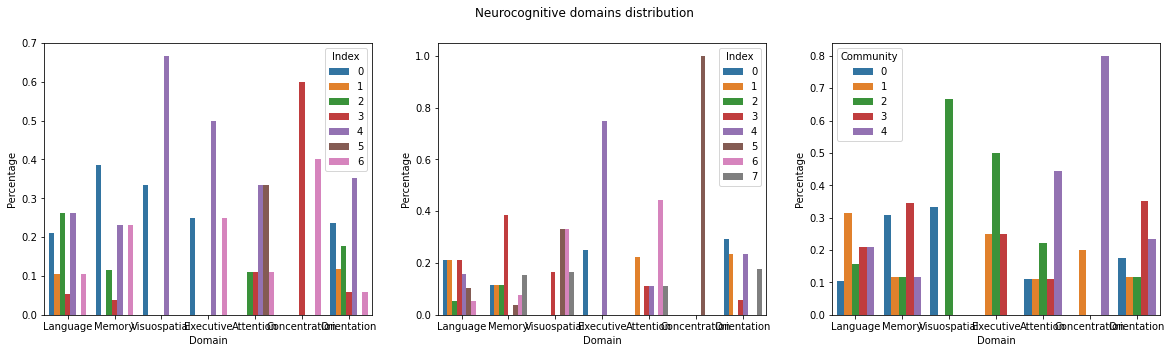

In [330]:
#Get data 
merged_CN_domains = community_metrics(merged_CN_graph, merged_CN_partition)[['Index','Language', 'Memory', 'Visuospatial',
                                                                      'Executive', 'Attention', 'Concentration', 'Orientation']]
merged_MCI_domains = community_metrics(merged_MCI_graph, merged_MCI_partition)[['Index','Language', 'Memory', 'Visuospatial',
                                                                      'Executive', 'Attention', 'Concentration', 'Orientation']]
merged_AD_domains = community_metrics(merged_AD_graph, merged_AD_partition)[['Index','Language', 'Memory', 'Visuospatial',
                                                                      'Executive', 'Attention', 'Concentration', 'Orientation']]

#Reshape data with melt() function
merged_CN_domains = merged_CN_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
merged_MCI_domains = merged_MCI_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
merged_AD_domains = merged_AD_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')

#plot 
fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.barplot(ax=axes[0], x="Domain", y="Percentage", hue="Index", data=merged_CN_domains)
sns.barplot(ax=axes[1], x="Domain", y="Percentage", hue="Index", data=merged_MCI_domains)
sns.barplot(ax=axes[2], x="Domain", y="Percentage", hue="Index", data=merged_AD_domains)


#merged_CN_domains.plot(kind='bar',ax=axes[0], x="Domain", y="Per. of representation", hue="Index", stacked=True)

fig.suptitle("Neurocognitive domains distribution")
plt.legend(title='Community')

plt.show()

#send data to build stacked barplot in R
merged_CN_domains.to_csv('./Results/merged/Louvain_CN.csv', index=False) 
merged_MCI_domains.to_csv('./Results/merged/Louvain_MCI.csv', index=False) 
merged_AD_domains.to_csv('./Results/merged/Louvain_AD.csv', index=False) 

#### Modularity index (Greedy modularity algorithm)

This function uses **Clauset-Newman-Moore greedy modularity maximization** to find the community partition with the largest modularity.

Greedy modularity maximization begins with each node in its own community and repeatedly joins the pair of communities that lead to the largest modularity until no further increase in modularity is possible (a maximum).

In [332]:
import networkx.algorithms.community as nx_comm

merged_CN_partition = nx_comm.greedy_modularity_communities(merged_CN_graph, weight='weight')
merged_MCI_partition = nx_comm.greedy_modularity_communities(merged_MCI_graph, weight='weight')
merged_AD_partition = nx_comm.greedy_modularity_communities(merged_AD_graph, weight='weight')

print("--------------------------------")
print("GREEDY MODULARITY COMMUNITIES")
print("--------------------------------")
print()
print("Controls: ", merged_CN_partition)
print()
print("MCI: ", merged_MCI_partition)
print()
print("AD: ", merged_AD_partition)

print()
print("--------------------------------")
print("MODULARITY INDEX")
print("--------------------------------")
print()
print("Controls: ", nx_comm.modularity(merged_CN_graph, merged_CN_partition, weight='weight'))
print()
print("MCI: ", nx_comm.modularity(merged_MCI_graph, merged_MCI_partition, weight='weight'))
print()
print("AD: ", nx_comm.modularity(merged_AD_graph, merged_AD_partition, weight='weight'))

--------------------------------
GREEDY MODULARITY COMMUNITIES
--------------------------------

Controls:  [frozenset({0, 1, 2, 3, 6, 7, 75, 76, 77, 14, 78, 79, 80, 18, 19, 31, 33, 34, 36, 38, 40, 41, 43, 47}), frozenset({4, 5, 70, 8, 72, 73, 74, 44, 10, 46, 11, 48, 82, 52, 53, 54, 55, 84}), frozenset({65, 66, 67, 68, 69, 16, 81, 20, 21, 85, 32, 37, 45, 57, 62, 63}), frozenset({64, 26, 71, 27, 9, 42, 28, 17, 29, 56, 58, 59, 60, 61, 30}), frozenset({35, 39, 12, 13, 15, 49, 50, 51, 83, 22, 23, 24, 25})]

MCI:  [frozenset({70, 71, 72, 80, 84, 85, 22, 38, 43, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63}), frozenset({64, 65, 5, 6, 40, 73, 74, 12, 14, 47, 49, 82, 51, 83}), frozenset({0, 32, 33, 3, 2, 34, 1, 7, 35, 36, 13, 18, 21}), frozenset({4, 39, 8, 9, 10, 11, 15, 16, 19, 23, 24, 25, 26}), frozenset({37, 42, 75, 76, 77, 78, 46, 79, 81, 20}), frozenset({66, 67, 68, 69, 44, 45, 48, 17}), frozenset({41, 27, 28, 29, 30, 31})]

AD:  [frozenset({66, 4, 68, 69, 71, 72, 74, 75, 76, 17, 82

#### Draw graph displaying communities (Greedy modularity communities)

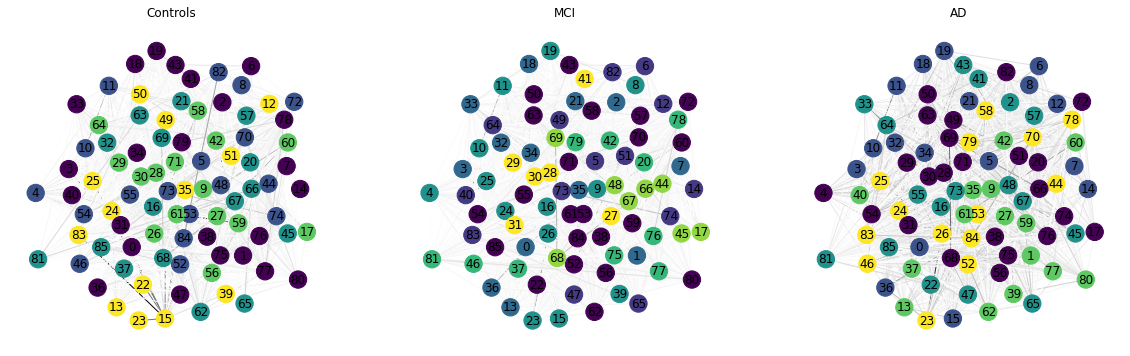

In [333]:
#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))

#get colors
merged_CN_colors = color_communities(merged_CN_graph, merged_CN_partition)
merged_MCI_colors = color_communities(merged_MCI_graph, merged_MCI_partition)
merged_AD_colors = color_communities(merged_AD_graph, merged_AD_partition)

#fix positions
pos=nx.spring_layout(merged_AD_graph)

#get edges weights
edges_CN,weights_CN = zip(*nx.get_edge_attributes(merged_CN_graph,'weight').items())
edges_MCI,weights_MCI = zip(*nx.get_edge_attributes(merged_MCI_graph,'weight').items())
edges_AD,weights_AD = zip(*nx.get_edge_attributes(merged_AD_graph,'weight').items())

#draw graphs
nx.draw(ax=axes[0], G=merged_CN_graph, pos=pos, with_labels=True, node_color=merged_CN_colors,
       edge_color=weights_CN, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[1], G=merged_MCI_graph, pos=pos, with_labels=True, node_color=merged_MCI_colors,
       edge_color=weights_MCI, edge_cmap=plt.cm.Greys)
nx.draw(ax=axes[2], G=merged_AD_graph, pos=pos, with_labels=True, node_color=merged_AD_colors,
       edge_color=weights_AD, edge_cmap=plt.cm.Greys)

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.show()

Community metrics for the controls group:

In [334]:
import warnings
warnings.filterwarnings('ignore')

display(community_metrics(merged_CN_graph, merged_CN_partition))

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0     24    144        2  0.521739  0.901206     0.522282  0.046233   
1     1     18     88        2  0.575163  0.815601     0.524164  0.080547   
2     2     16     63        3     0.525  0.782821     0.399142  0.078917   
3     3     15     54        3  0.514286  1.429374     0.148256  0.013652   
4     4     13     27        3  0.346154  1.020487     0.416667   0.05567   

       AvGE                                              Tests  Language  \
0   0.76087  [Word recall, Commands, Constructional praxis,...  0.263158   
1  0.787582  [Naming task, Ideational praxis, Repeat senten...  0.263158   
2  0.759722  [Repat words, Count substracting by 7, Count s...  0.052632   
3  0.755556  [Sequence of letters: identify "A", Read a lis...  0.157895   
4  0.666667  [Recognize and name common objects, Comprehend...  0.263158   

     Memory Visuospatial Executive Attention Concentration Orientation  
0  0.384615     0.333333      0.25       0.0           0.2    0.294118  
1  0.192308          0.5      0.75       0.0           0.0    0.117647  
2  0.076923     0.166667       0.0  0.777778           0.0    0.294118  
3  0.230769          0.0       0.0  0.111111           0.8    0.058824  
4  0.115385          0.0       0.0  0.111111           0.0    0.235294

MCI group:

In [335]:
community_metrics(merged_MCI_graph, merged_MCI_partition)

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0     22    144        2  0.623377  0.871986     0.586149  0.086431   
1     1     14     59        2  0.648352  0.597125     0.557047  0.091129   
2     2     13     51        2  0.653846  0.668709     0.671159  0.066702   
3     3     13     37        2  0.474359  0.568614     0.395604   0.06252   
4     4     10     32        2  0.711111  0.441884     0.696133  0.173294   
5     5      8     21        2      0.75  0.561437     0.659341   0.17708   
6     6      6      8        2  0.533333  0.775966            0       0.0   

       AvGE                                              Tests  Language  \
0  0.811688  [Orientation to place, Comprehend instructions...  0.263158   
1  0.824176  [Sequence of letters: identify "A", Count subs...  0.157895   
2  0.826923  [Word recall, Repat words, Repat words, Delaye...  0.157895   
3  0.737179  [Naming task, Comprehend instructions, Remembe...  0.263158   
4  0.855556  [Repeat 1 syntactically complex sentence, Writ...  0.105263   
5     0.875  [Count substracting by 8, Count substracting b...       0.0   
6  0.766667  [Read a piece of paper, Spell WORLD backwards,...  0.052632   

     Memory Visuospatial Executive Attention Concentration Orientation  
0  0.384615     0.166667       0.0  0.222222           0.0    0.235294  
1       0.0     0.166667      0.75  0.333333           0.0    0.235294  
2  0.230769          0.0      0.25       0.0           0.0    0.176471  
3  0.192308          0.0       0.0       0.0           0.0    0.176471  
4  0.192308     0.166667       0.0       0.0           0.0    0.117647  
5       0.0          0.5       0.0  0.444444           0.0    0.058824  
6       0.0          0.0       0.0       0.0           1.0         0.0

AD group: 

In [336]:
community_metrics(merged_AD_graph, merged_AD_partition)

Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0     23    137        2  0.541502  1.970332     0.335075  0.046177   
1     1     17     77        2  0.566176  1.252286     0.451411  0.107293   
2     2     17     83        2  0.610294  1.342736     0.444898  0.098681   
3     3     15     62        2  0.590476  1.426044     0.364425  0.075096   
4     4     14     51        2   0.56044  1.498954     0.304478  0.042057   

       AvGE                                              Tests  Language  \
0  0.770751  [Naming task, Orientation to time , Orientatio...  0.368421   
1  0.783088  [Word recall, Repat words, Repat words, Delaye...  0.157895   
2  0.805147  [Sequence of letters: identify "A", Count subs...  0.052632   
3  0.795238  [Commands, Recognize and name common objects, ...  0.368421   
4   0.78022  [Number of trials, Repeat sentences, Trail-mak...  0.052632   

     Memory Visuospatial Executive Attention Concentration Orientation  
0  0.153846          0.0      0.25  0.444444           0.8    0.176471  
1  0.230769          0.0      0.25  0.111111           0.0    0.352941  
2  0.115385     0.666667       0.5  0.333333           0.0    0.235294  
3  0.153846          0.0       0.0  0.111111           0.2    0.117647  
4  0.346154     0.333333       0.0       0.0           0.0    0.117647

#### Representation of the domains in each community

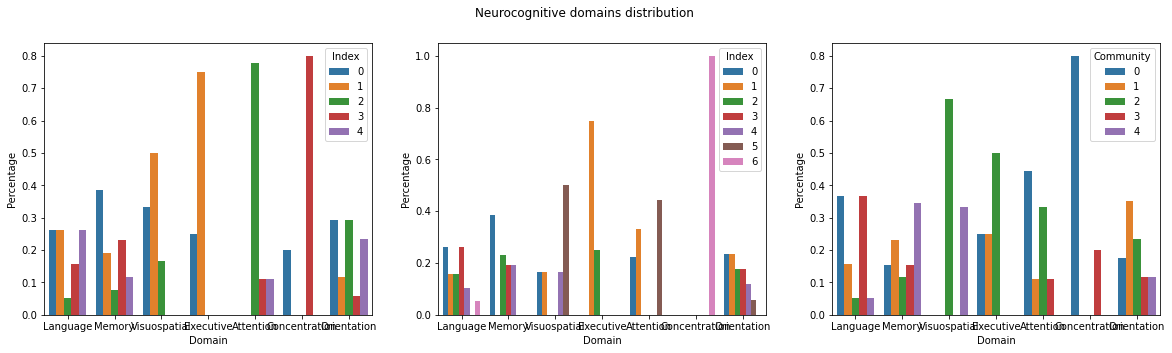

In [337]:
#Get data 
merged_CN_domains = community_metrics(merged_CN_graph, merged_CN_partition)[['Index','Language', 'Memory', 'Visuospatial',
                                                                      'Executive', 'Attention', 'Concentration', 'Orientation']]
merged_MCI_domains = community_metrics(merged_MCI_graph, merged_MCI_partition)[['Index','Language', 'Memory', 'Visuospatial',
                                                                      'Executive', 'Attention', 'Concentration', 'Orientation']]
merged_AD_domains = community_metrics(merged_AD_graph, merged_AD_partition)[['Index','Language', 'Memory', 'Visuospatial',
                                                                      'Executive', 'Attention', 'Concentration', 'Orientation']]

#Reshape data with melt() function
merged_CN_domains = merged_CN_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
merged_MCI_domains = merged_MCI_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
merged_AD_domains = merged_AD_domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')

#plot 
fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.barplot(ax=axes[0], x="Domain", y="Percentage", hue="Index", data=merged_CN_domains)
sns.barplot(ax=axes[1], x="Domain", y="Percentage", hue="Index", data=merged_MCI_domains)
sns.barplot(ax=axes[2], x="Domain", y="Percentage", hue="Index", data=merged_AD_domains)


#merged_CN_domains.plot(kind='bar',ax=axes[0], x="Domain", y="Per. of representation", hue="Index", stacked=True)

fig.suptitle("Neurocognitive domains distribution")
plt.legend(title='Community')

plt.show()

#send data to build stacked barplot in R
merged_CN_domains.to_csv('./Results/merged/Greedy_CN.csv', index=False) 
merged_MCI_domains.to_csv('./Results/merged/Greedy_MCI.csv', index=False) 
merged_AD_domains.to_csv('./Results/merged/Greedy_AD.csv', index=False) 